## Setup

In [1]:
import torch
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch import nn, optim
from torch.utils.data import TensorDataset
from torcheval import metrics
from ucimlrepo import fetch_ucirepo
from common import *

In [2]:
import common
import importlib
importlib.reload(common)
from common import *

In [3]:
torch.manual_seed(2024)
torch.use_deterministic_algorithms(True)

In [4]:
class BreastCancerNN(nn.Module):
    def __init__(self, num_features, hidden_sizes, output_size):
        super(BreastCancerNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(num_features, hidden_sizes[0]),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU()
        )
        self.out = nn.Linear(hidden_sizes[1], output_size)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.out(x)
        return self.softmax(x)

In [5]:
# import breast cancer dataset
breast_cancer = fetch_ucirepo(id=17)

In [6]:
breast_cancer_scaler = StandardScaler()
breast_cancer_dataset = TensorDataset(
    torch.tensor(breast_cancer_scaler.fit_transform(
        breast_cancer.data.features), dtype=torch.float),
    torch.tensor(breast_cancer.data.targets['Diagnosis'] == 'M', dtype=torch.long).flatten()
)

breast_cancer_datasets = shuffle_train_valid_test_split(breast_cancer_dataset)
breast_cancer_headers: list = breast_cancer.data.headers[1:-1].to_list()

In [7]:
def optimizer_factory(model):
    return optim.Adam(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()


In [8]:
labels = ("accuracy", "f1-score")


def score_outputs(outputs, targets):
    return (
        funcmetrics.multiclass_accuracy(
            outputs, targets, average='macro', num_classes=2).item(),
        funcmetrics.multiclass_f1_score(
            outputs, targets, average='macro', num_classes=2).item(),
    )

## Base model

/home/szynka/Projects/Studia/xai/.venv/lib64/python3.12/site-packages/torcheval/metrics/functional/classification/accuracy.py:275: UserWarning: The reduce argument of torch.scatter with Tensor src is deprecated and will be removed in a future PyTorch release. Use torch.scatter_reduce instead for more reduction options. (Triggered internally at ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:232.)
  num_correct = mask.new_zeros(num_classes).scatter_(0, target, mask, reduce="add")


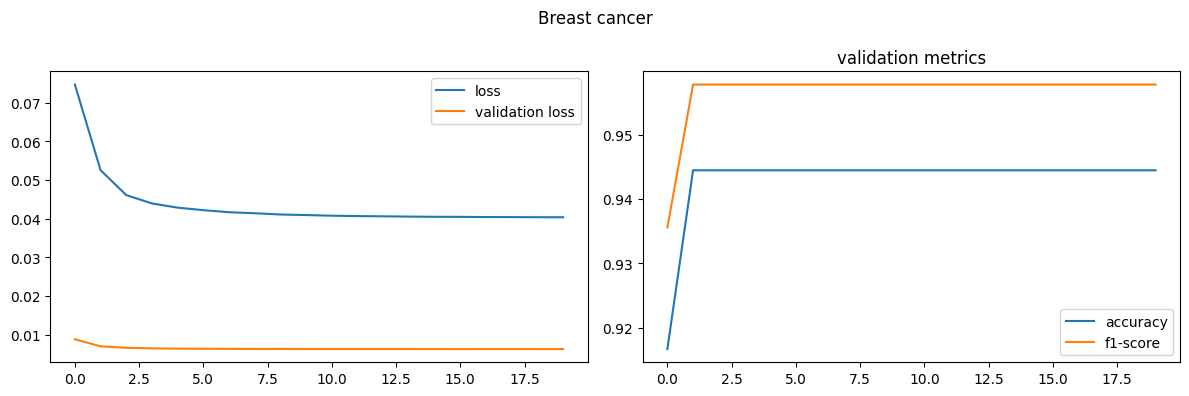

In [9]:
datasets = breast_cancer_datasets

model = BreastCancerNN(len(breast_cancer_headers), (32, 32), 2)
optimizer = optim.Adam(model.parameters(), lr=0.001)

metrics = model_train(datasets, model, optimizer, criterion, score_outputs)

plot_metrics('Breast cancer', metrics, labels)

## DGSM

In [10]:
torch.manual_seed(2024)
best_model = BreastCancerNN(len(breast_cancer_headers), (32, 32), 2)

### input layer

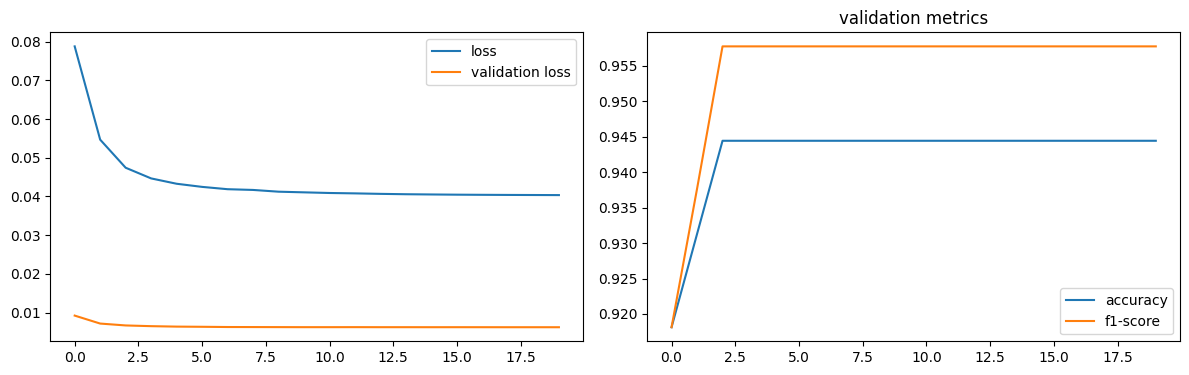

Test: loss: 0.34530532360076904, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (29, 'fractal_dimension3')


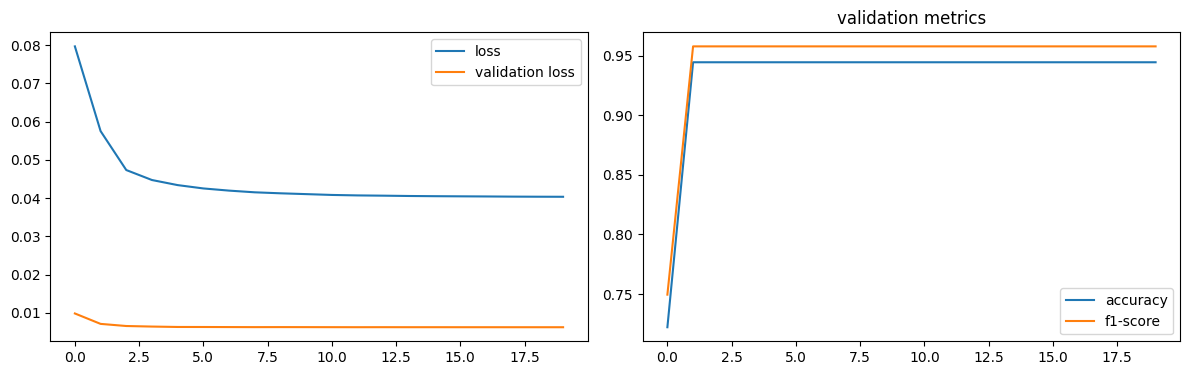

Test: loss: 0.33961498737335205, metrics: (0.9718309640884399, 0.9757985472679138)
dropping feature: (8, 'symmetry1')


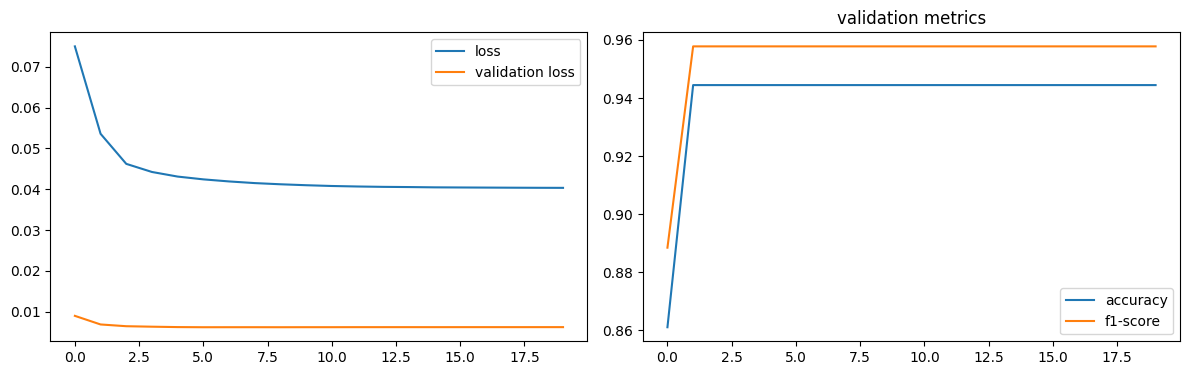

Test: loss: 0.34244203567504883, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (5, 'compactness1')


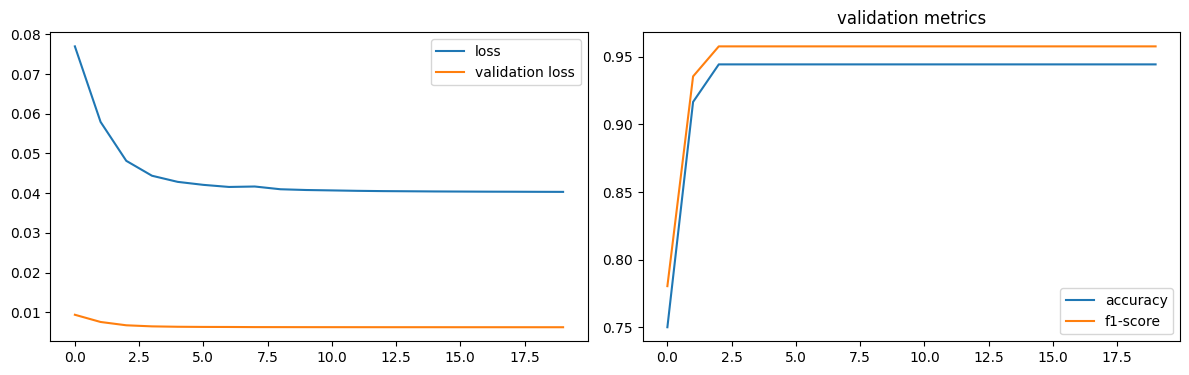

Test: loss: 0.34748104214668274, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (9, 'texture2')


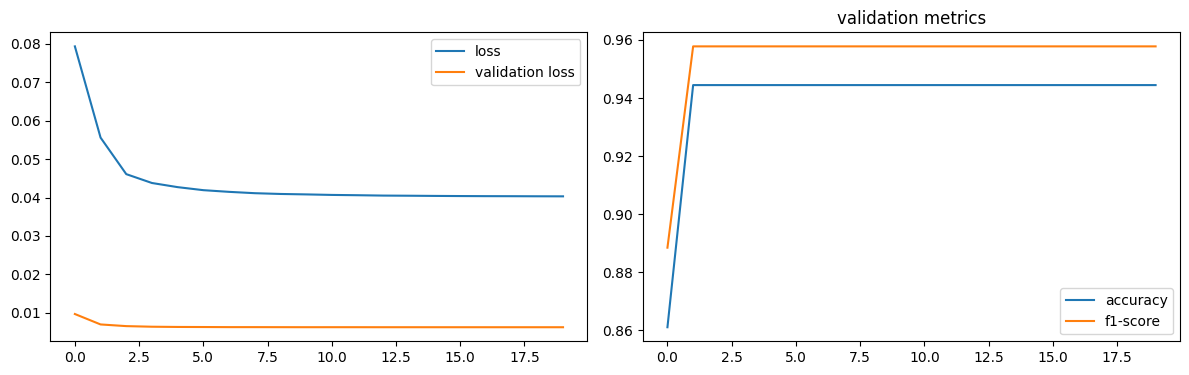

Test: loss: 0.3410806655883789, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (22, 'compactness3')


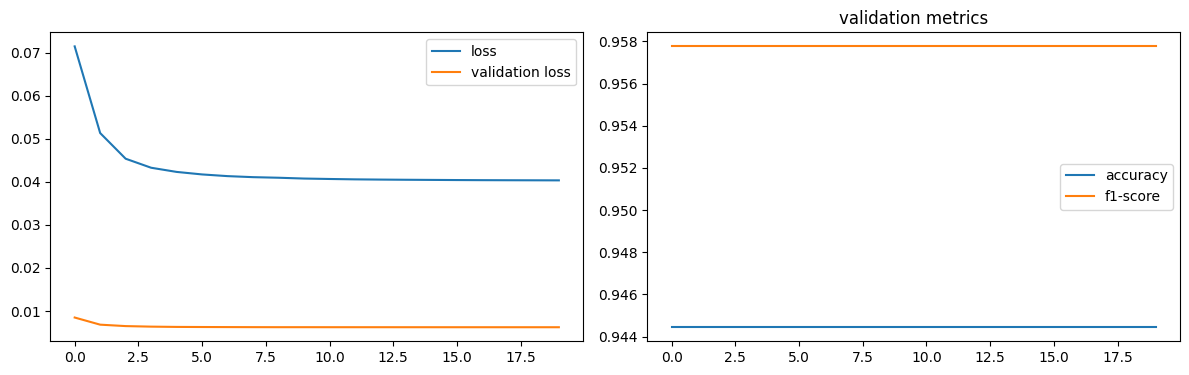

Test: loss: 0.3392675518989563, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (14, 'concave_points2')


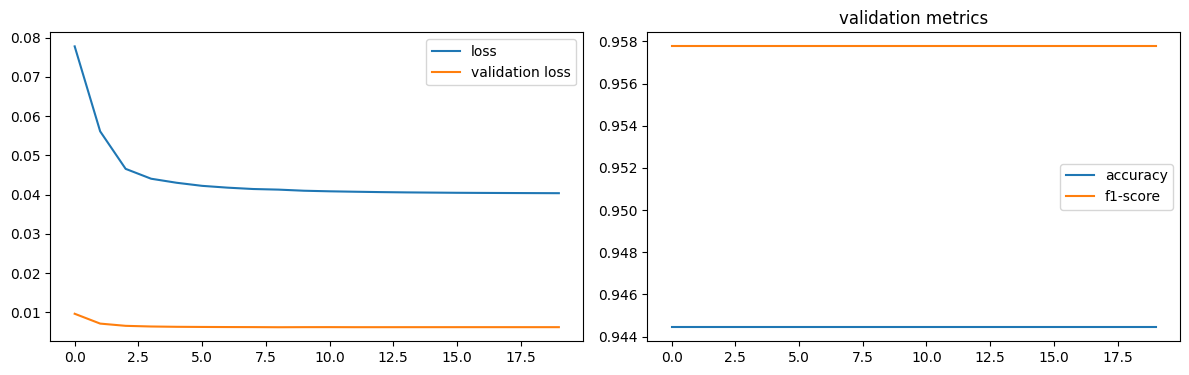

Test: loss: 0.3402044177055359, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (11, 'smoothness2')


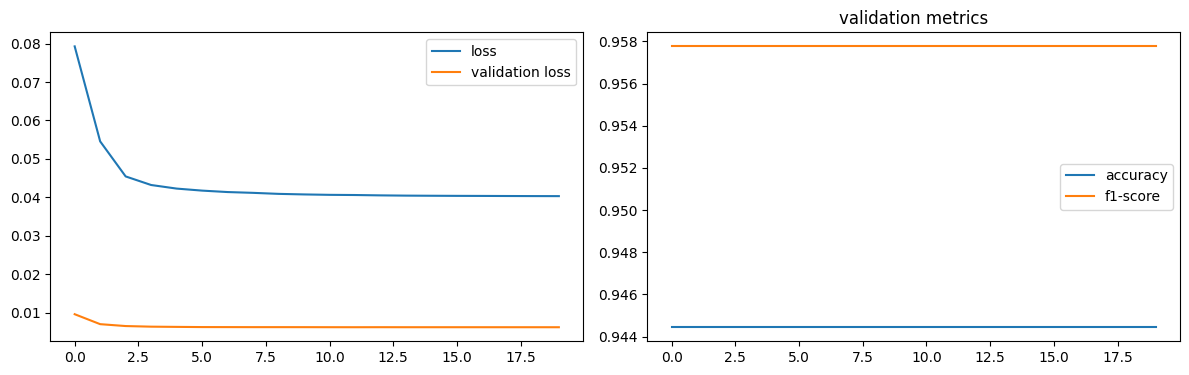

Test: loss: 0.3411305546760559, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (12, 'concavity2')


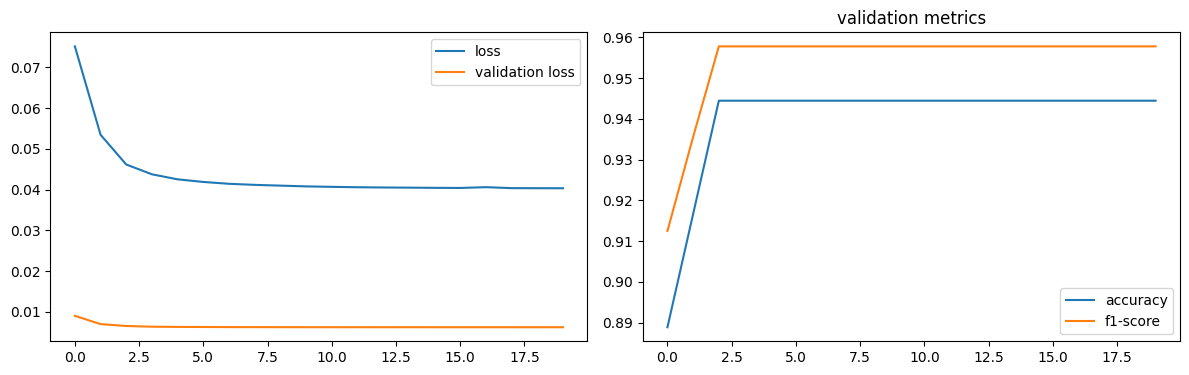

Test: loss: 0.3435203433036804, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (0, 'radius1')


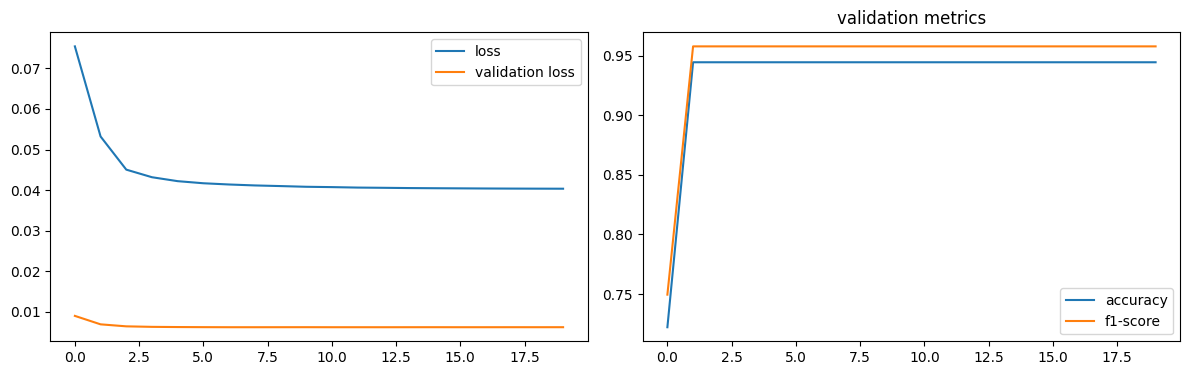

Test: loss: 0.3460671007633209, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (12, 'fractal_dimension2')


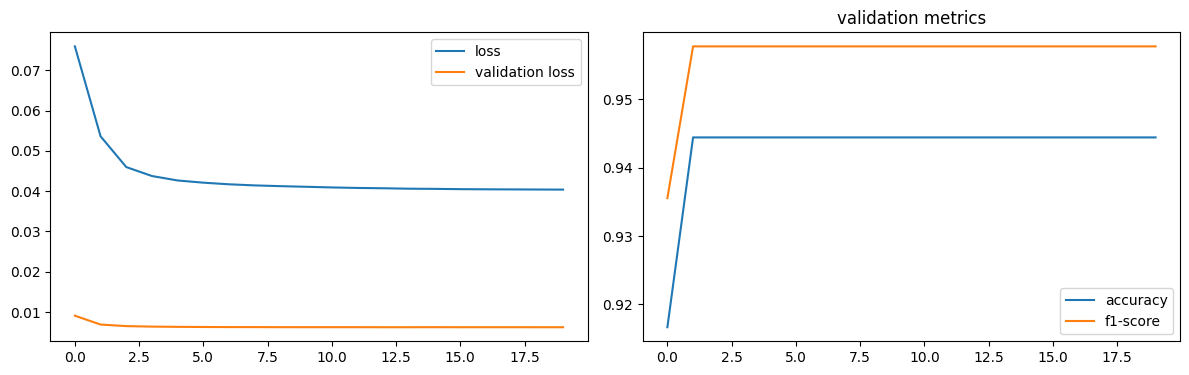

Test: loss: 0.3456359803676605, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (8, 'perimeter2')


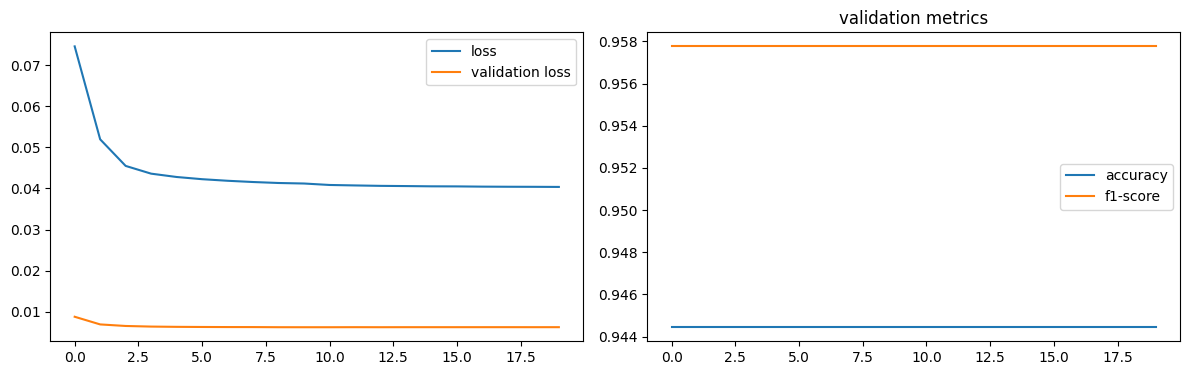

Test: loss: 0.3431479334831238, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (3, 'smoothness1')


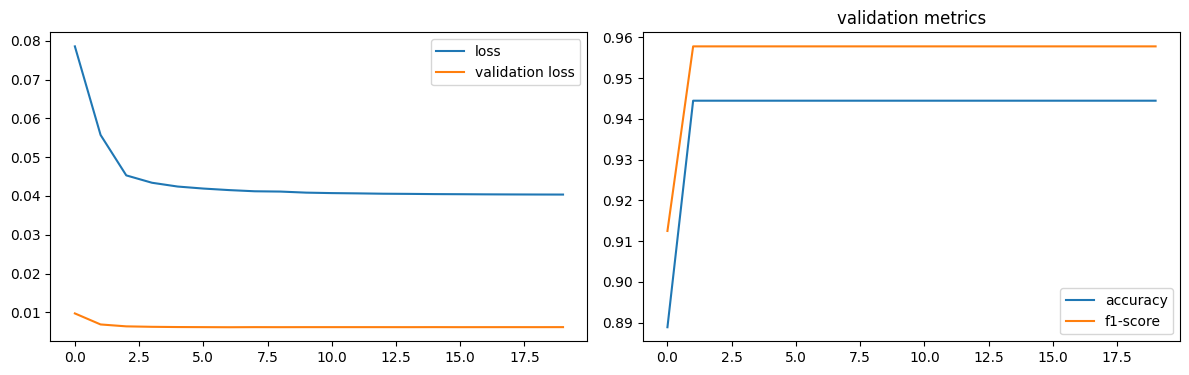

Test: loss: 0.3418082296848297, metrics: (0.9718309640884399, 0.9757985472679138)
dropping feature: (1, 'perimeter1')


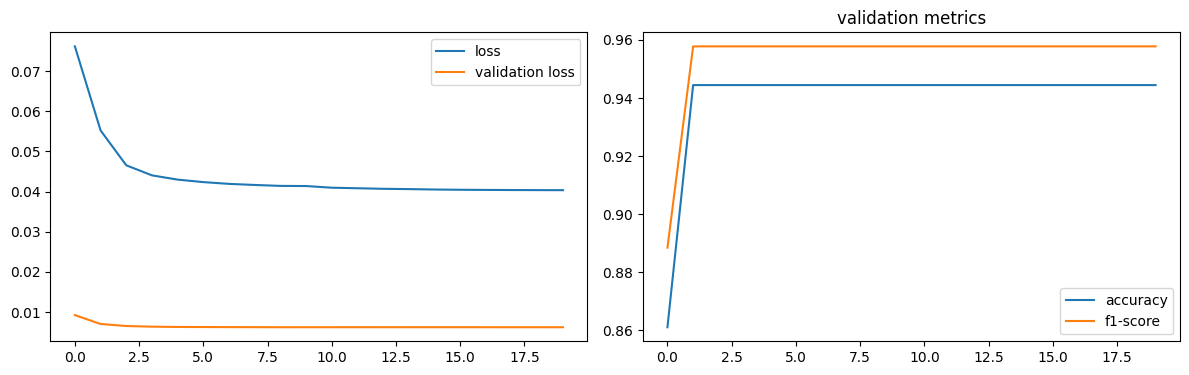

Test: loss: 0.3489897549152374, metrics: (0.9527959823608398, 0.9575443267822266)
dropping feature: (16, 'symmetry3')


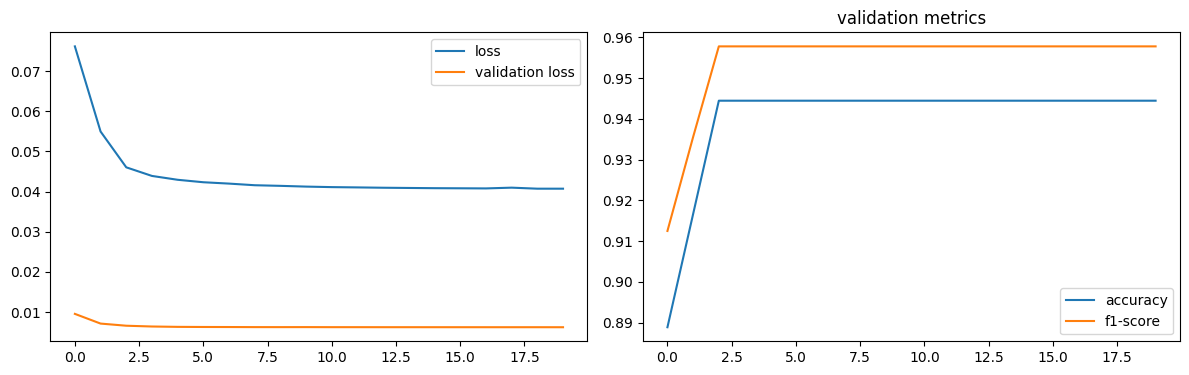

Test: loss: 0.35243117809295654, metrics: (0.947845458984375, 0.9515969753265381)
dropping feature: (0, 'texture1')


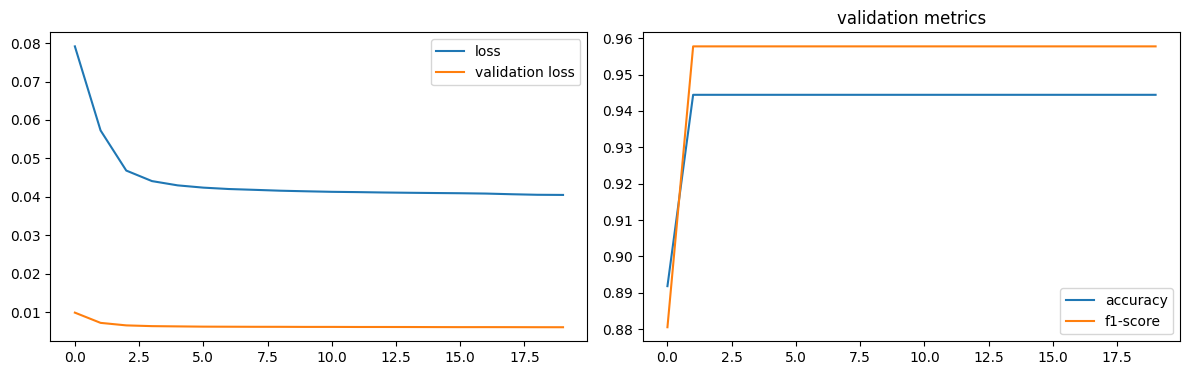

Test: loss: 0.3545822203159332, metrics: (0.9408032298088074, 0.9454141855239868)
dropping feature: (7, 'symmetry2')


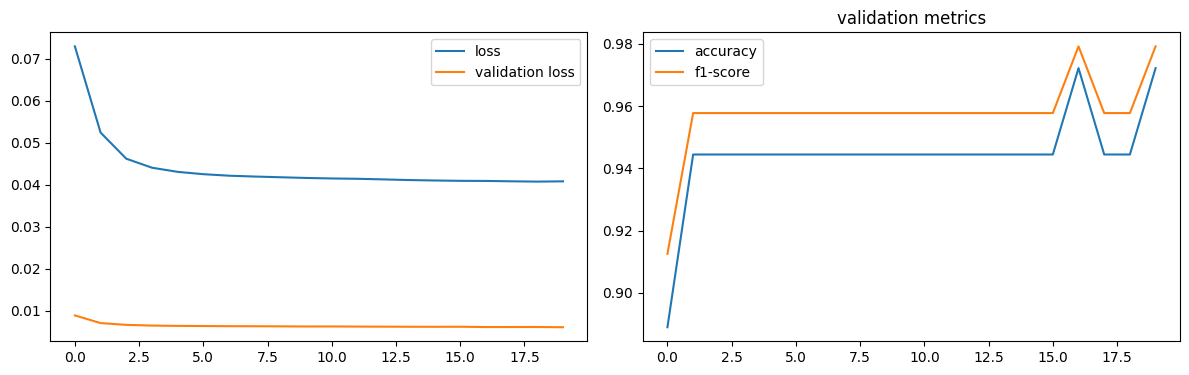

Test: loss: 0.3446245491504669, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (1, 'concavity1')


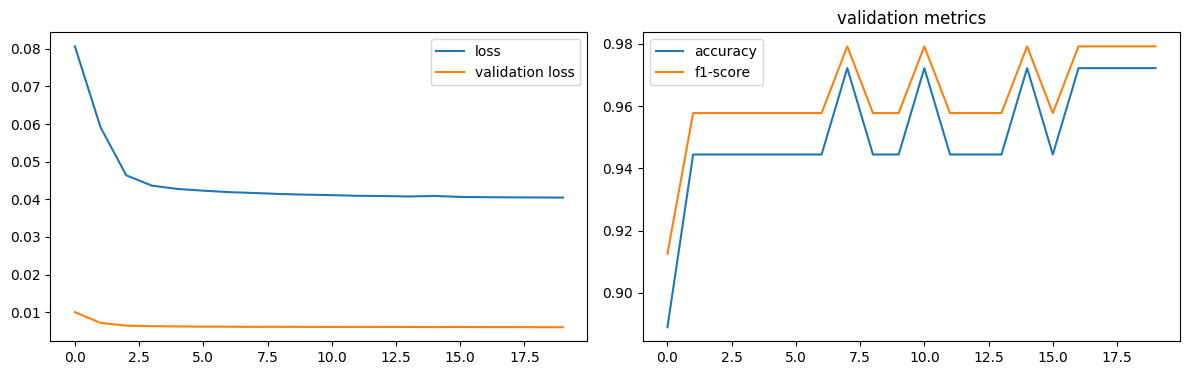

Test: loss: 0.35263538360595703, metrics: (0.947845458984375, 0.9515969753265381)
dropping feature: (0, 'area1')


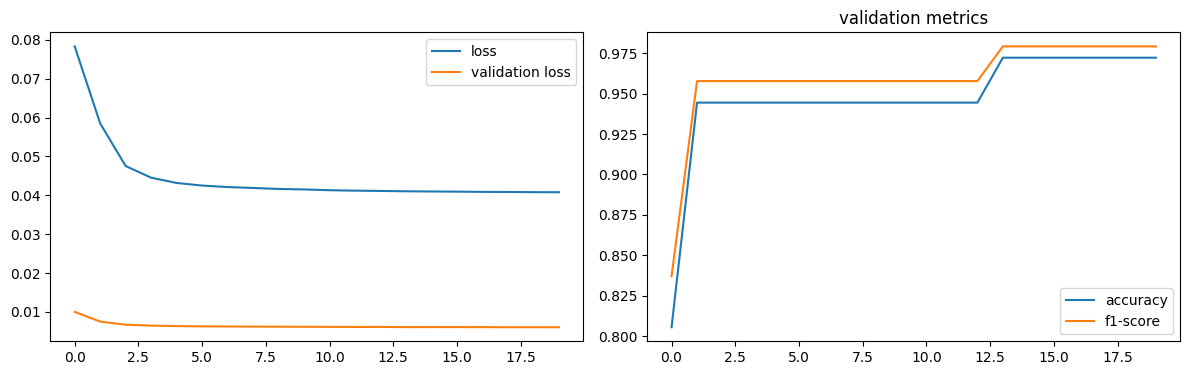

Test: loss: 0.3443041145801544, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (4, 'compactness2')


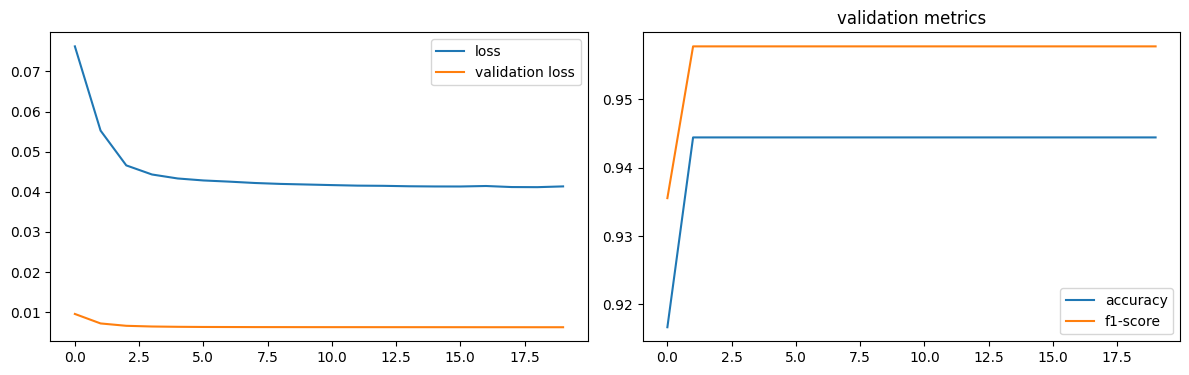

Test: loss: 0.3377700746059418, metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (10, 'concave_points3')


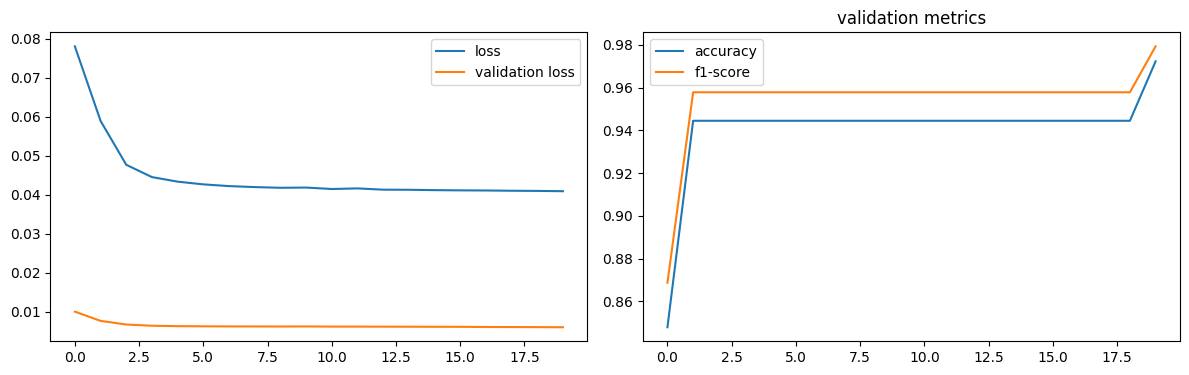

Test: loss: 0.33930209279060364, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'concave_points1')


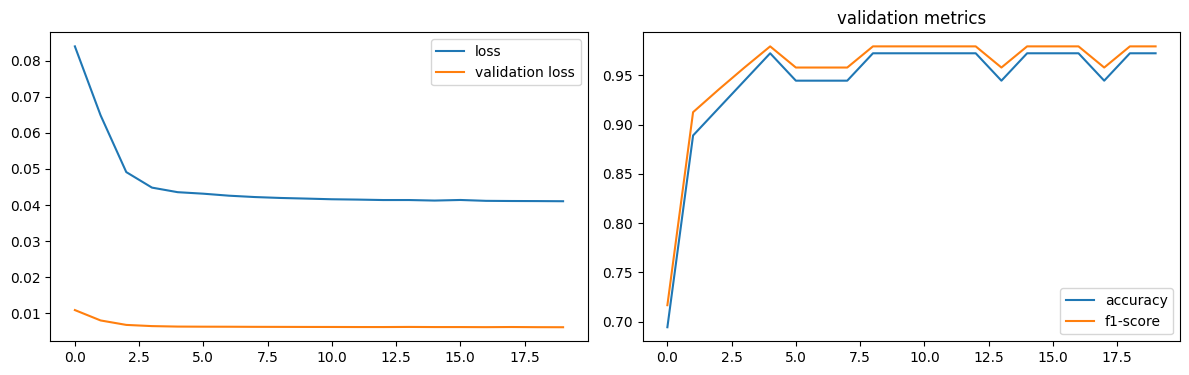

Test: loss: 0.3430362939834595, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'fractal_dimension1')


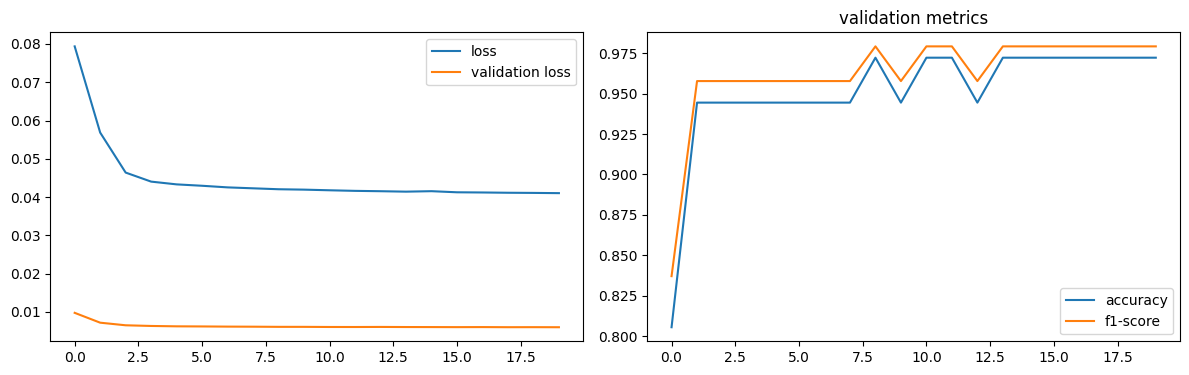

Test: loss: 0.3425758481025696, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (1, 'area2')


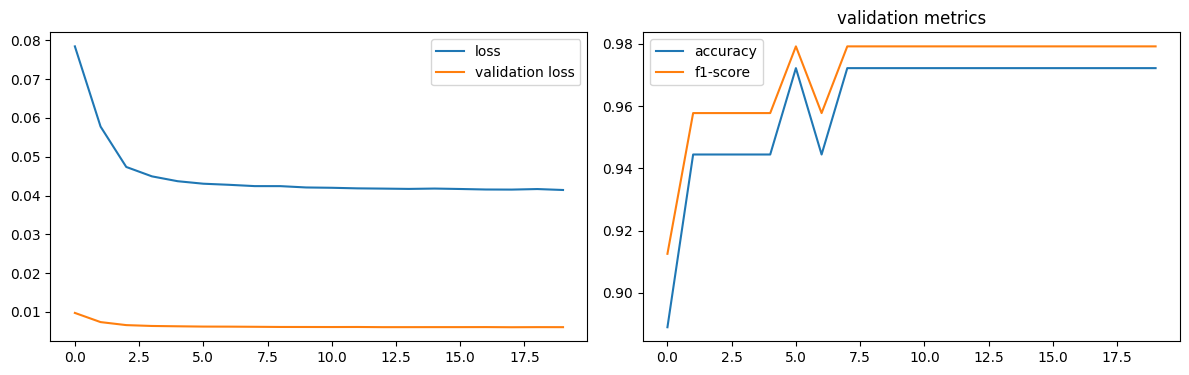

Test: loss: 0.34441089630126953, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'radius2')


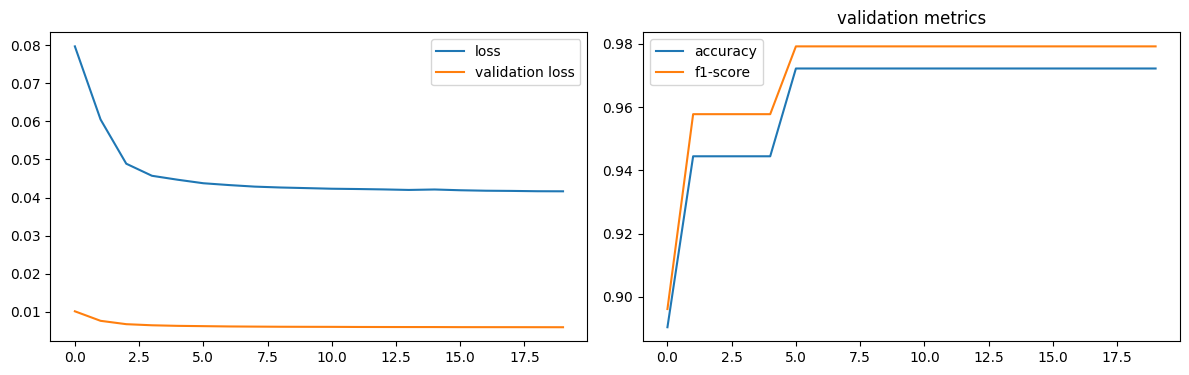

Test: loss: 0.343556672334671, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (1, 'texture3')


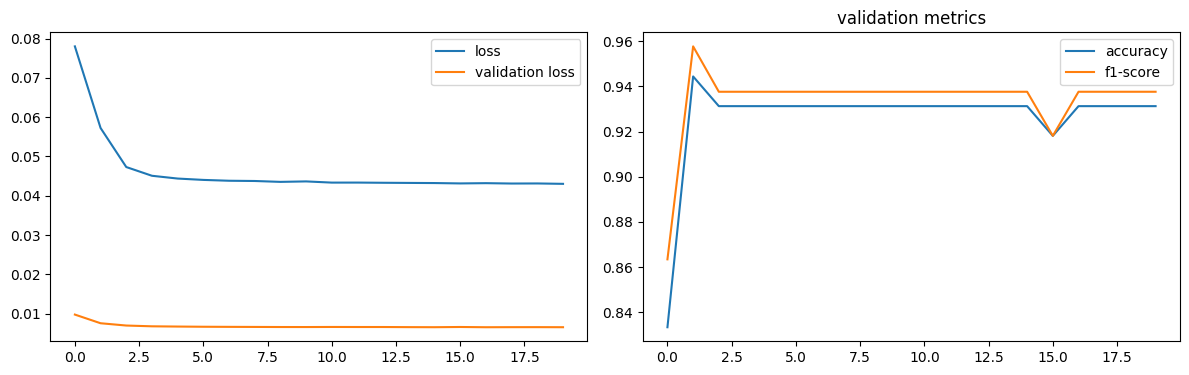

Test: loss: 0.35652780532836914, metrics: (0.9548877477645874, 0.9577469825744629)
dropping feature: (2, 'area3')


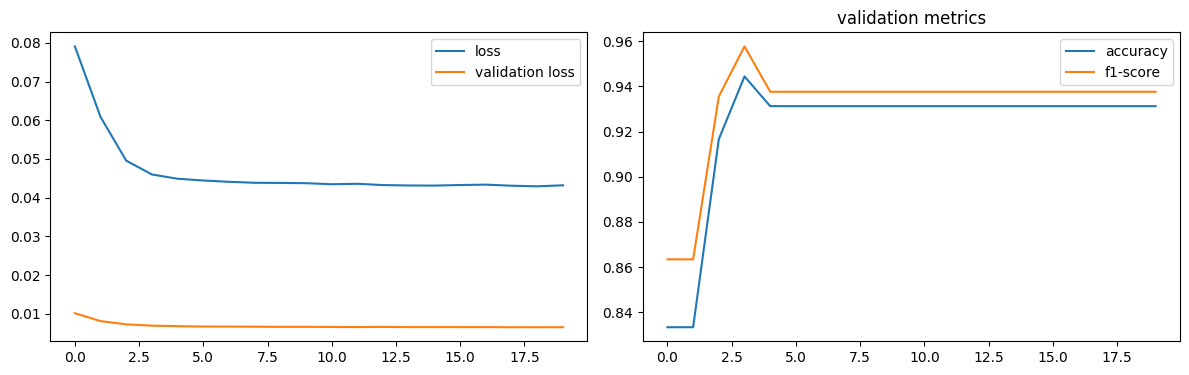

Test: loss: 0.35553252696990967, metrics: (0.9548877477645874, 0.9577469825744629)
dropping feature: (2, 'smoothness3')


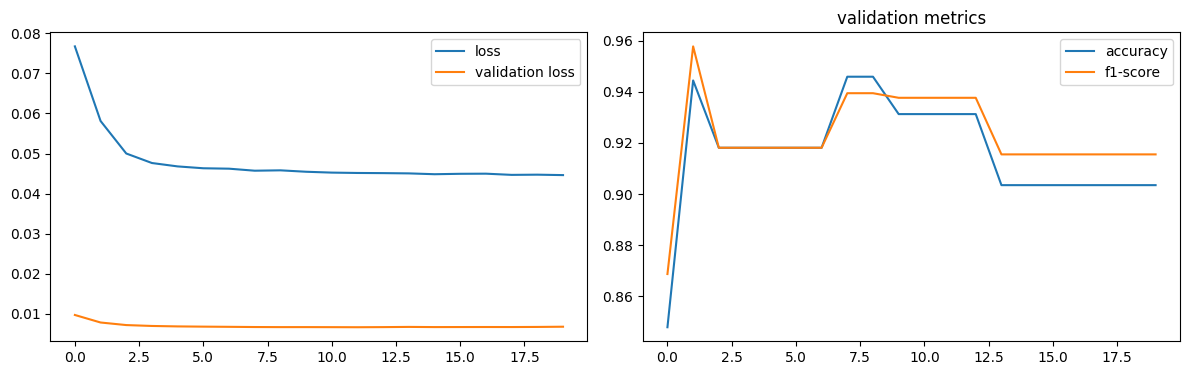

Test: loss: 0.38151222467422485, metrics: (0.91890949010849, 0.9215300679206848)
dropping feature: (1, 'perimeter3')


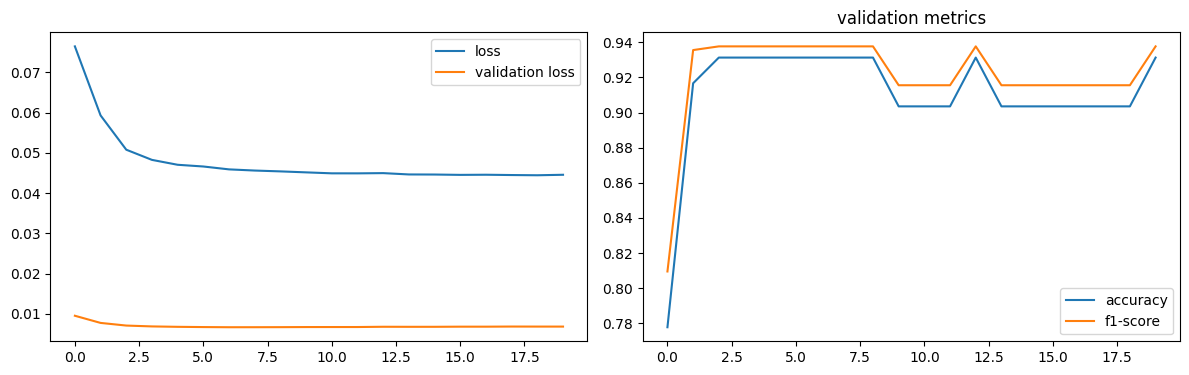

Test: loss: 0.3806595504283905, metrics: (0.9309022426605225, 0.9336024522781372)
dropping feature: (1, 'concavity3')


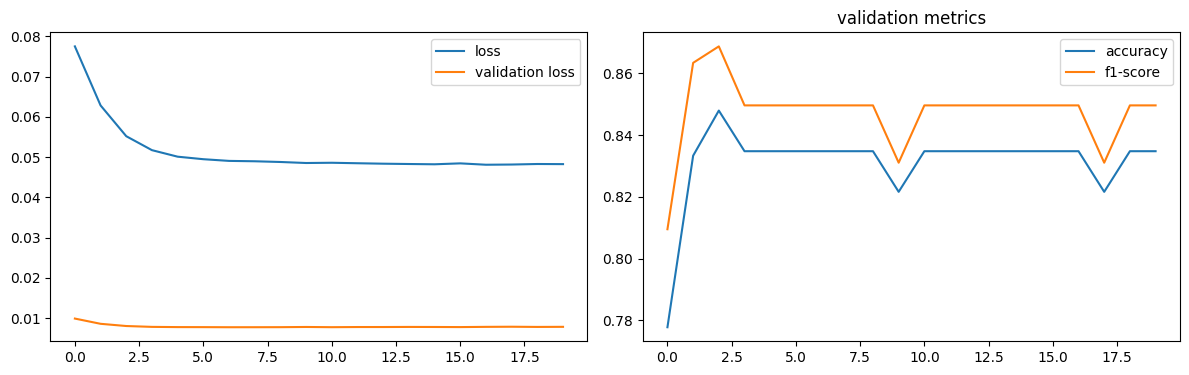

Test: loss: 0.4062245786190033, metrics: (0.9027332067489624, 0.9085593223571777)


In [11]:
datasets = breast_cancer_datasets.copy()
headers = breast_cancer_headers.copy()


def model_factory(size):
    return BreastCancerNN(size, (32, 32), 2)


test_metrics, dropped, models = prune(
    datasets, headers, analyze_dgsm,
    model_factory, optimizer_factory, criterion, score_outputs,
    labels, "", None
)

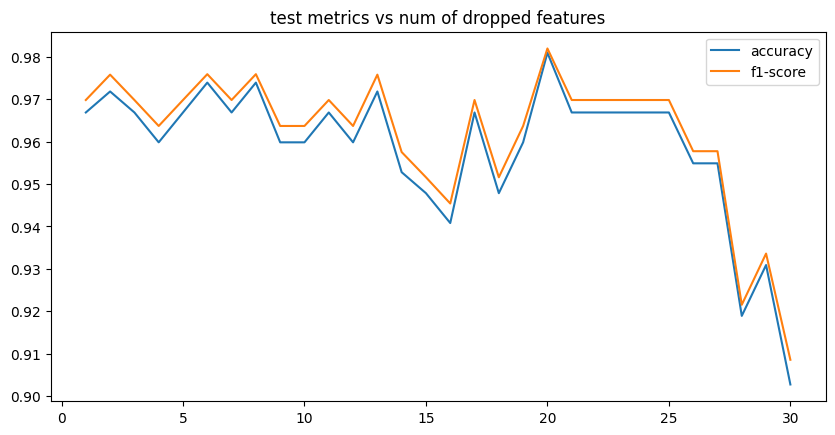

In [12]:
plt.plot(range(1, len(test_metrics)+1), test_metrics, label=labels)
plt.title("test metrics vs num of dropped features")
plt.gcf().set_figwidth(10)
plt.legend()
plt.show()

In [13]:
num_drop_features = 20

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_features)
layer = models[num_drop_features].layer1

best_model.layer1 = layer

features left [10]:  ['concave_points1', 'fractal_dimension1', 'radius2', 'area2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'concavity3']


In [14]:
dgsm_datasets = reduced_datasets

### 1st hidden layer

In [15]:
layer.eval()

datasets = {
    key: TensorDataset(
        layer(dataset.tensors[0]).detach(),
        dataset.tensors[1]
    )
    for key, dataset in reduced_datasets.items()
}

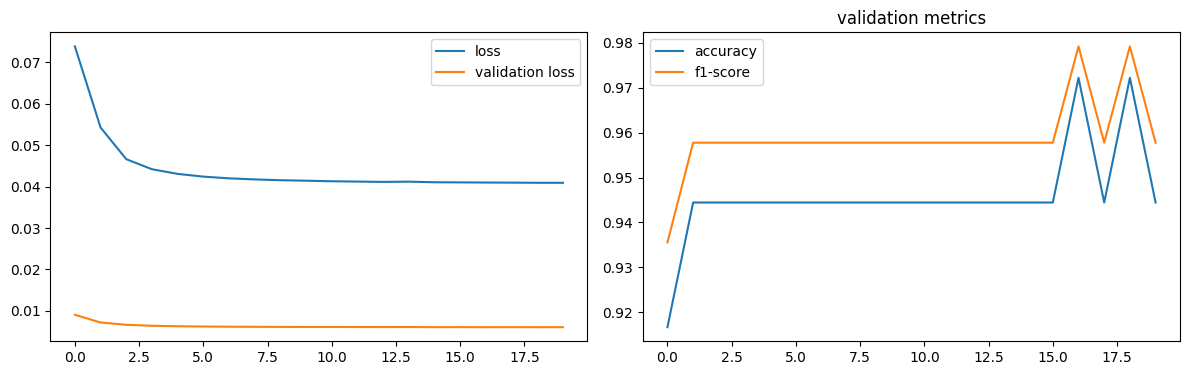

Test: loss: 0.33878886699676514, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (29, 'neuron29')


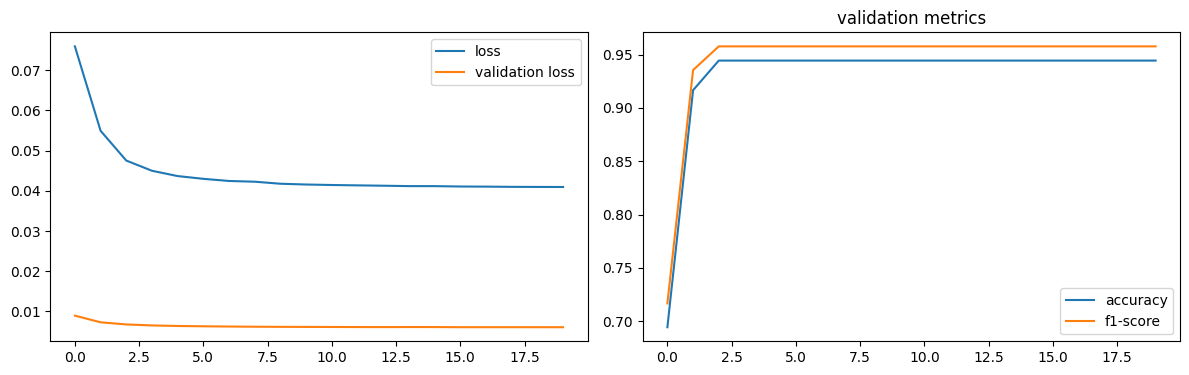

Test: loss: 0.3395004868507385, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (3, 'neuron3')


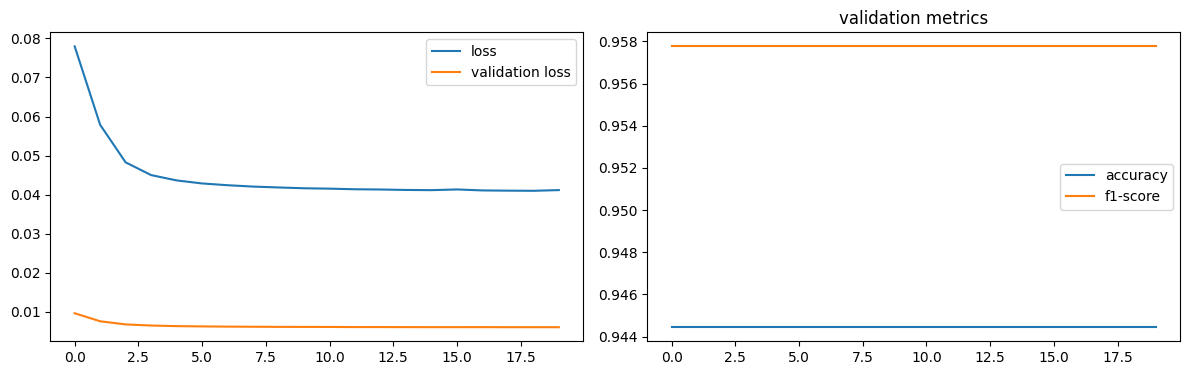

Test: loss: 0.33938100934028625, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (16, 'neuron17')


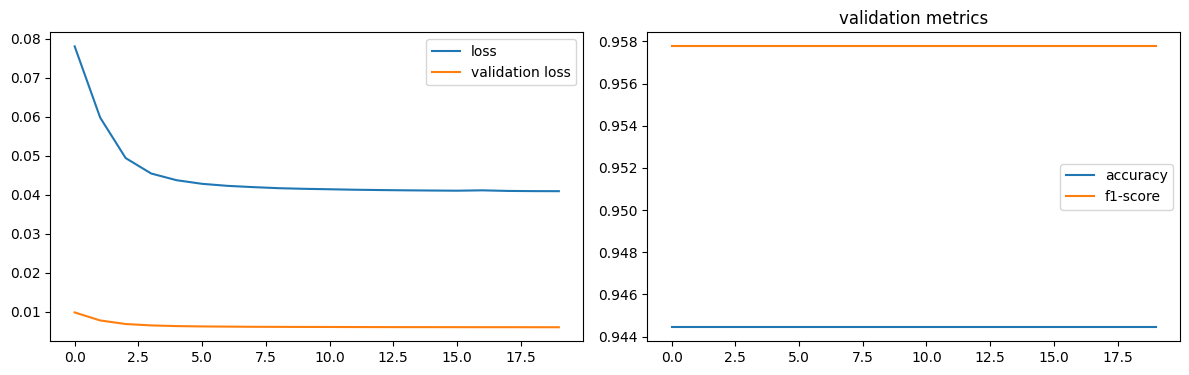

Test: loss: 0.33978497982025146, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron0')


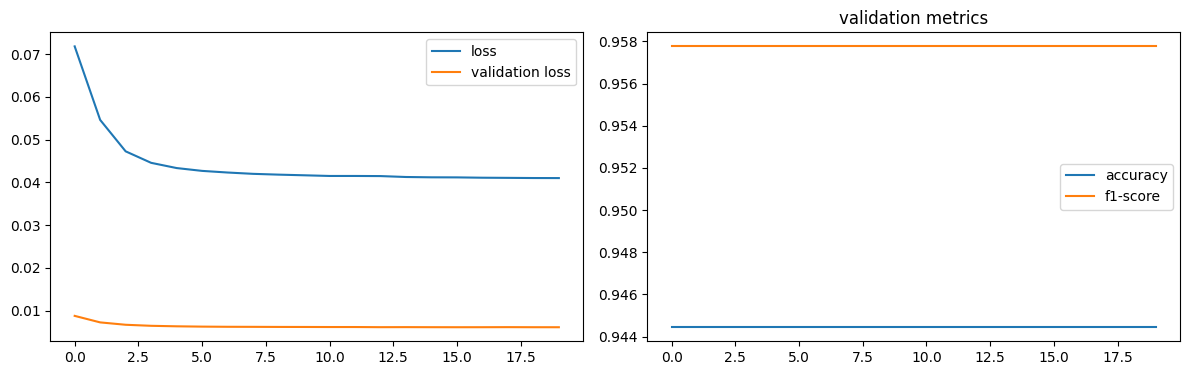

Test: loss: 0.3397430181503296, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (13, 'neuron15')


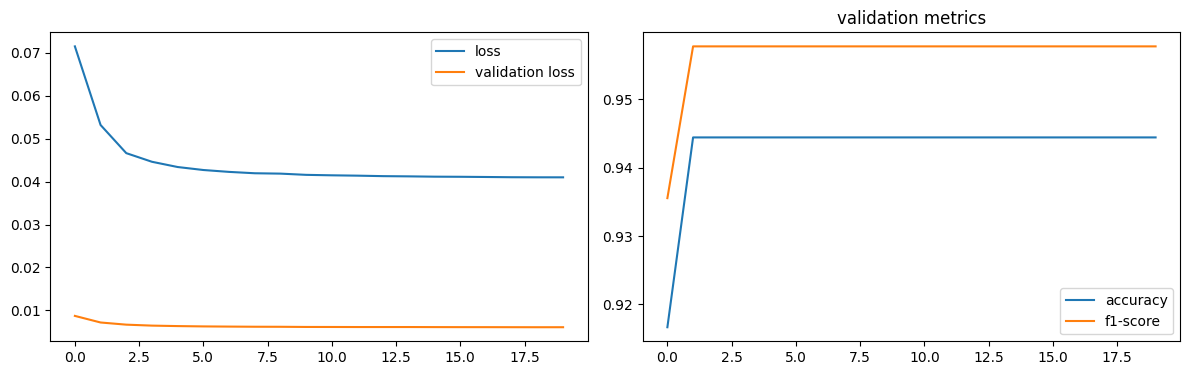

Test: loss: 0.33942919969558716, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (13, 'neuron16')


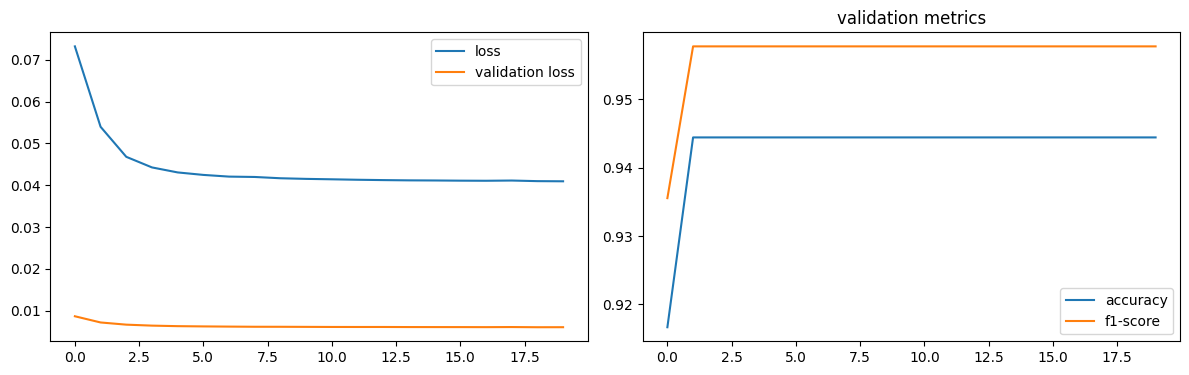

Test: loss: 0.3392794132232666, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (18, 'neuron23')


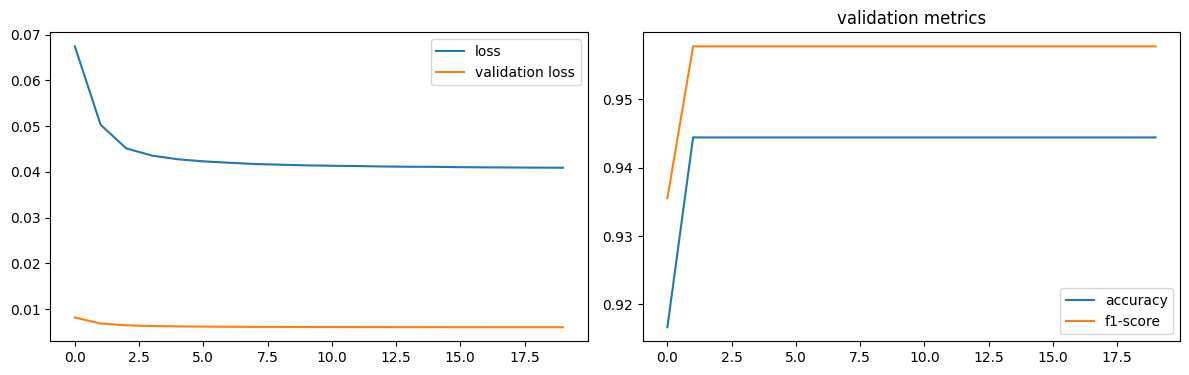

Test: loss: 0.3394414782524109, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (11, 'neuron13')


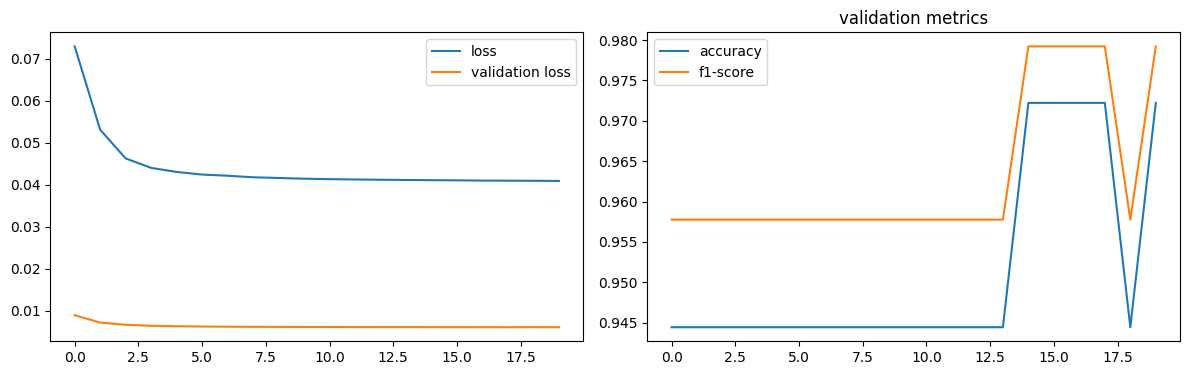

Test: loss: 0.3391627371311188, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (21, 'neuron28')


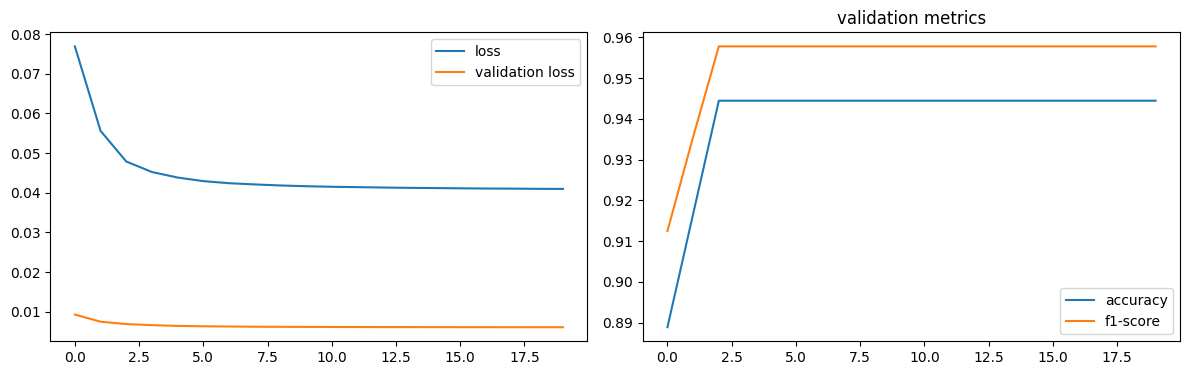

Test: loss: 0.3393038213253021, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (20, 'neuron27')


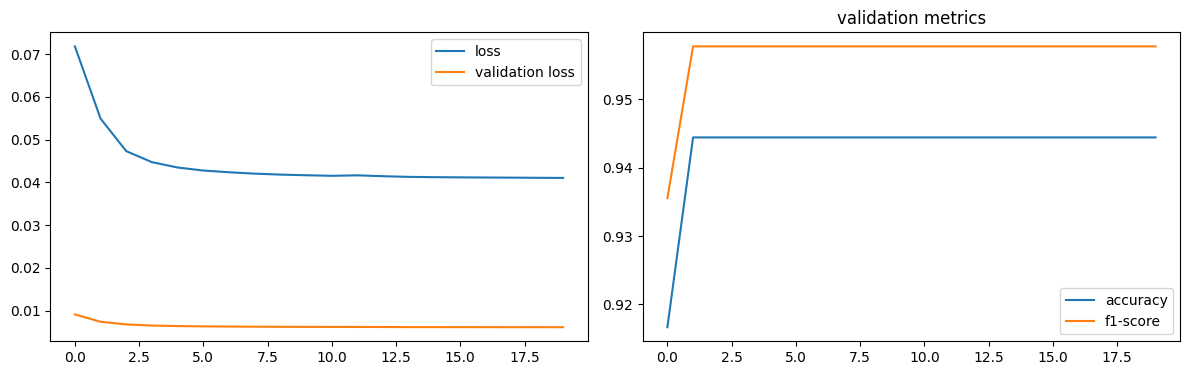

Test: loss: 0.33941030502319336, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (13, 'neuron19')


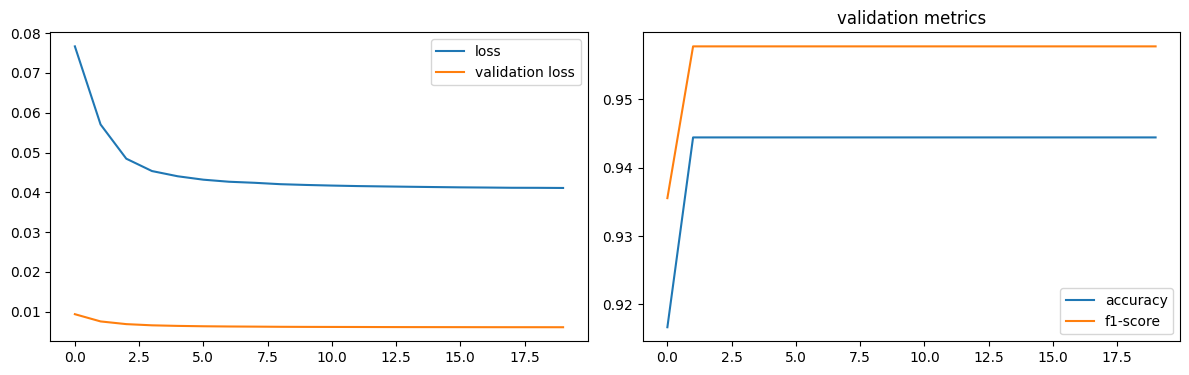

Test: loss: 0.3401128053665161, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (4, 'neuron6')


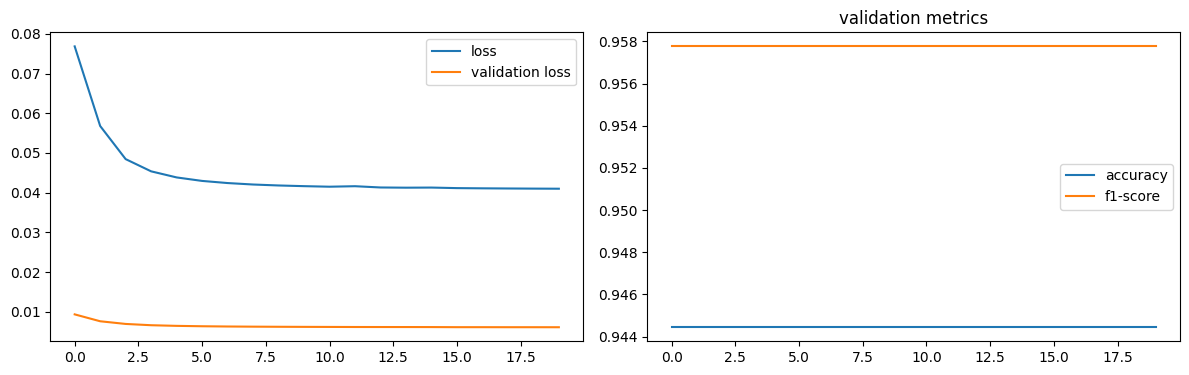

Test: loss: 0.3395270109176636, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (7, 'neuron10')


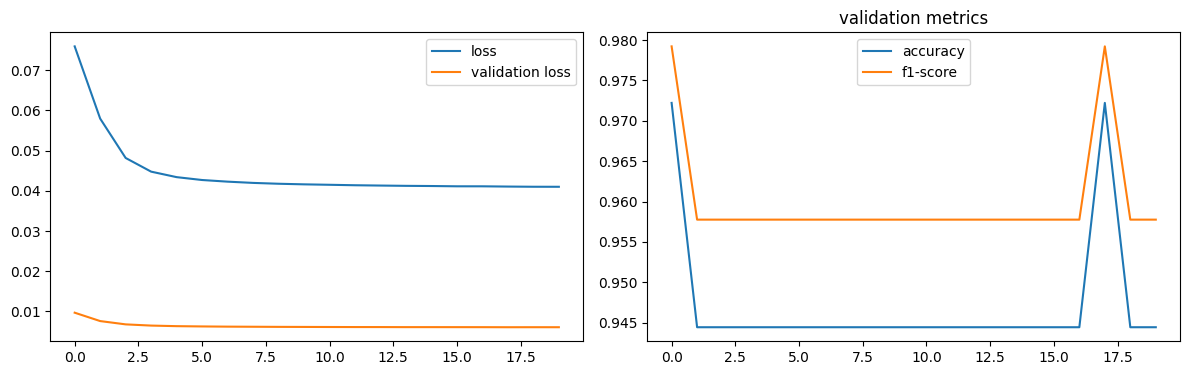

Test: loss: 0.339718222618103, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (4, 'neuron7')


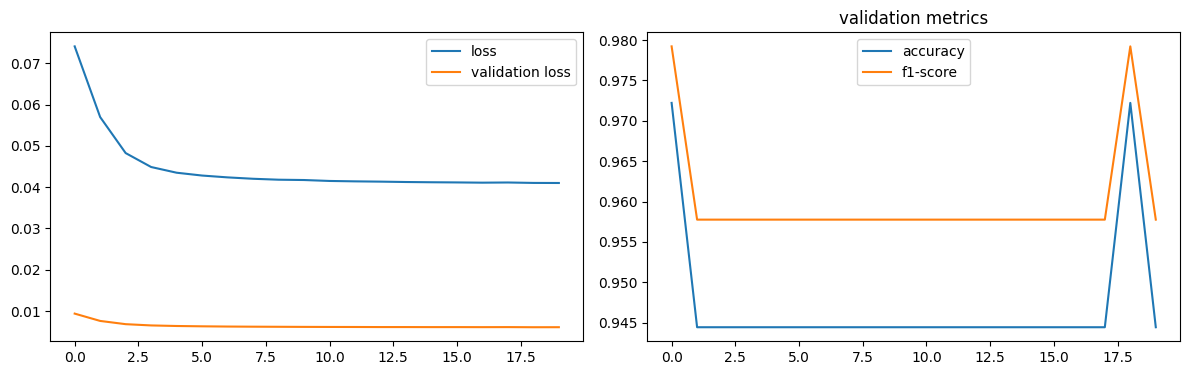

Test: loss: 0.3400599956512451, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (13, 'neuron24')


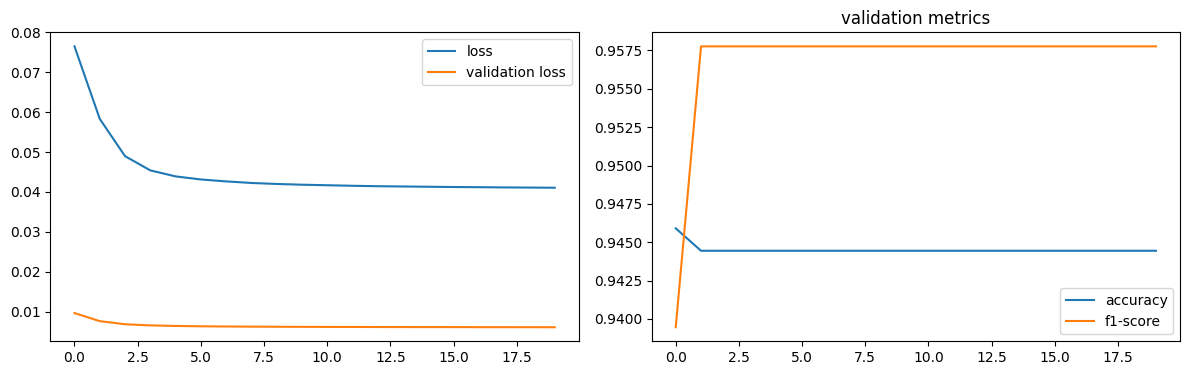

Test: loss: 0.3399318754673004, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (7, 'neuron12')


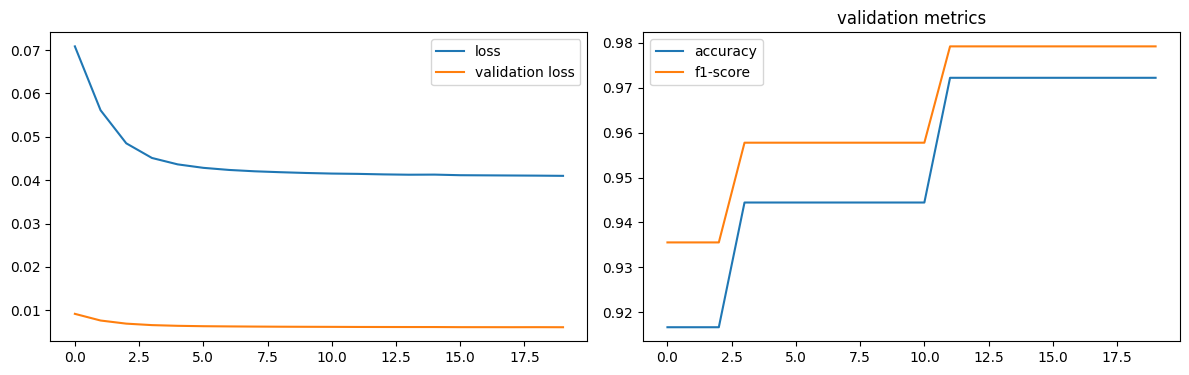

Test: loss: 0.3402288556098938, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (10, 'neuron21')


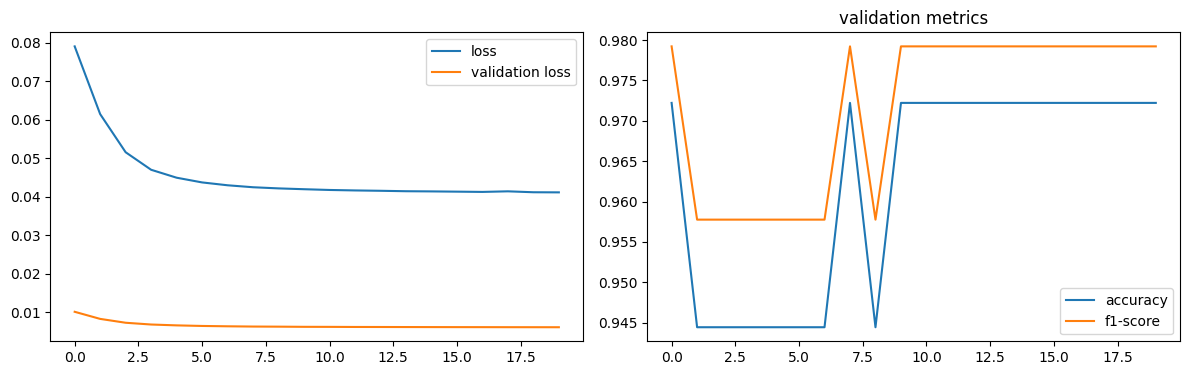

Test: loss: 0.33987119793891907, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (10, 'neuron22')


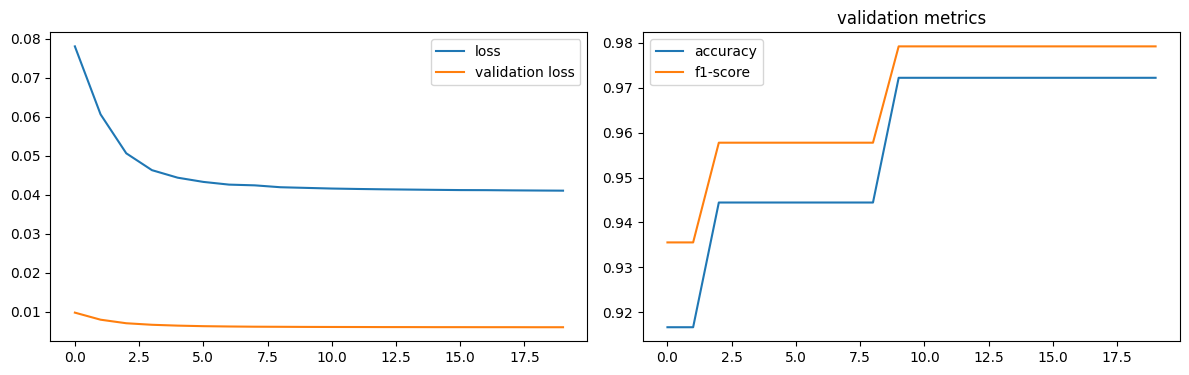

Test: loss: 0.3402062952518463, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron1')


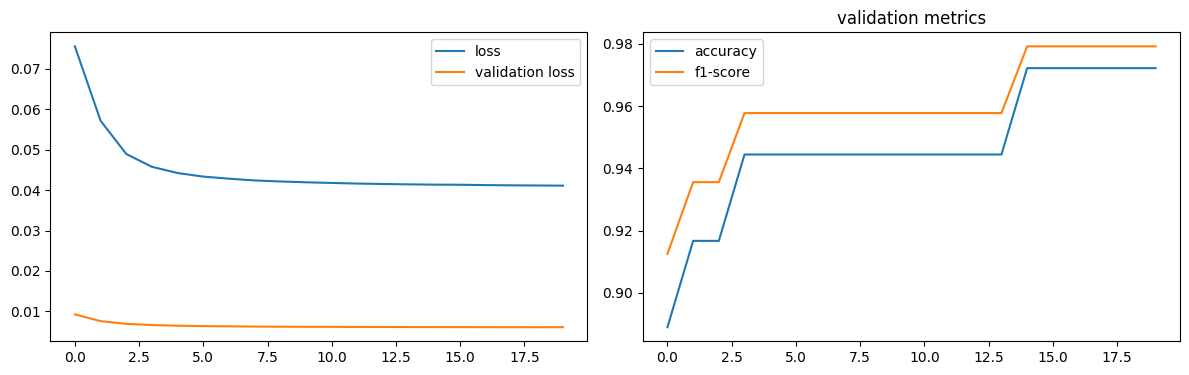

Test: loss: 0.34150421619415283, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (6, 'neuron14')


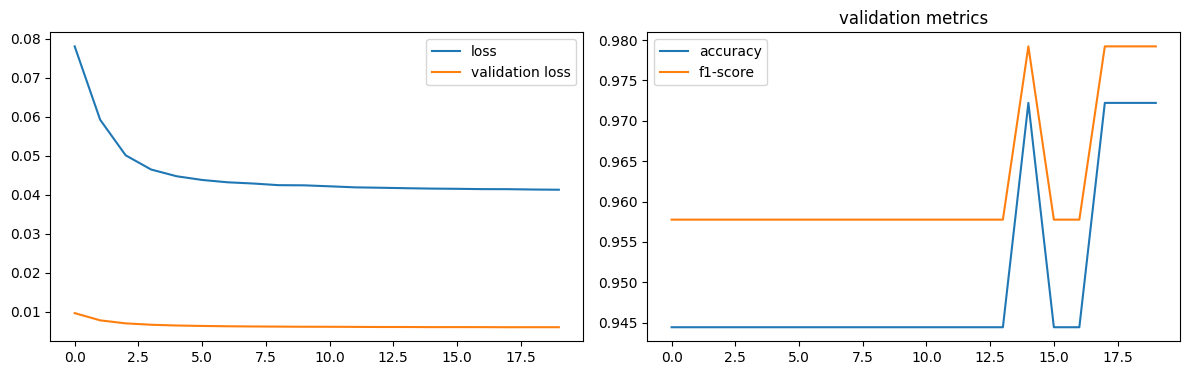

Test: loss: 0.3411303162574768, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (7, 'neuron20')


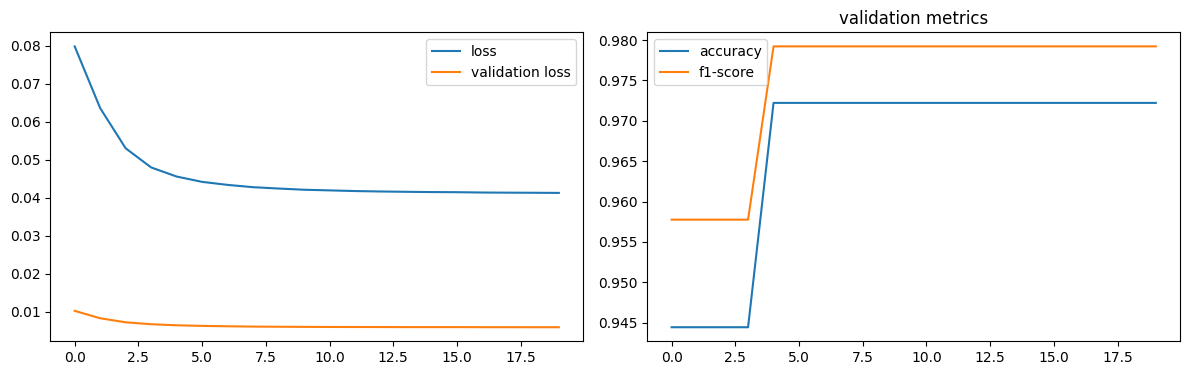

Test: loss: 0.3397383987903595, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (5, 'neuron11')


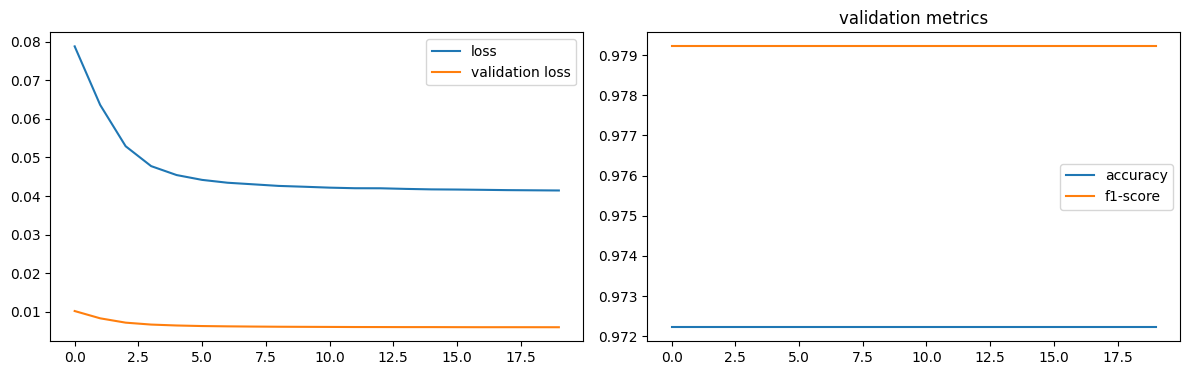

Test: loss: 0.34154650568962097, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (2, 'neuron5')


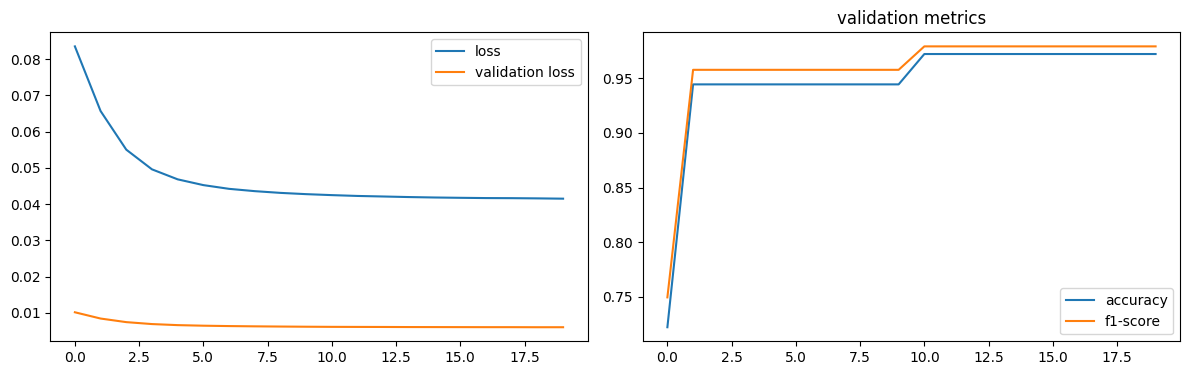

Test: loss: 0.34067097306251526, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (4, 'neuron18')


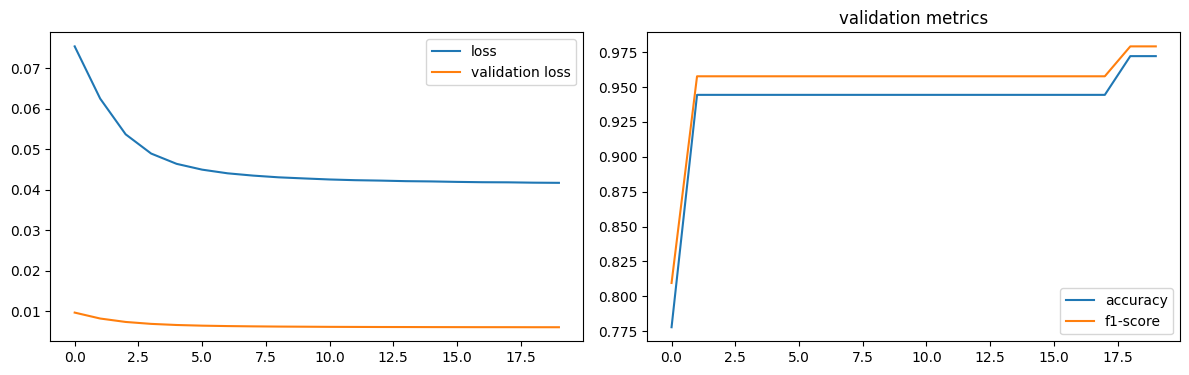

Test: loss: 0.33927199244499207, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (6, 'neuron30')


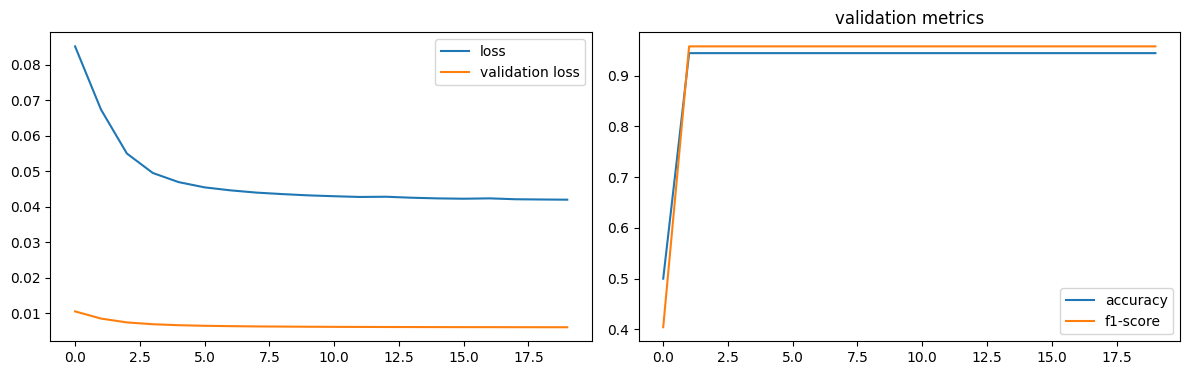

Test: loss: 0.34015920758247375, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (3, 'neuron9')


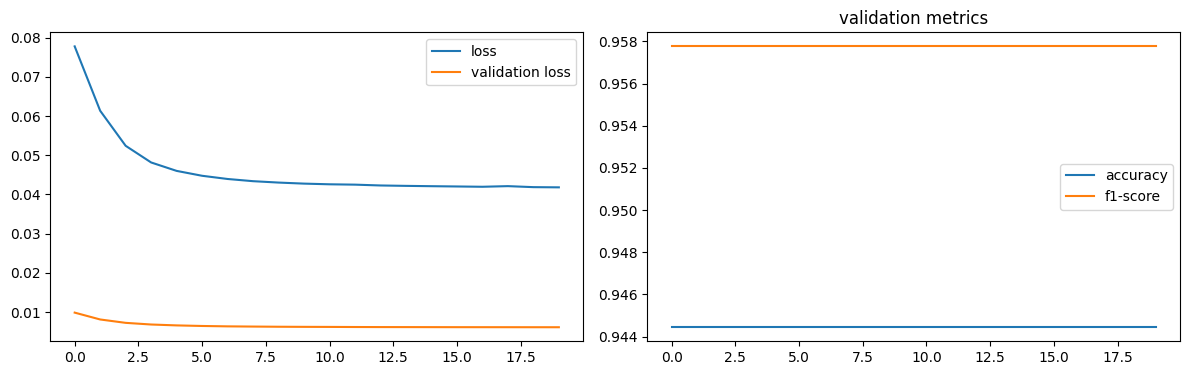

Test: loss: 0.33936986327171326, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (2, 'neuron8')


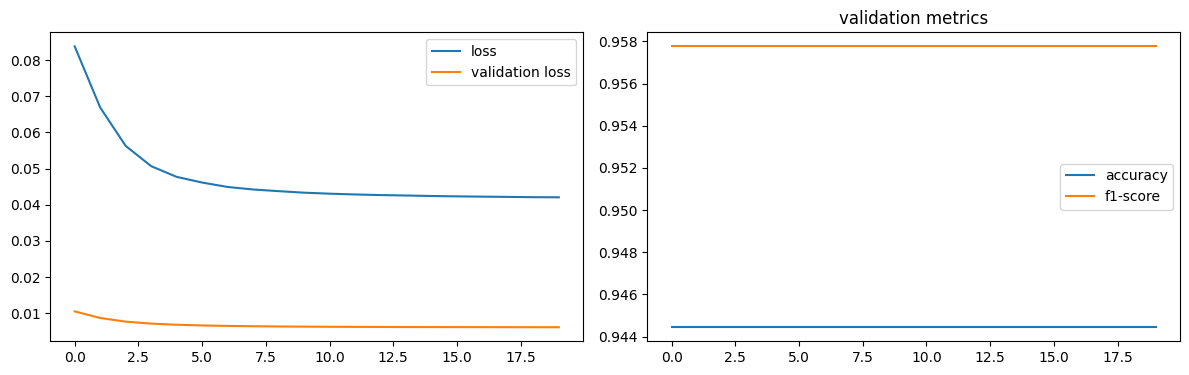

Test: loss: 0.3415715992450714, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron2')


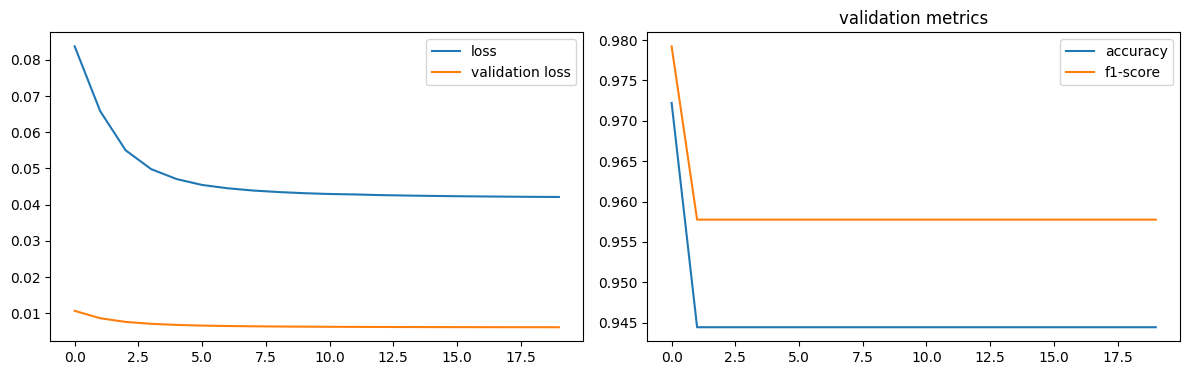

Test: loss: 0.3416624367237091, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (1, 'neuron25')


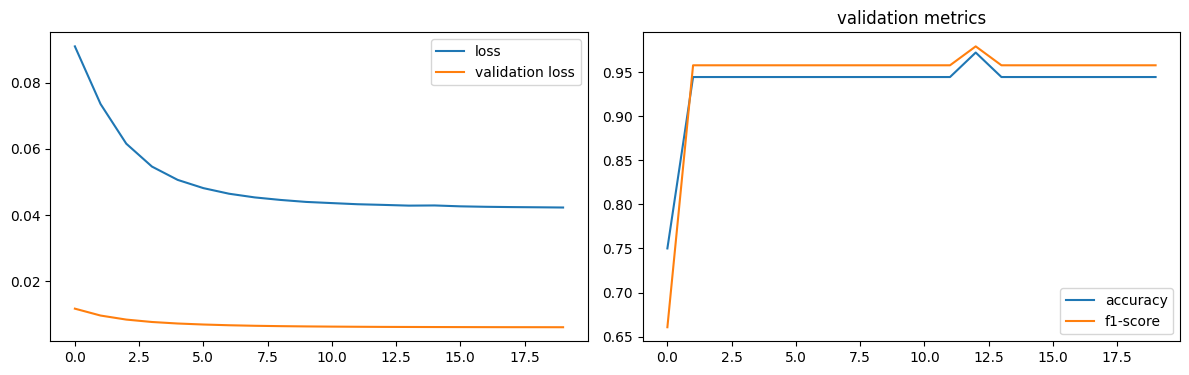

Test: loss: 0.3427172303199768, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (1, 'neuron26')


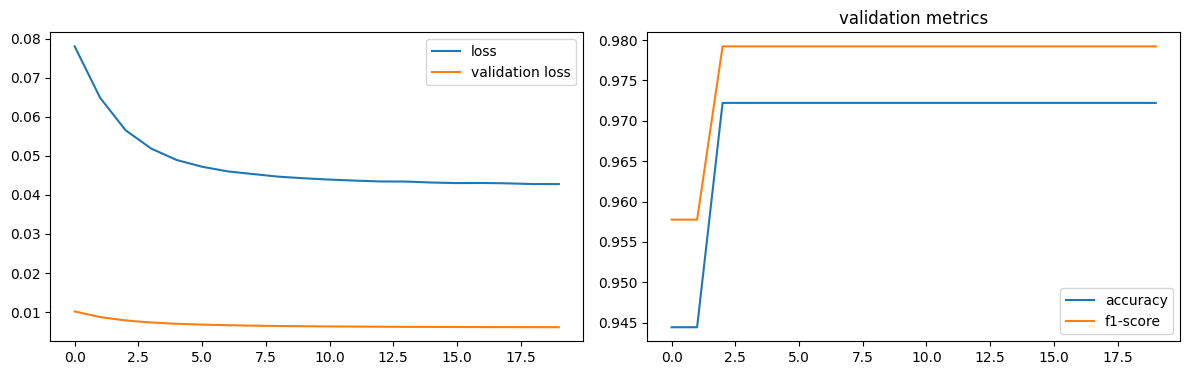

Test: loss: 0.34583356976509094, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron4')


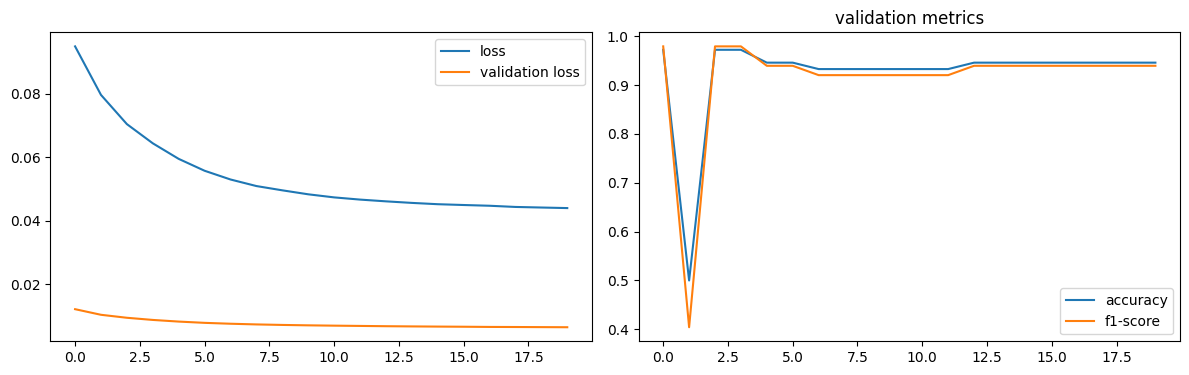

Test: loss: 0.3560687005519867, metrics: (0.9590712785720825, 0.9581115245819092)


In [16]:
headers = [f"neuron{i}" for i in range(32)]


def model_factory(size):
    model = BreastCancerNN(1, (size, 32), 2)
    model.layer1 = nn.Identity()
    return model


def optimizer_factory(model):
    return optim.Adam(model.parameters(), lr=0.001)


test_metrics, dropped, models = prune(
    datasets, headers, analyze_dgsm,
    model_factory, optimizer_factory, criterion, score_outputs,
    labels, "", None
)

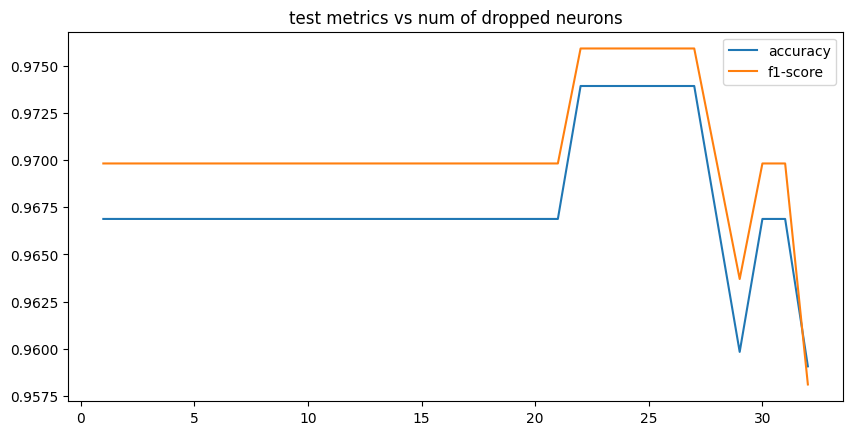

In [17]:
plt.plot(range(1, len(test_metrics)+1), test_metrics, label=labels)
plt.title("test metrics vs num of dropped neurons")
plt.gcf().set_figwidth(10)
plt.legend()
plt.show()

In [18]:
num_drop_neurons = 27

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_neurons)
layer = models[num_drop_neurons].layer2

best_model.layer2 = layer
best_model.layer1[0] = reduce_linear(best_model.layer1[0], dropped, num_drop_neurons)

features left [5]:  ['neuron2', 'neuron4', 'neuron25', 'neuron26', 'neuron31']


### 2nd hidden layer

In [19]:
layer.eval()

datasets = {
    key: TensorDataset(
        layer(dataset.tensors[0]).detach(),
        dataset.tensors[1]
    )
    for key, dataset in reduced_datasets.items()
}

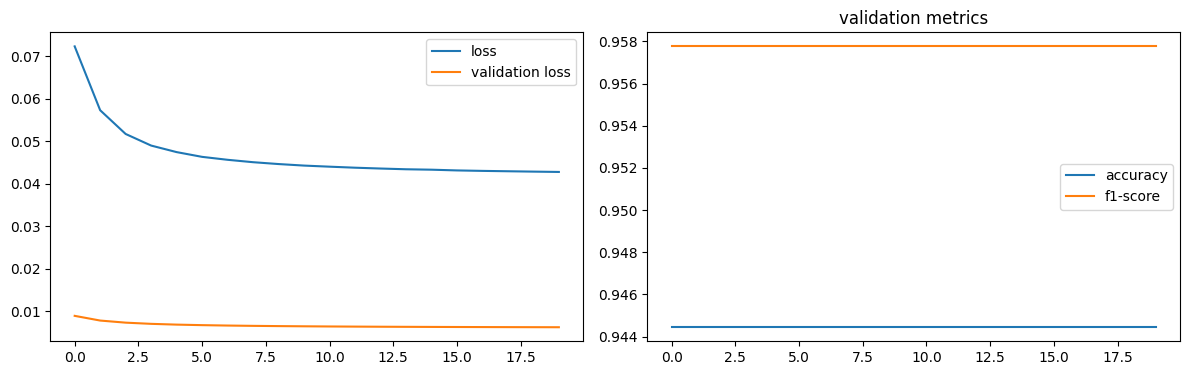

Test: loss: 0.34698376059532166, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (11, 'neuron11')


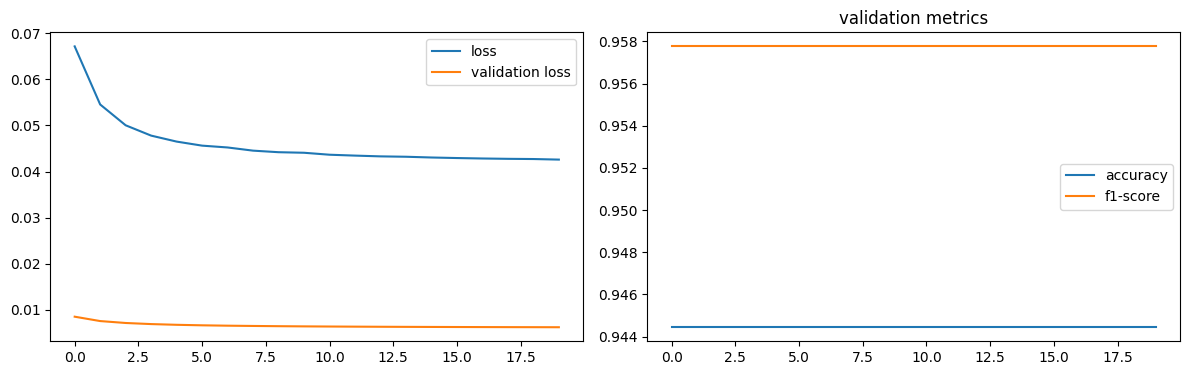

Test: loss: 0.3451526463031769, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (28, 'neuron29')


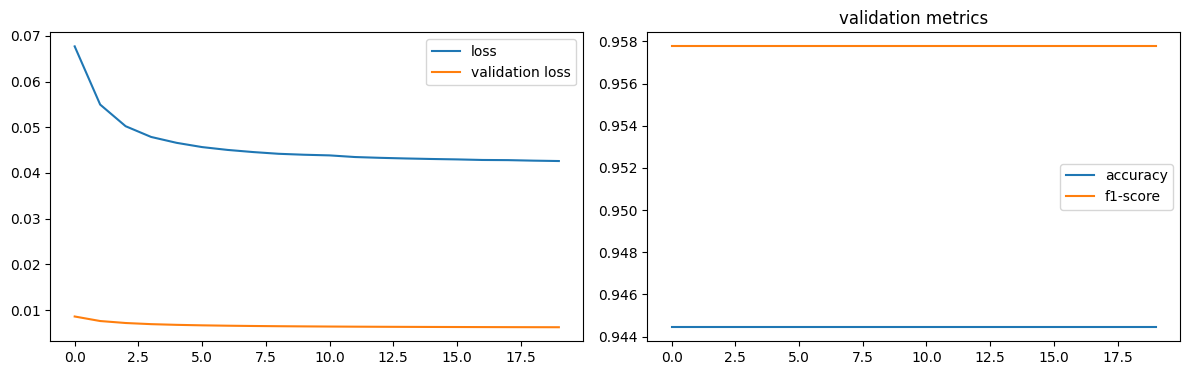

Test: loss: 0.3451940417289734, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (26, 'neuron27')


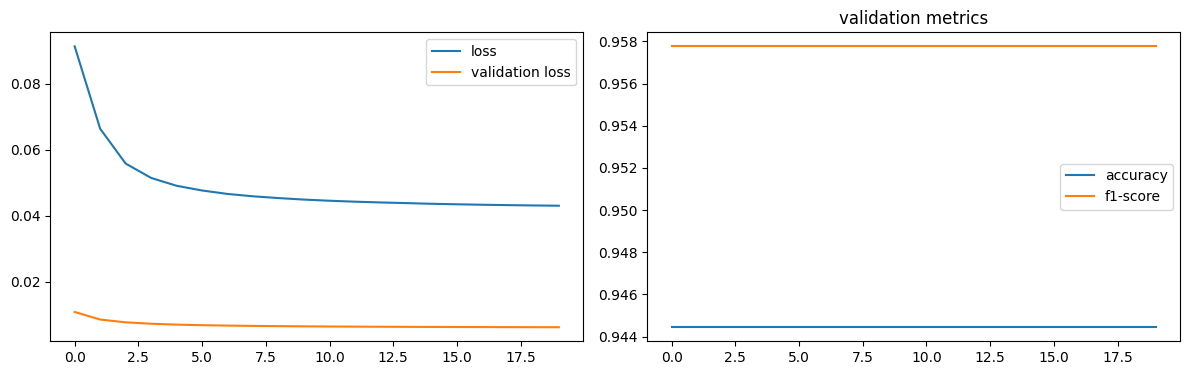

Test: loss: 0.3483268916606903, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (14, 'neuron15')


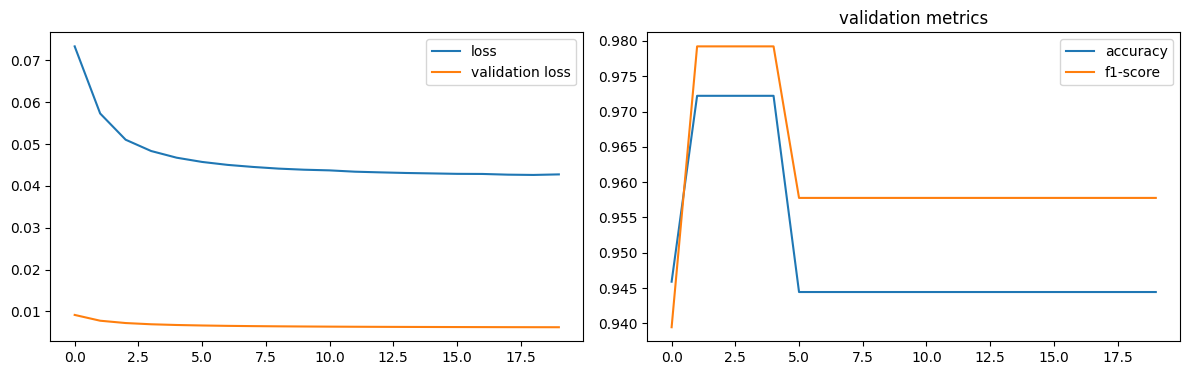

Test: loss: 0.3435937166213989, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (3, 'neuron3')


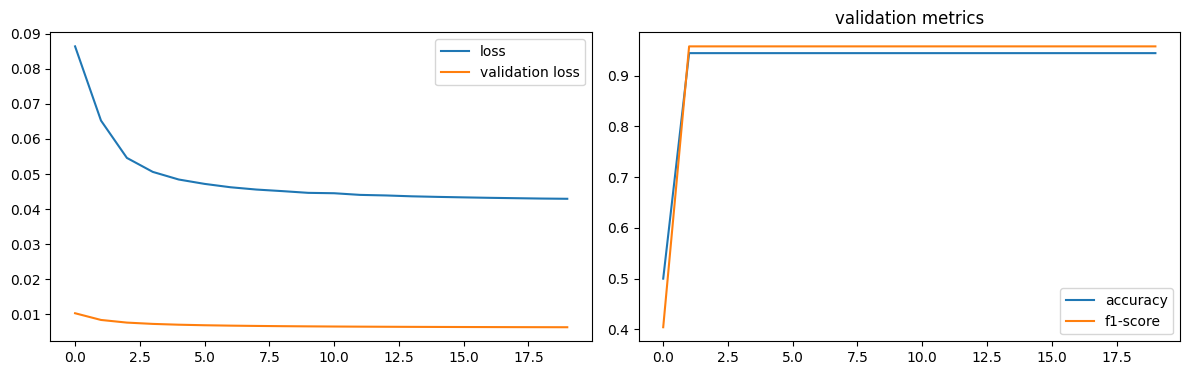

Test: loss: 0.3480069935321808, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (20, 'neuron23')


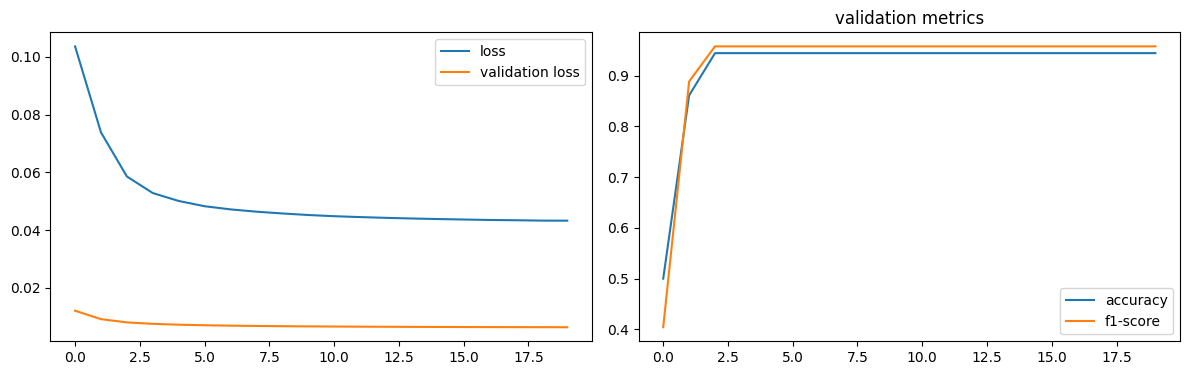

Test: loss: 0.3496880829334259, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (20, 'neuron24')


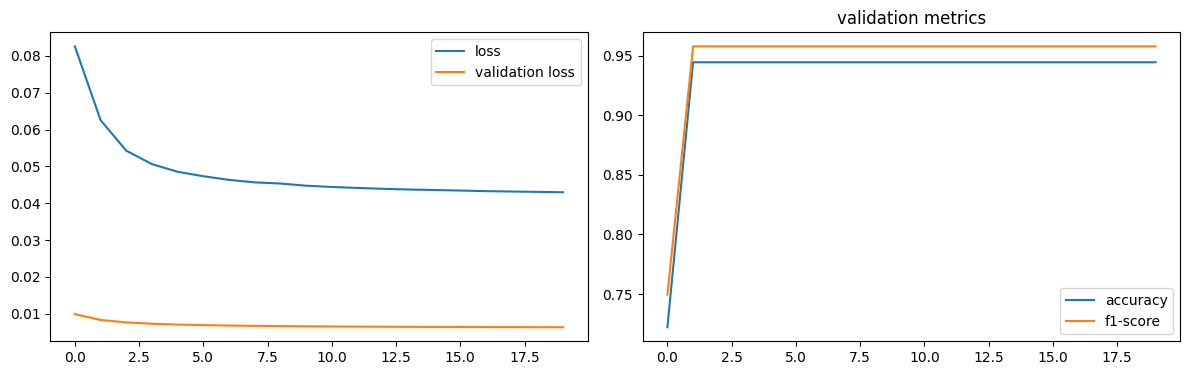

Test: loss: 0.34819549322128296, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (9, 'neuron10')


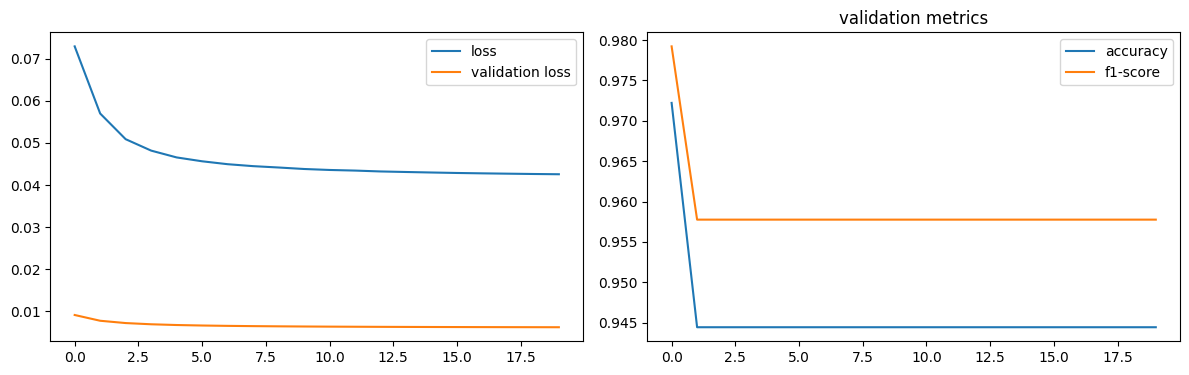

Test: loss: 0.3439161479473114, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (21, 'neuron28')


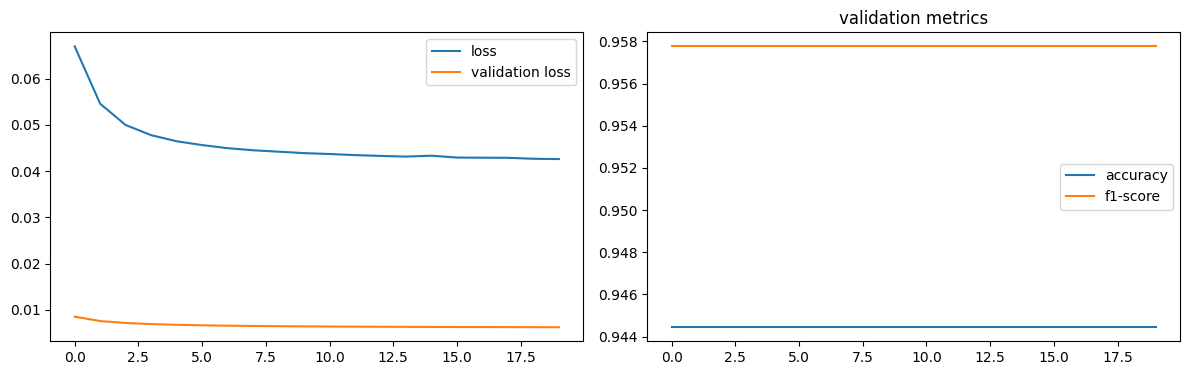

Test: loss: 0.34524011611938477, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (1, 'neuron1')


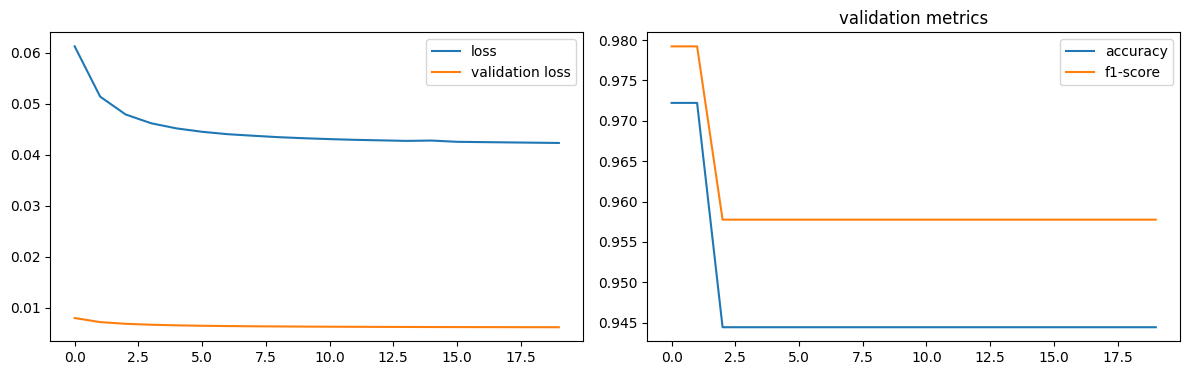

Test: loss: 0.3422645926475525, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (16, 'neuron21')


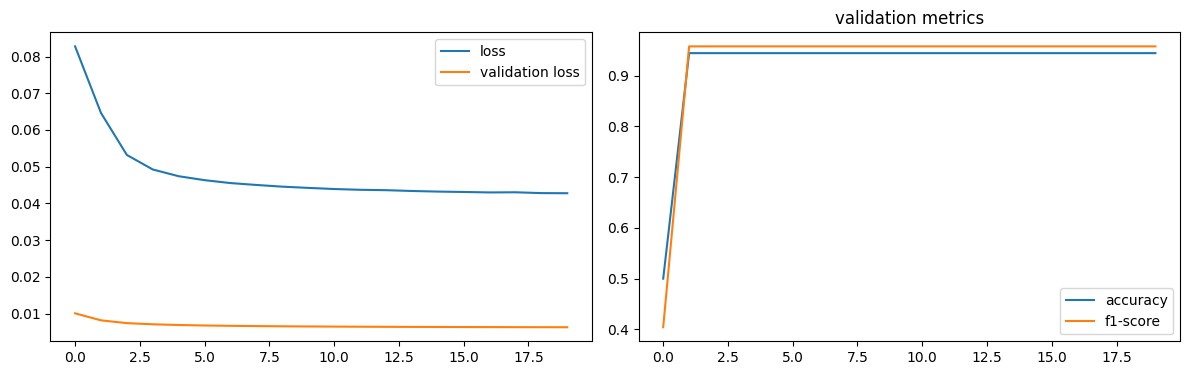

Test: loss: 0.34696313738822937, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (4, 'neuron6')


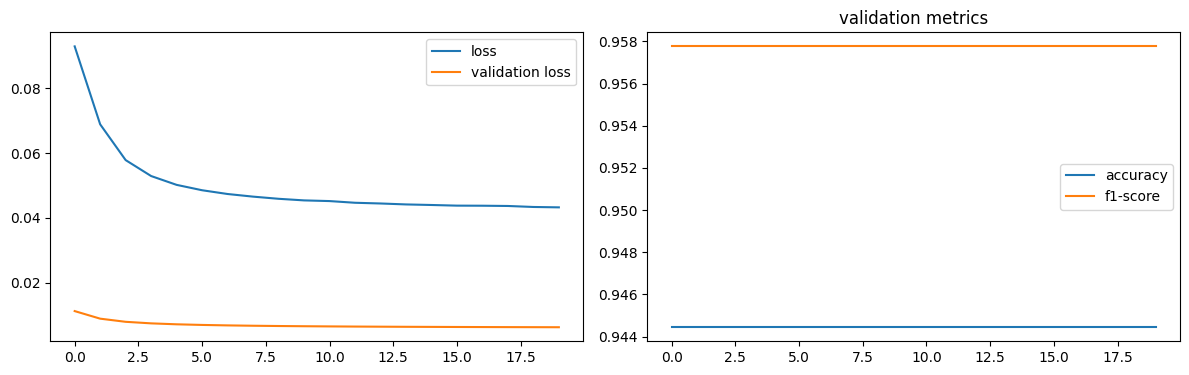

Test: loss: 0.3498947024345398, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (3, 'neuron5')


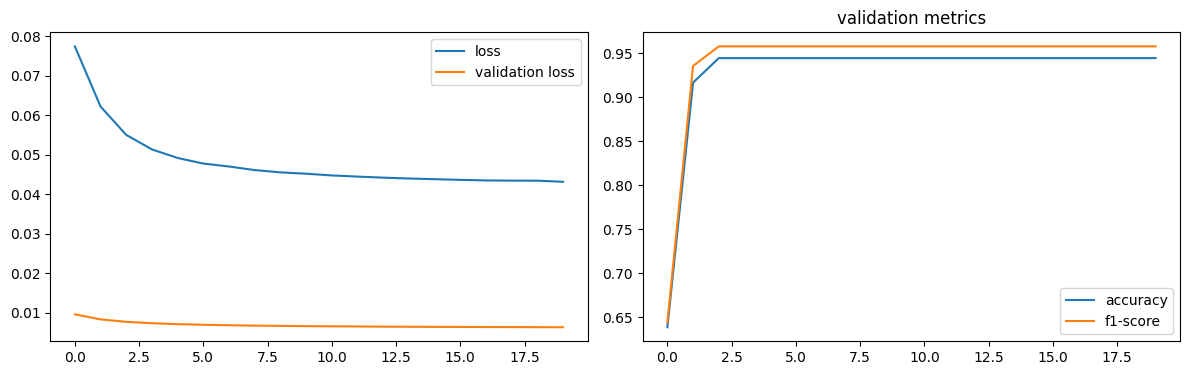

Test: loss: 0.34930166602134705, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (18, 'neuron31')


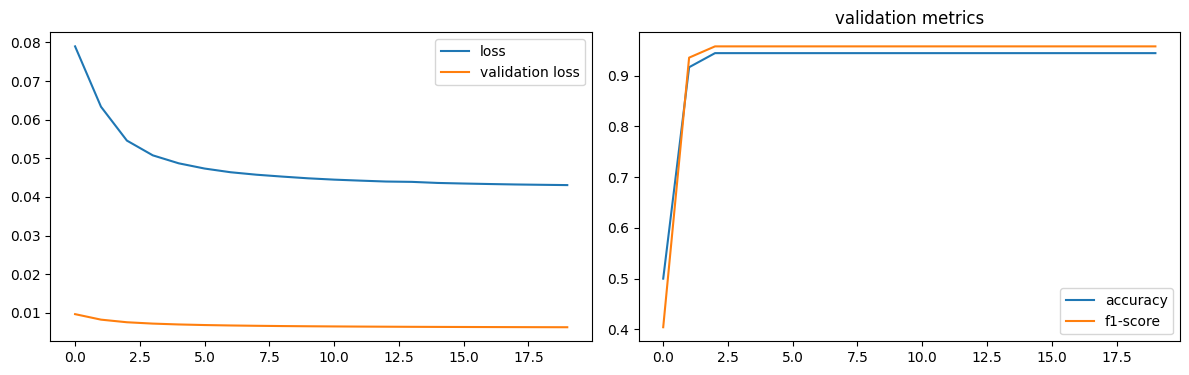

Test: loss: 0.348675936460495, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (3, 'neuron7')


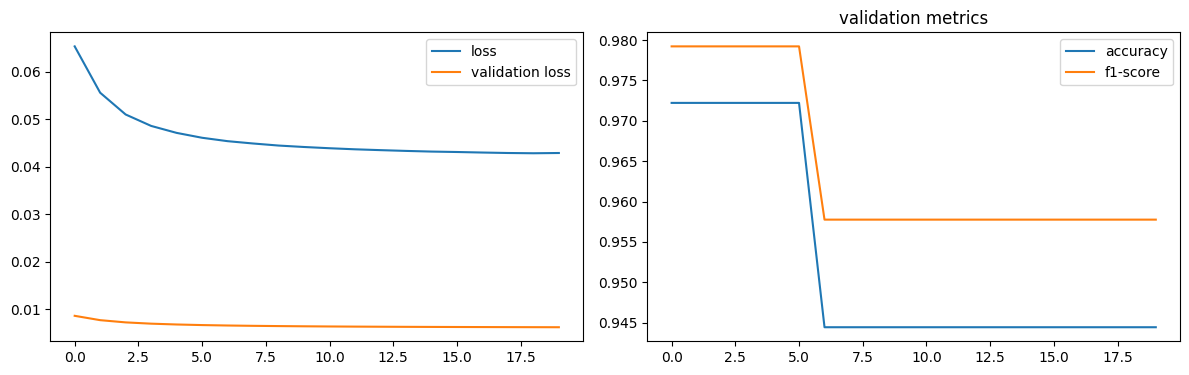

Test: loss: 0.34483402967453003, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (4, 'neuron9')


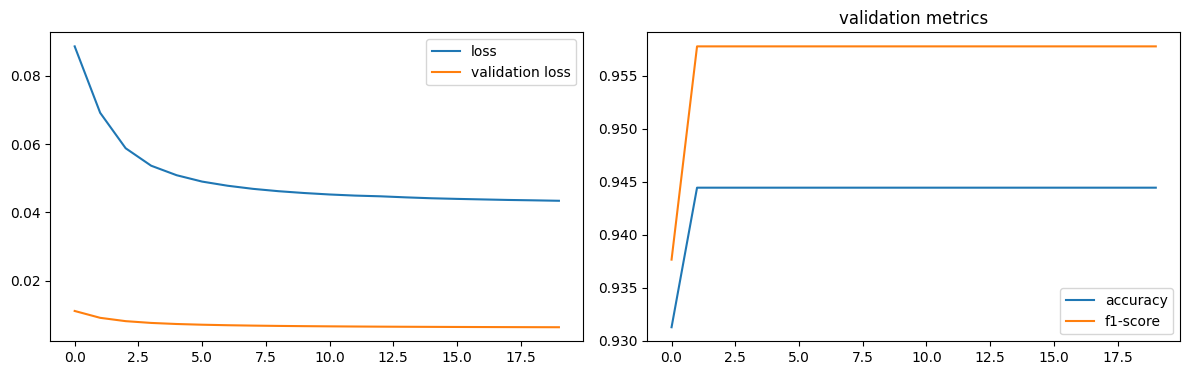

Test: loss: 0.3504067659378052, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (15, 'neuron30')


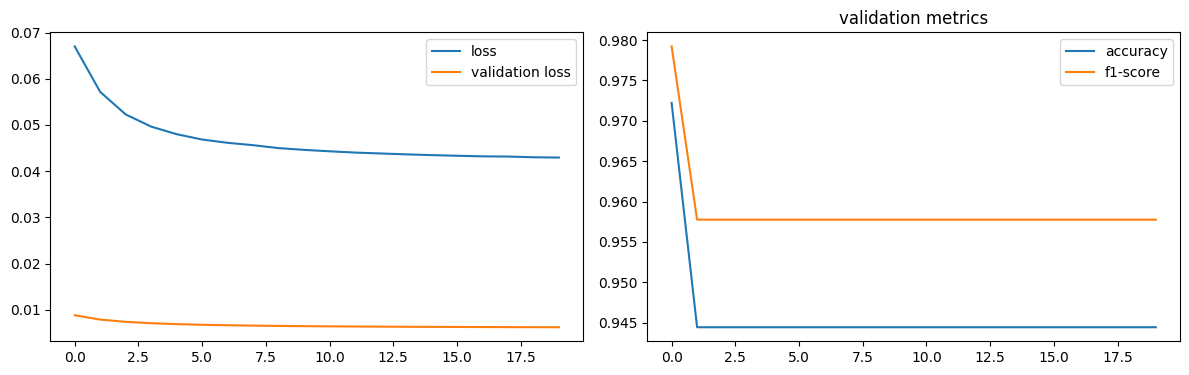

Test: loss: 0.34664660692214966, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (11, 'neuron20')


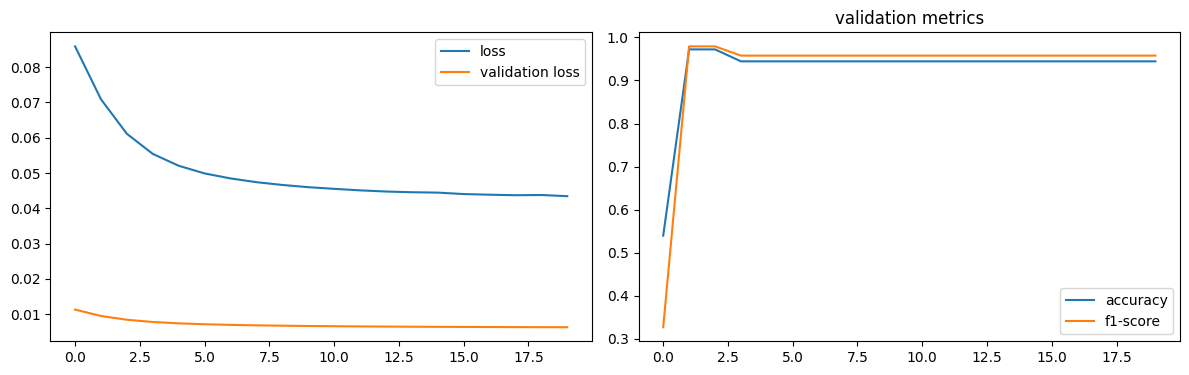

Test: loss: 0.34945204854011536, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (9, 'neuron18')


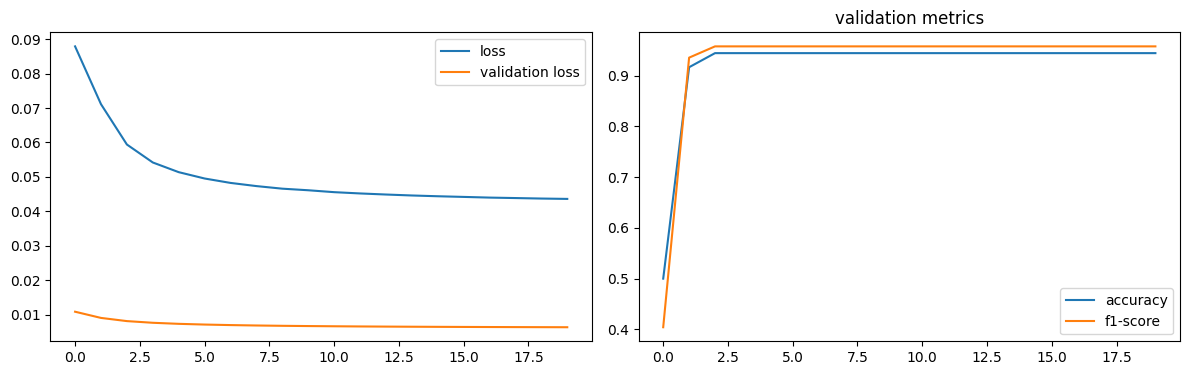

Test: loss: 0.35188400745391846, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (10, 'neuron22')


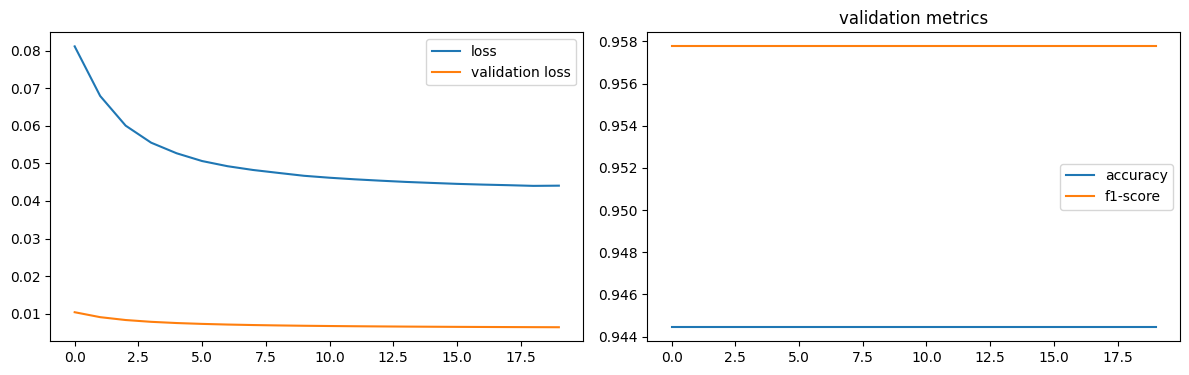

Test: loss: 0.3540407121181488, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (1, 'neuron2')


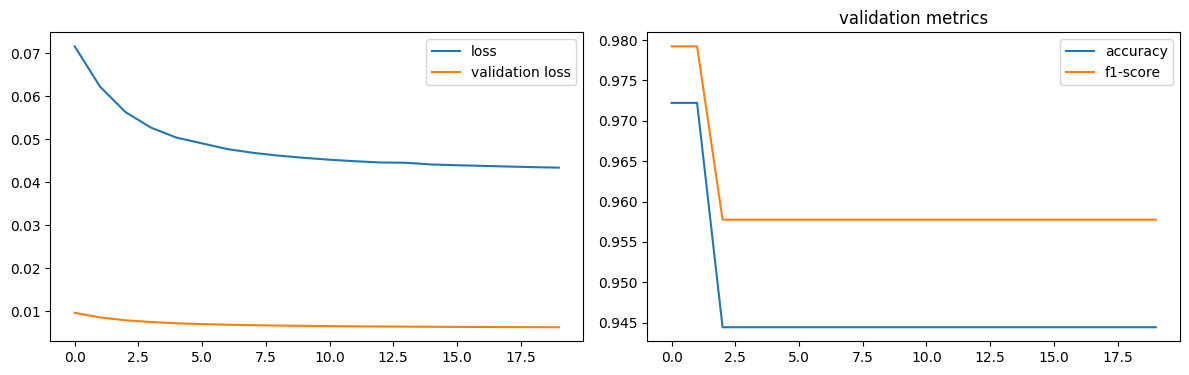

Test: loss: 0.3499529957771301, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (10, 'neuron26')


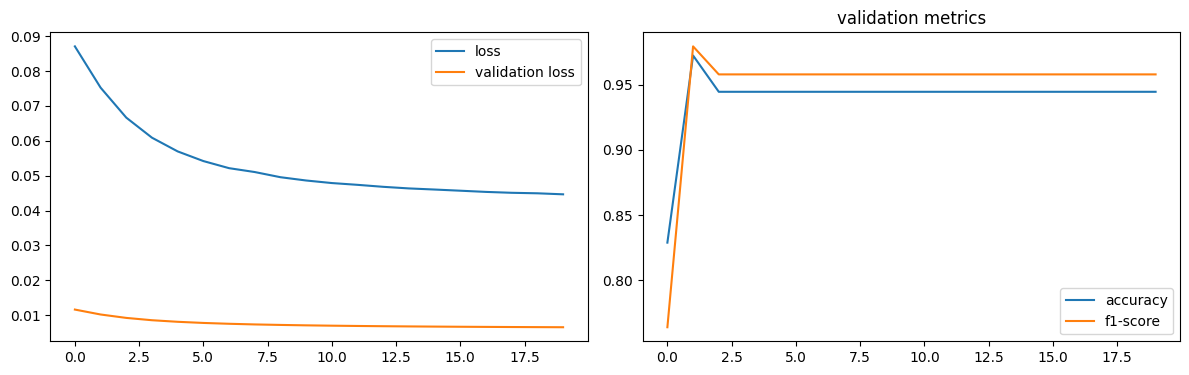

Test: loss: 0.35982638597488403, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (1, 'neuron4')


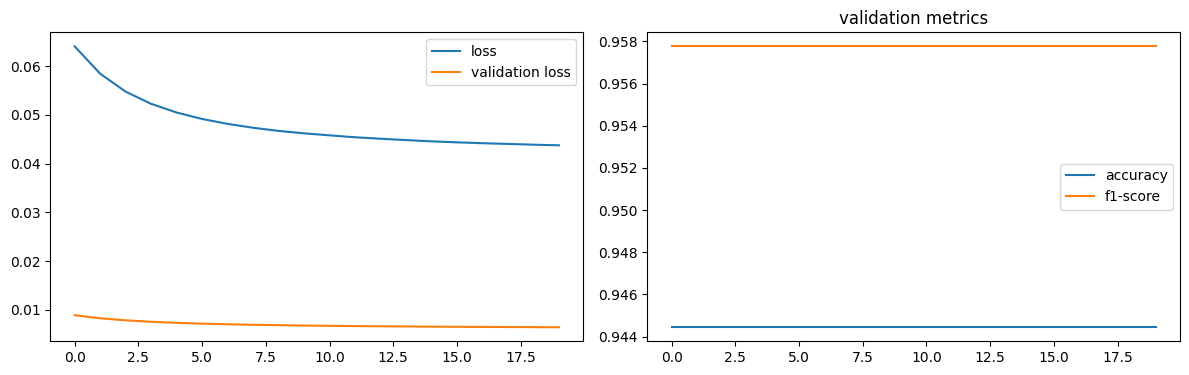

Test: loss: 0.35268083214759827, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (8, 'neuron25')


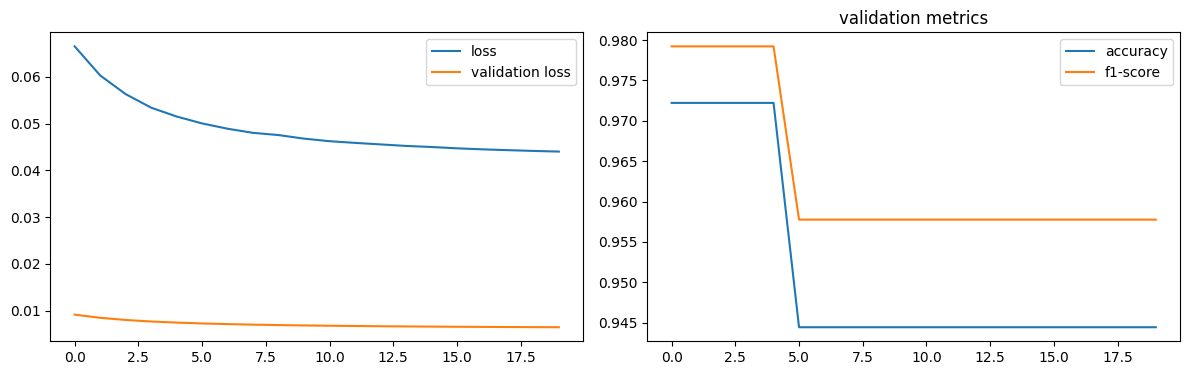

Test: loss: 0.35459578037261963, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (5, 'neuron16')


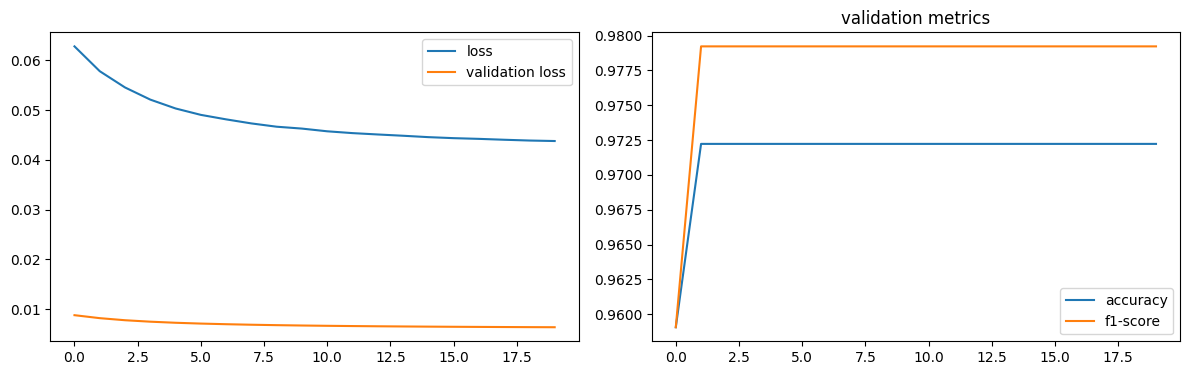

Test: loss: 0.3522328734397888, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (6, 'neuron19')


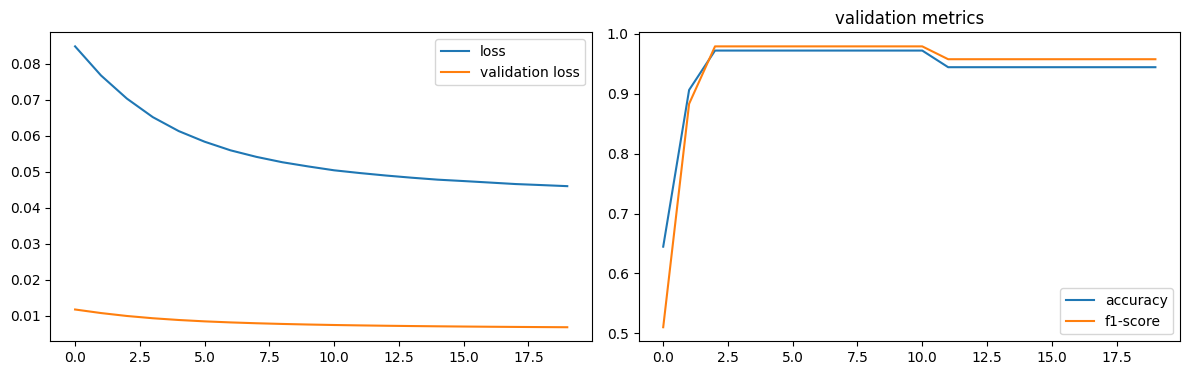

Test: loss: 0.3686797618865967, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (3, 'neuron13')


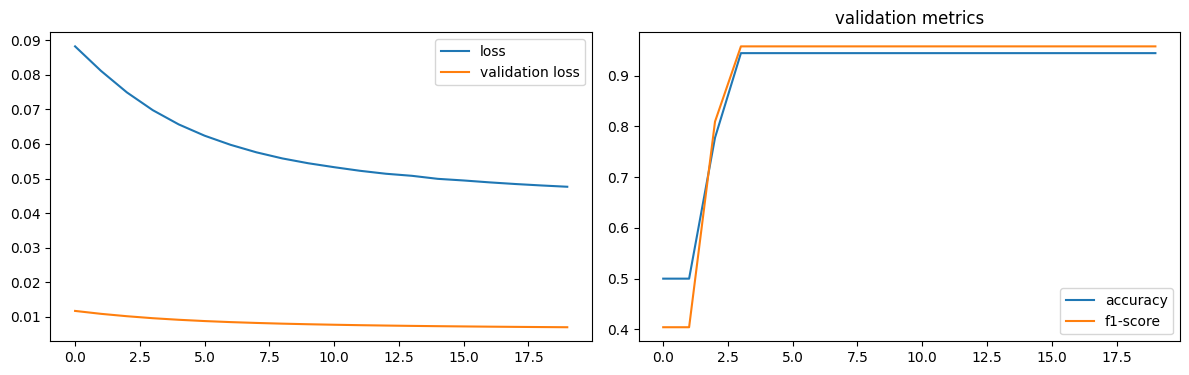

Test: loss: 0.38294872641563416, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (2, 'neuron12')


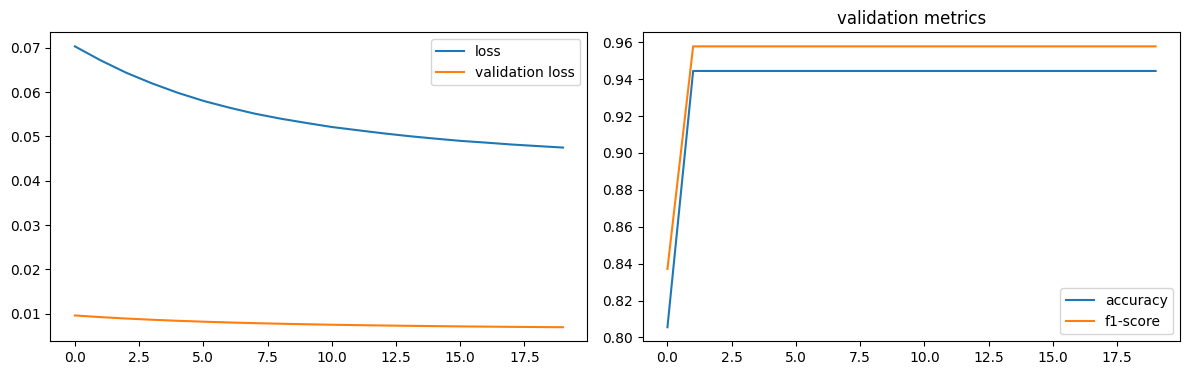

Test: loss: 0.3828114867210388, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (2, 'neuron14')


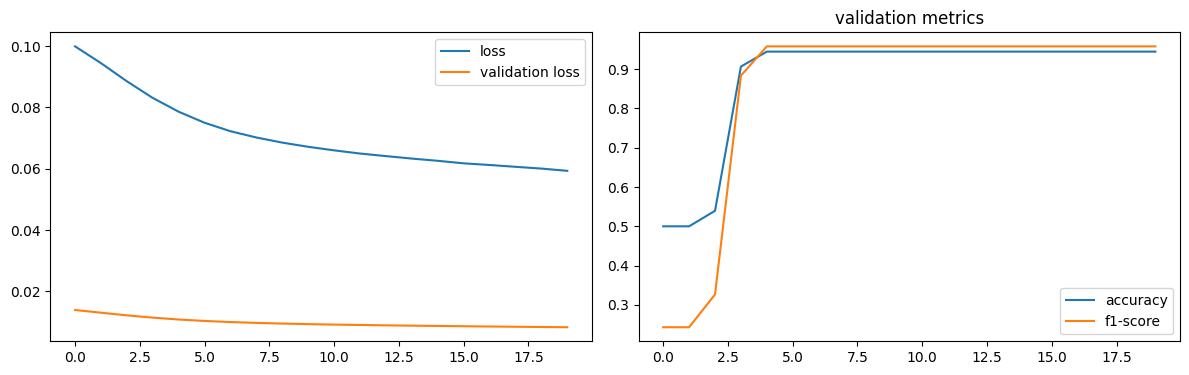

Test: loss: 0.4795018434524536, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (2, 'neuron17')


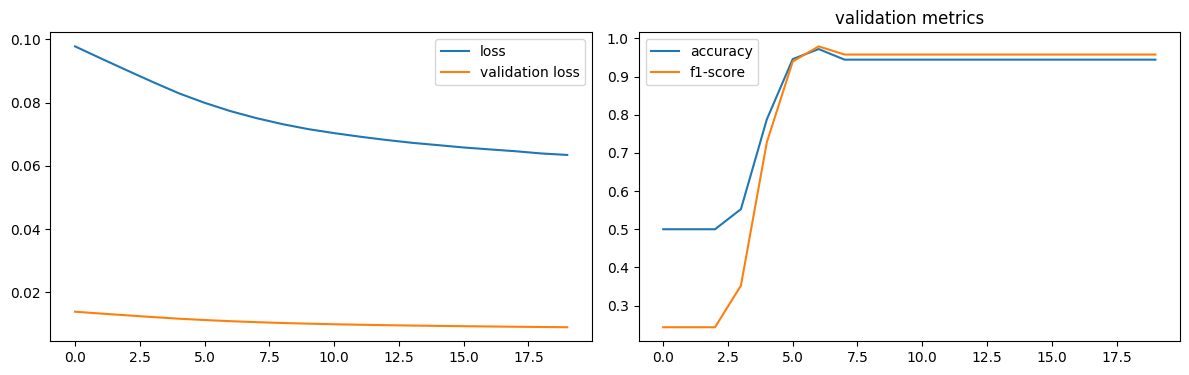

Test: loss: 0.5106601119041443, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (1, 'neuron8')


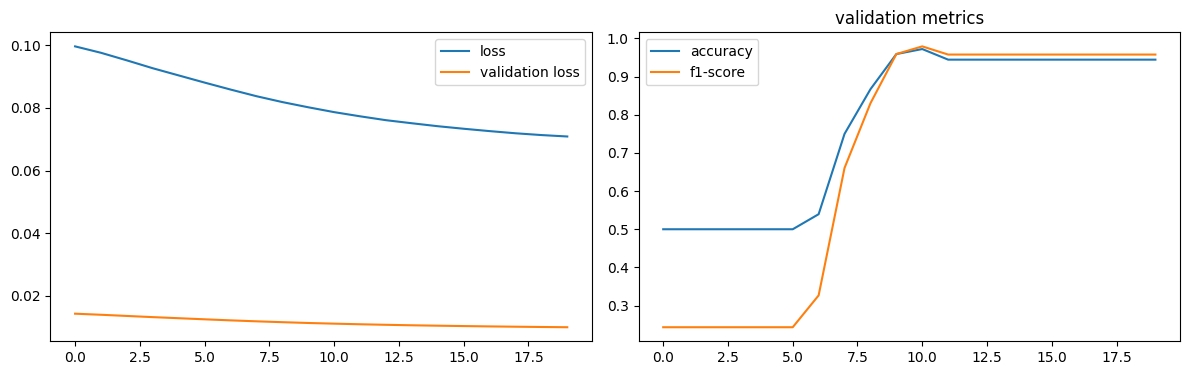

Test: loss: 0.5669869780540466, metrics: (0.9577465057373047, 0.9635180830955505)


In [20]:
headers = [f"neuron{i}" for i in range(32)]


def model_factory(size):
    model = BreastCancerNN(1, (1, size), 2)
    model.layer1 = nn.Identity()
    model.layer2 = nn.Identity()
    return model


def optimizer_factory(model):
    return optim.Adam(model.parameters(), lr=0.001)


test_metrics, dropped, models = prune(
    datasets, headers, analyze_dgsm,
    model_factory, optimizer_factory, criterion, score_outputs,
    labels, "", None
)

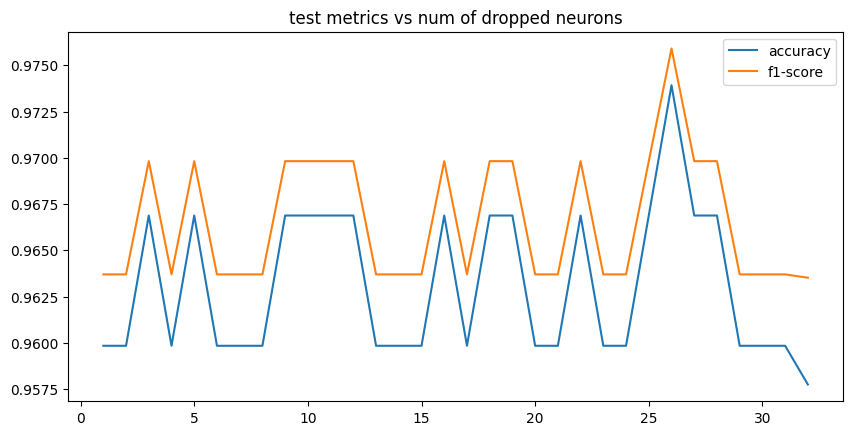

In [21]:
plt.plot(range(1, len(test_metrics)+1), test_metrics, label=labels)
plt.title("test metrics vs num of dropped neurons")
plt.gcf().set_figwidth(10)
plt.legend()
plt.show()

In [22]:
num_drop_neurons = 26

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_neurons)
layer = models[num_drop_neurons].out

best_model.out = layer
best_model.layer2[0] = reduce_linear(best_model.layer2[0], dropped, num_drop_neurons)

features left [6]:  ['neuron0', 'neuron8', 'neuron12', 'neuron13', 'neuron14', 'neuron17']


### pruned

In [23]:
best_model

BreastCancerNN(
  (layer1): Sequential(
    (0): Linear(in_features=10, out_features=5, bias=True)
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=5, out_features=6, bias=True)
    (1): ReLU()
  )
  (out): Linear(in_features=6, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)

In [24]:
with torch.no_grad():
    inputs, targets = dgsm_datasets["test"][:]
    outputs = best_model(inputs)

    test_metrics = score_outputs(outputs, targets)

print(f"test {labels}: {test_metrics}")

test ('accuracy', 'f1-score'): (0.9668805003166199, 0.9698193073272705)


## FAST

In [25]:
torch.manual_seed(2024)
best_model = BreastCancerNN(len(breast_cancer_headers), (32, 32), 2)

### input layer

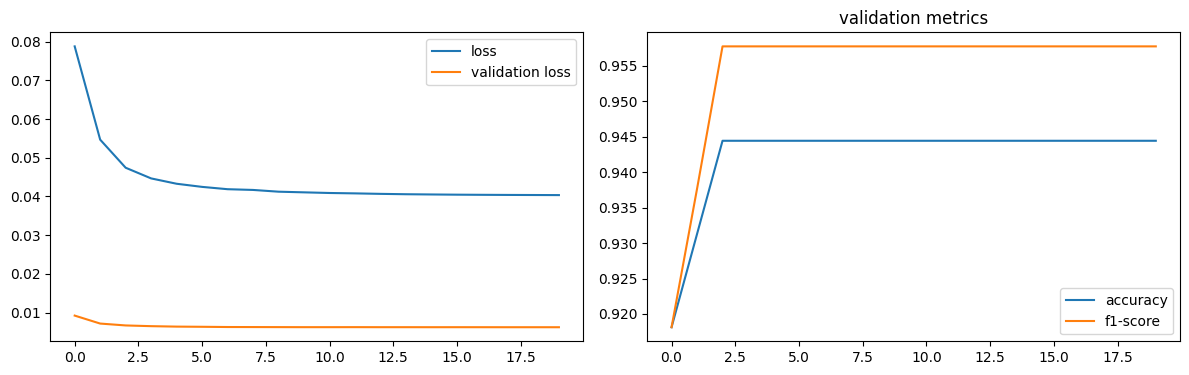

Test: loss: 0.34530532360076904, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (17, 'concave_points2')


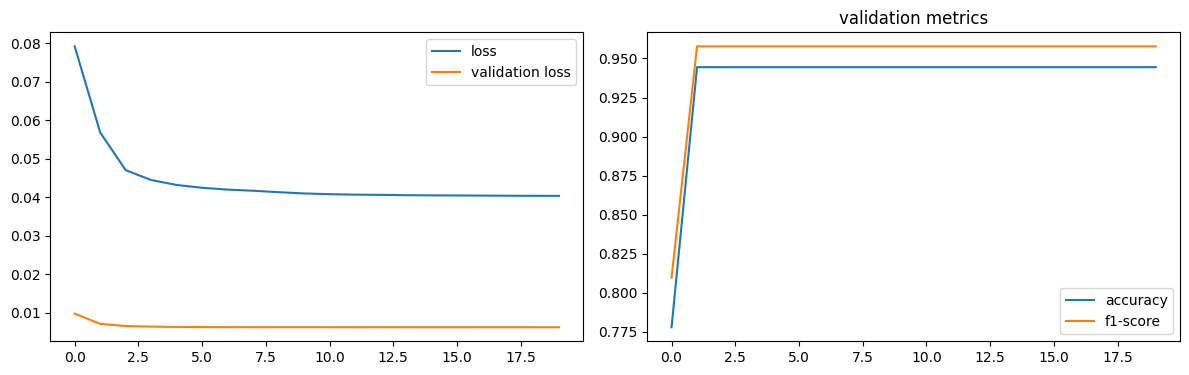

Test: loss: 0.34520015120506287, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (11, 'texture2')


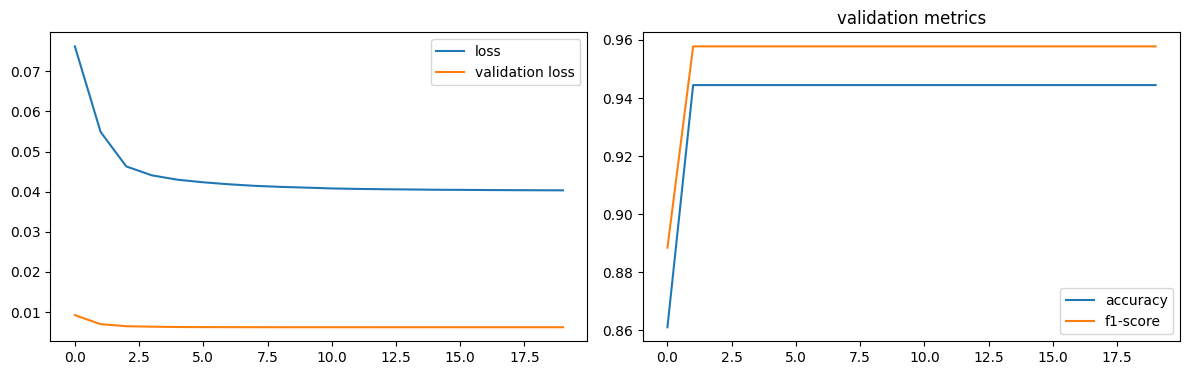

Test: loss: 0.34079375863075256, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (23, 'compactness3')


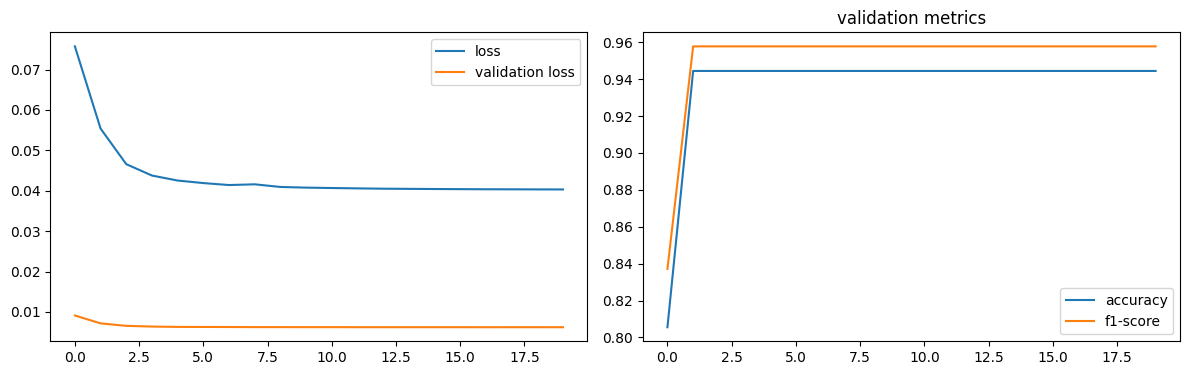

Test: loss: 0.3401220440864563, metrics: (0.9647887349128723, 0.9696745276451111)
dropping feature: (9, 'fractal_dimension1')


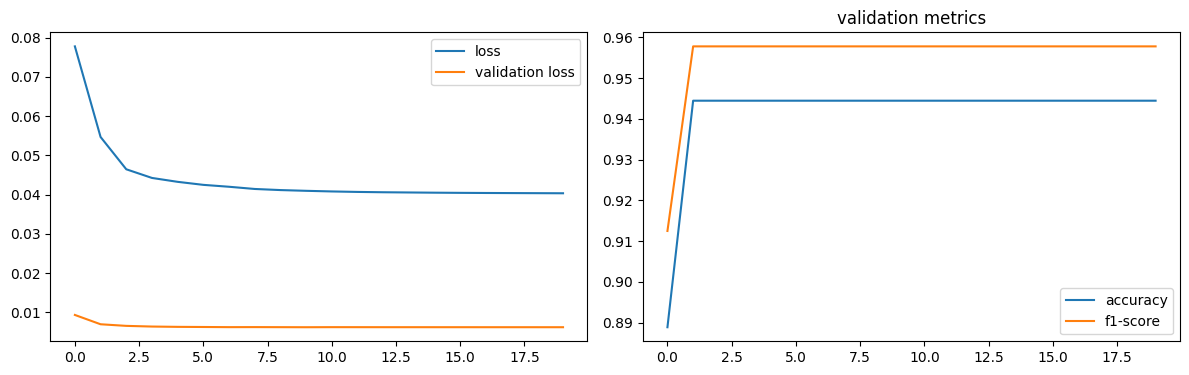

Test: loss: 0.33878830075263977, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (8, 'symmetry1')


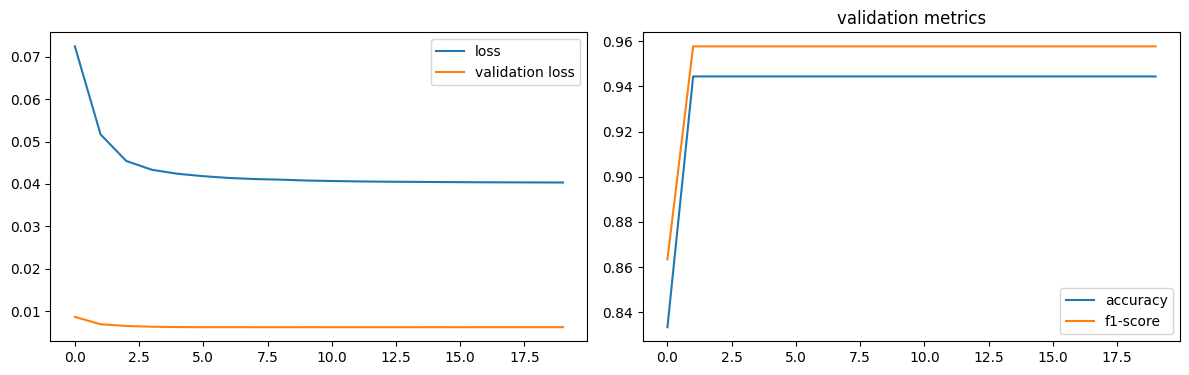

Test: loss: 0.3409439027309418, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (13, 'concavity2')


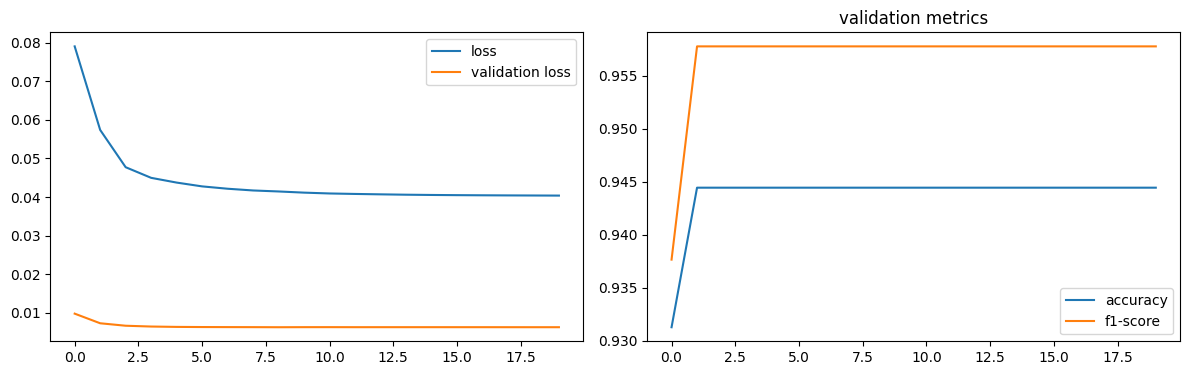

Test: loss: 0.34163662791252136, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (11, 'smoothness2')


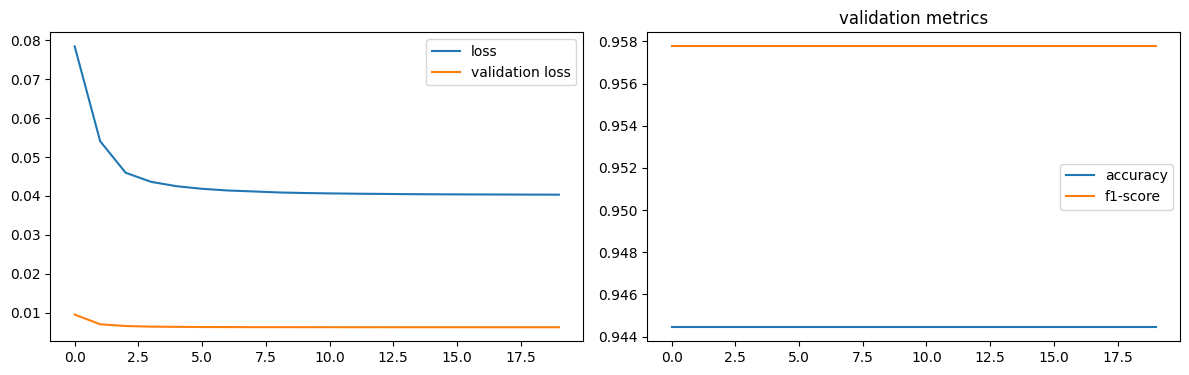

Test: loss: 0.3430233895778656, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (22, 'fractal_dimension3')


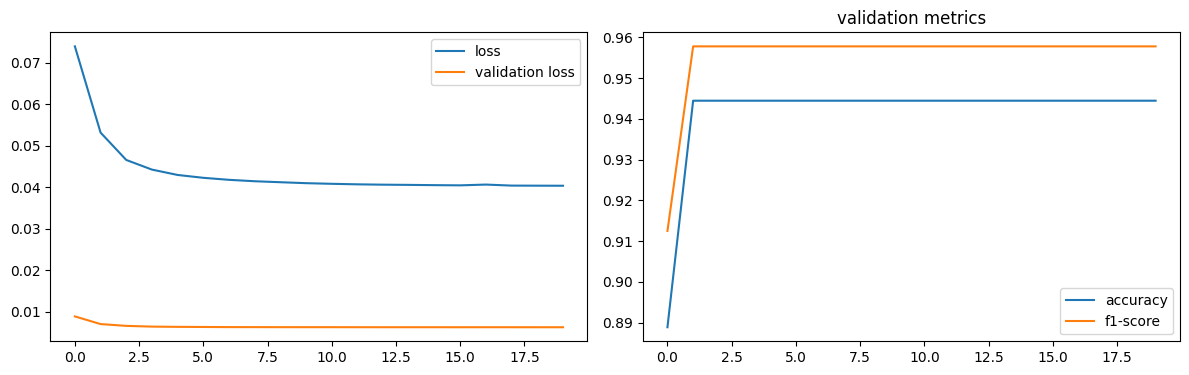

Test: loss: 0.34546783566474915, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (0, 'radius1')


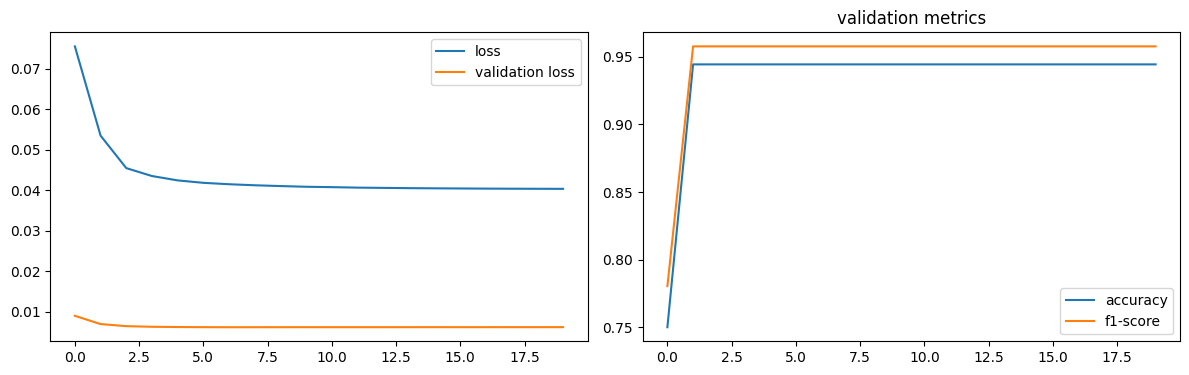

Test: loss: 0.34406986832618713, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (4, 'compactness1')


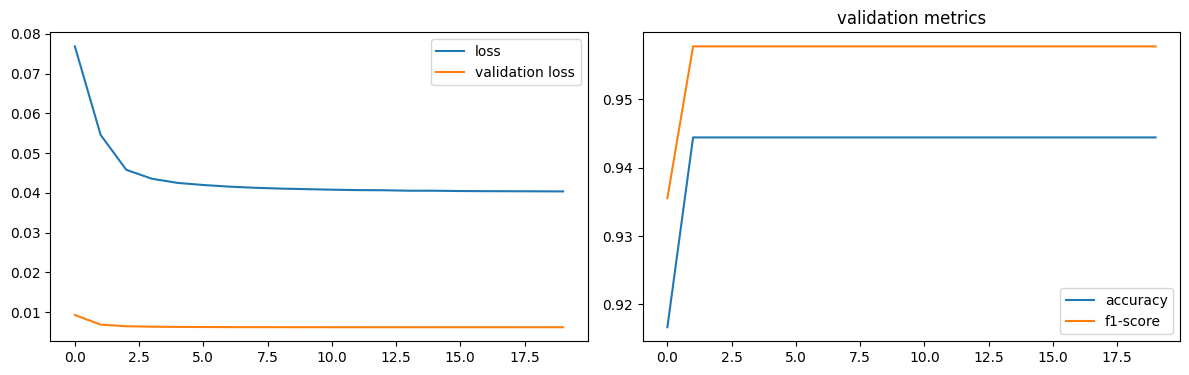

Test: loss: 0.3394870460033417, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (3, 'smoothness1')


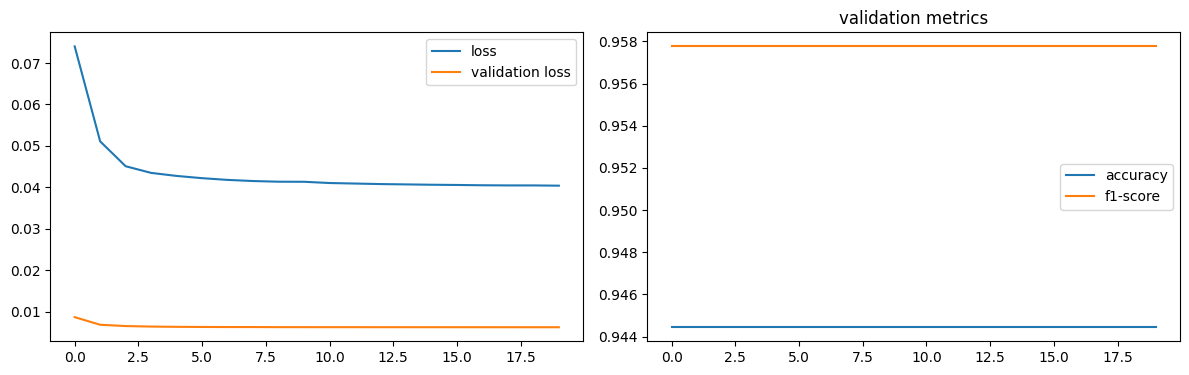

Test: loss: 0.3425639271736145, metrics: (0.9548877477645874, 0.9577469825744629)
dropping feature: (8, 'compactness2')


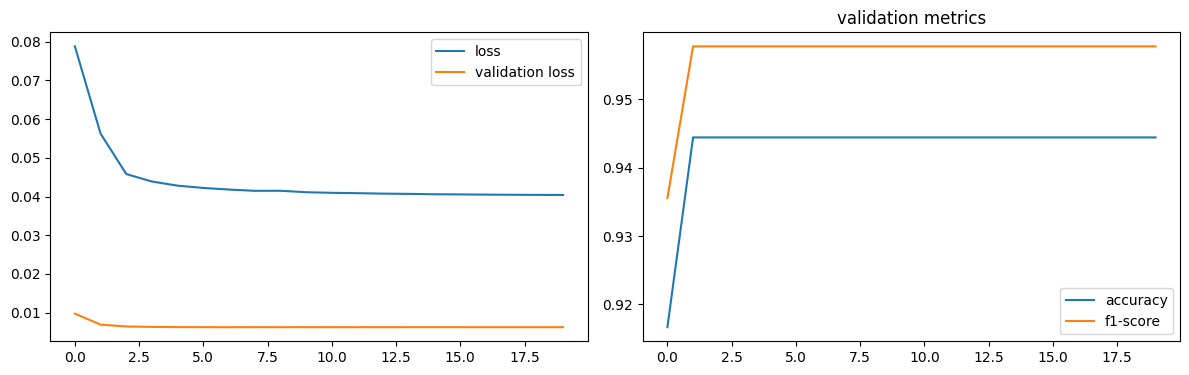

Test: loss: 0.34080684185028076, metrics: (0.9598382711410522, 0.9636977910995483)
dropping feature: (17, 'symmetry3')


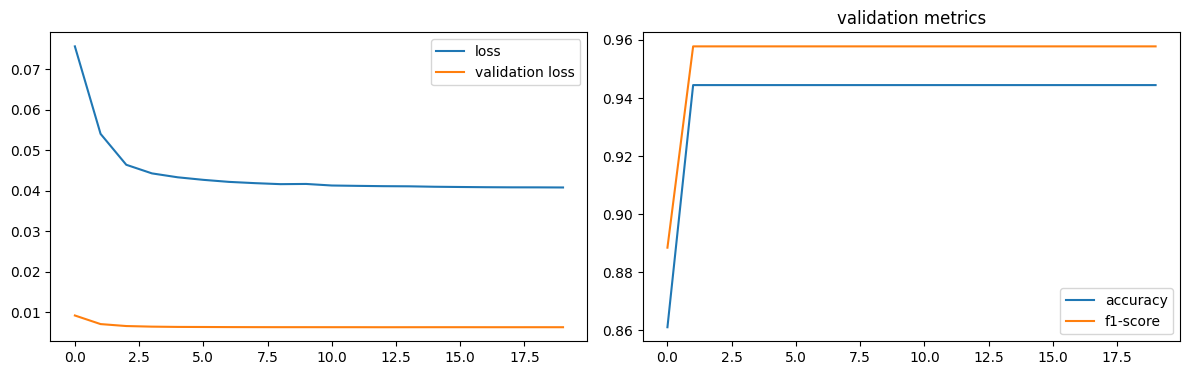

Test: loss: 0.348830908536911, metrics: (0.9548877477645874, 0.9577469825744629)
dropping feature: (6, 'perimeter2')


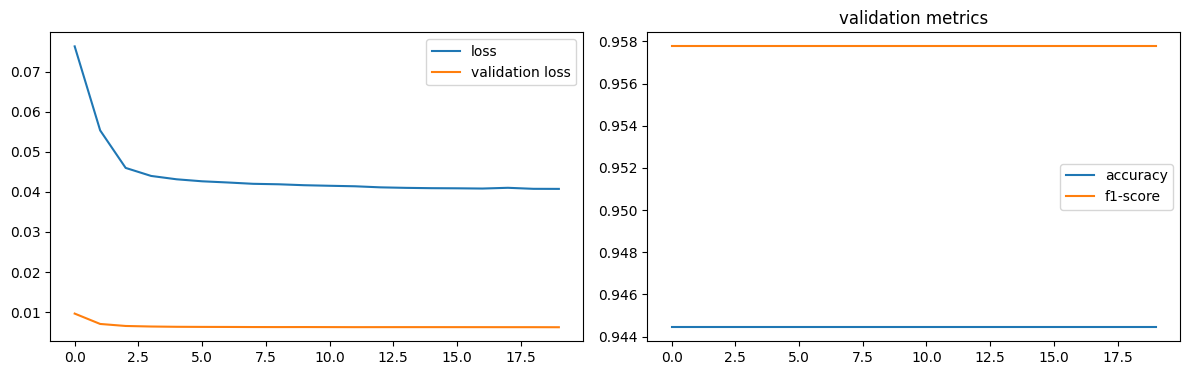

Test: loss: 0.3407045006752014, metrics: (0.9619300365447998, 0.9638655781745911)
dropping feature: (7, 'symmetry2')


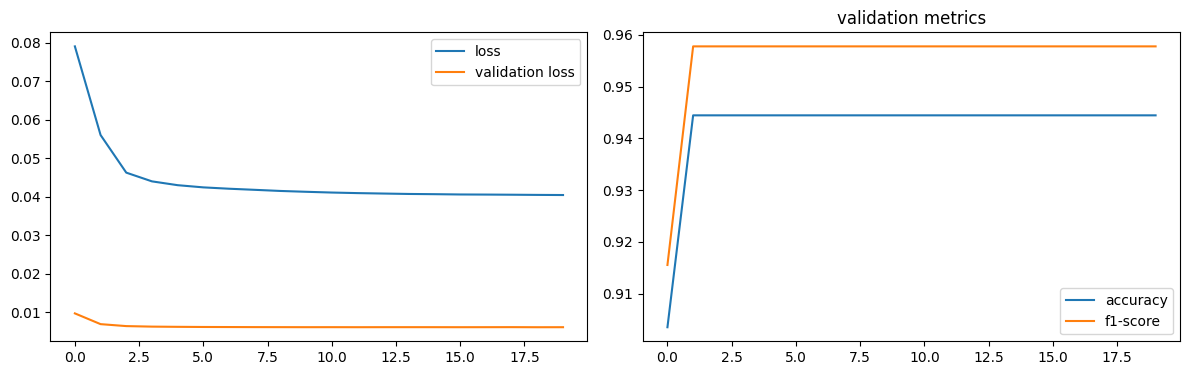

Test: loss: 0.33361944556236267, metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (3, 'concavity1')


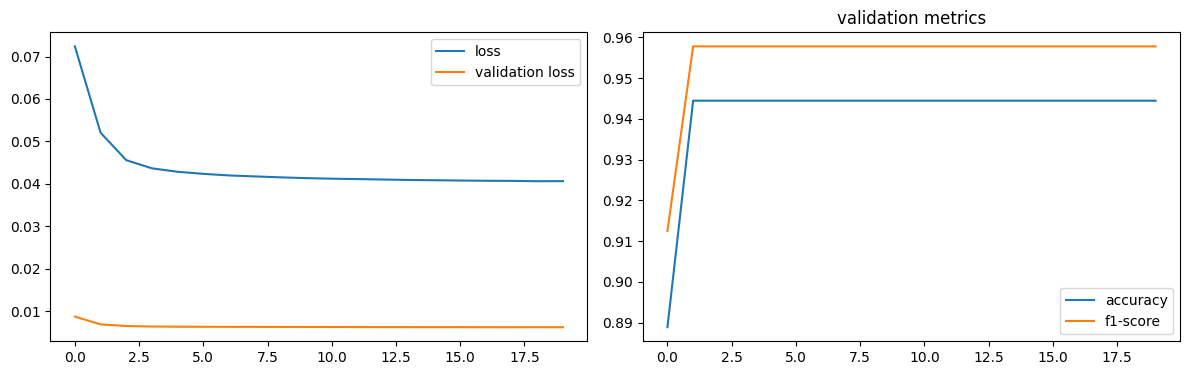

Test: loss: 0.3336261808872223, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (1, 'perimeter1')


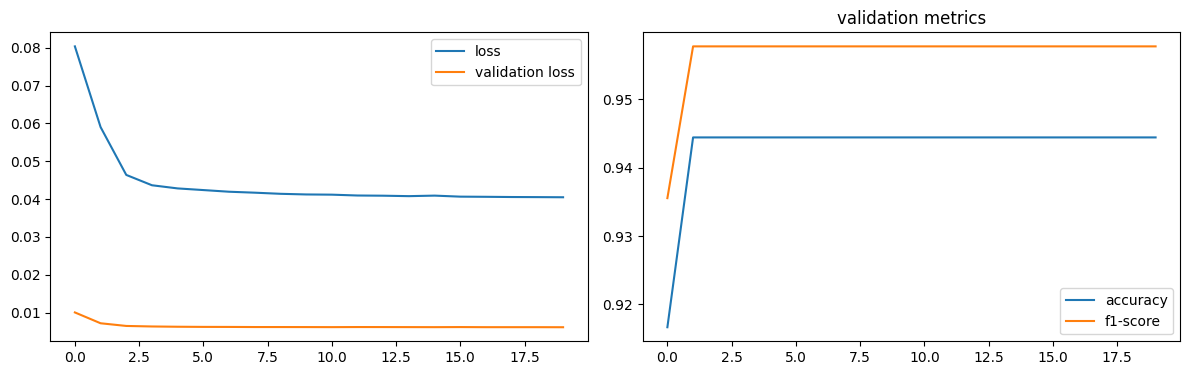

Test: loss: 0.33345305919647217, metrics: (0.9809650182723999, 0.9819725155830383)
dropping feature: (0, 'texture1')


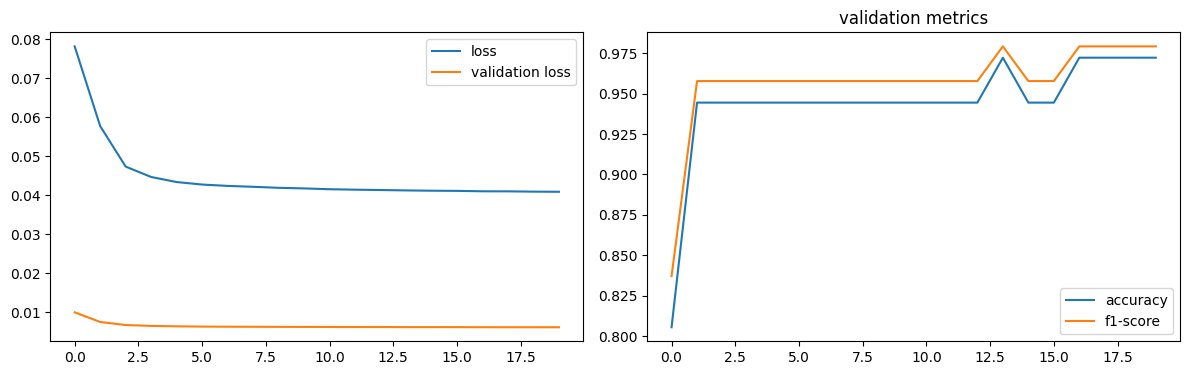

Test: loss: 0.3359117805957794, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (2, 'radius2')


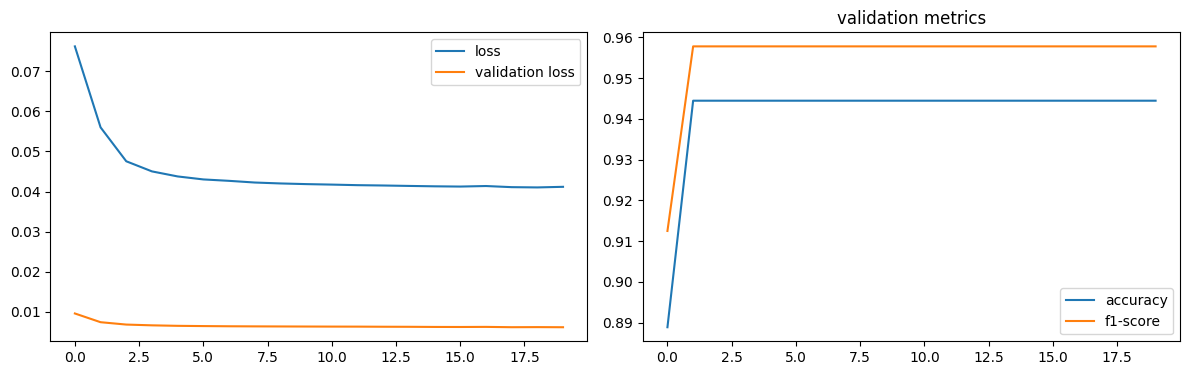

Test: loss: 0.3424421548843384, metrics: (0.9619300365447998, 0.9638655781745911)
dropping feature: (10, 'concave_points3')


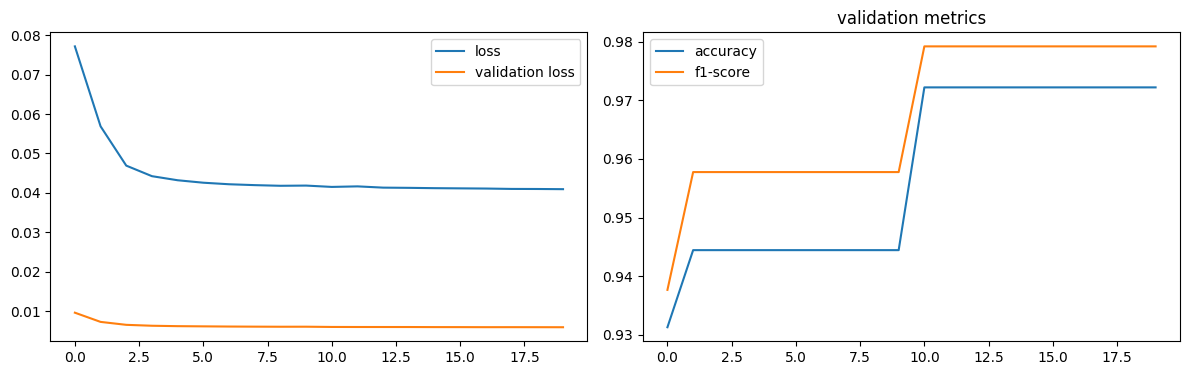

Test: loss: 0.3393048346042633, metrics: (0.9689722657203674, 0.969954252243042)
dropping feature: (2, 'area2')


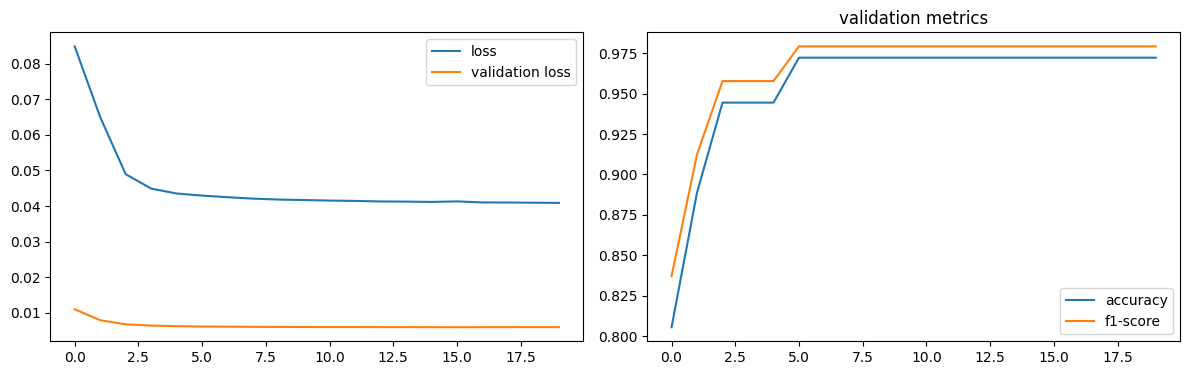

Test: loss: 0.34286409616470337, metrics: (0.9760144948959351, 0.9760144948959351)
dropping feature: (2, 'fractal_dimension2')


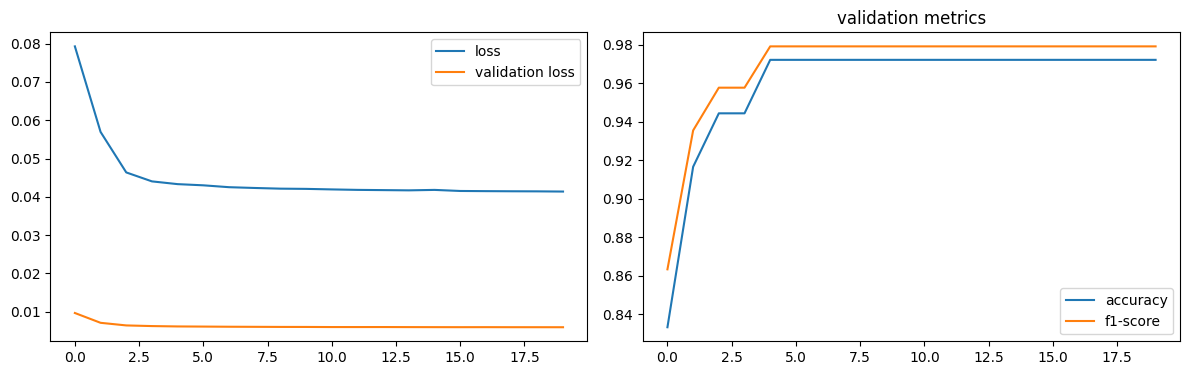

Test: loss: 0.34008073806762695, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (1, 'concave_points1')


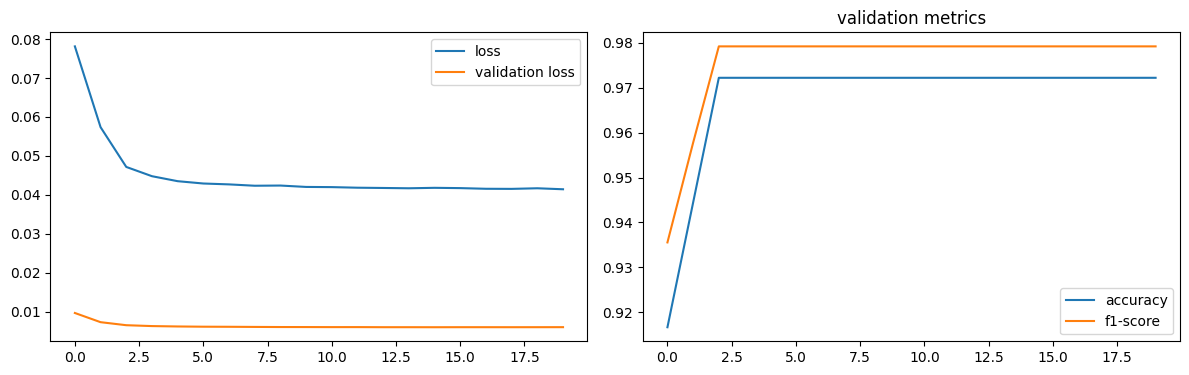

Test: loss: 0.3454493284225464, metrics: (0.9619300365447998, 0.9638655781745911)
dropping feature: (2, 'texture3')


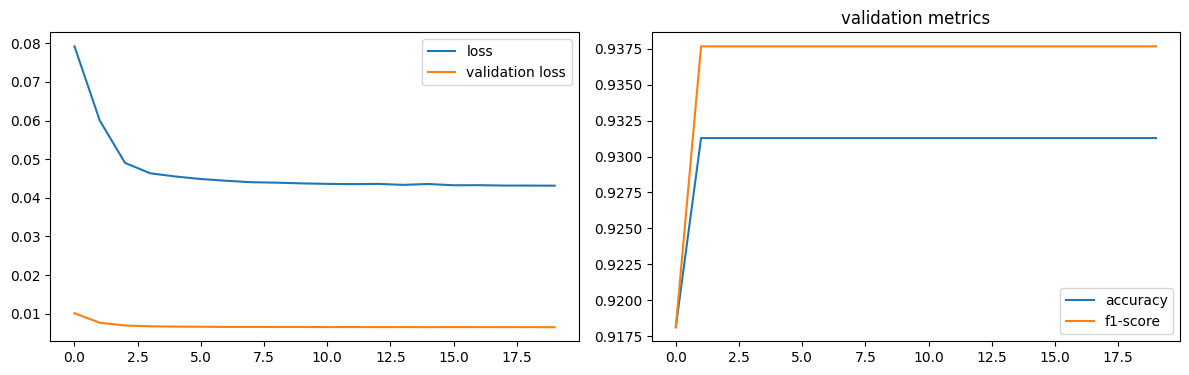

Test: loss: 0.3570614159107208, metrics: (0.9548877477645874, 0.9577469825744629)
dropping feature: (0, 'area1')


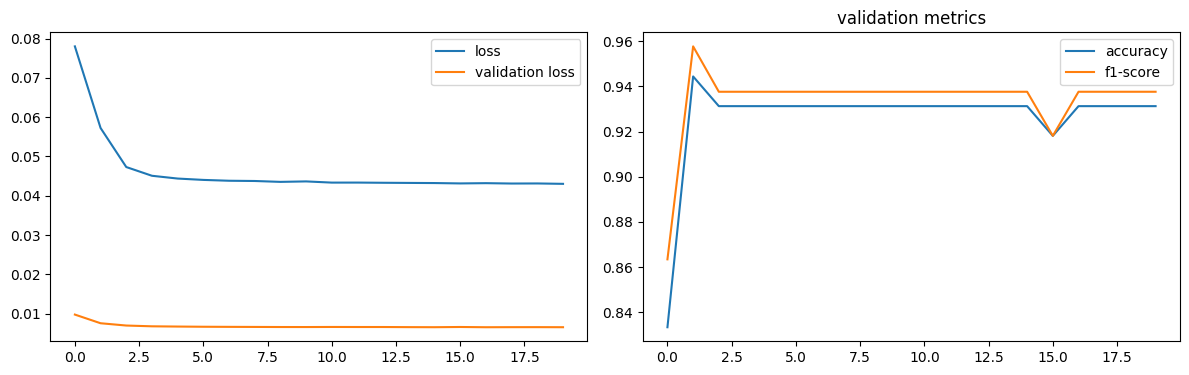

Test: loss: 0.35652780532836914, metrics: (0.9548877477645874, 0.9577469825744629)
dropping feature: (2, 'area3')


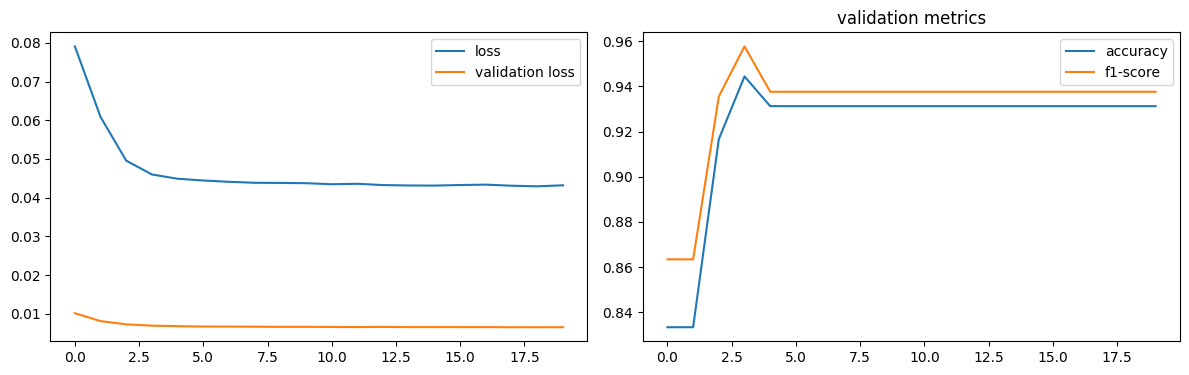

Test: loss: 0.35553252696990967, metrics: (0.9548877477645874, 0.9577469825744629)
dropping feature: (2, 'smoothness3')


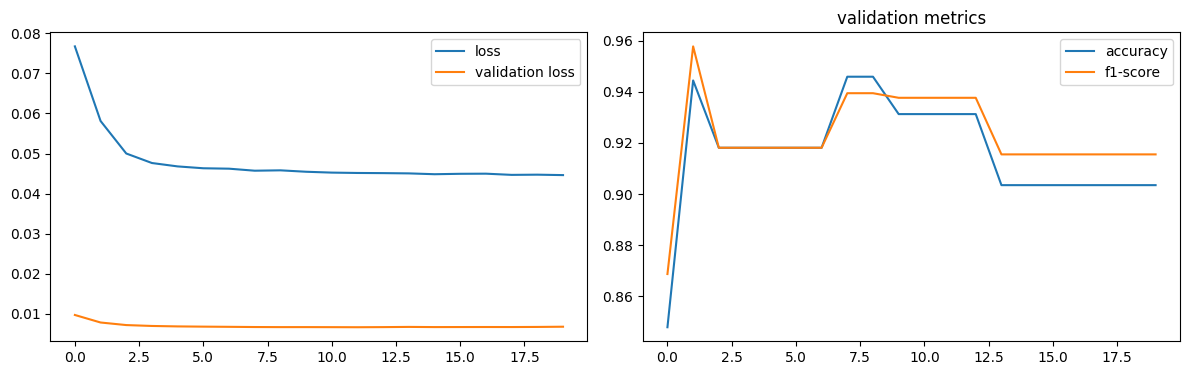

Test: loss: 0.38151222467422485, metrics: (0.91890949010849, 0.9215300679206848)
dropping feature: (1, 'perimeter3')


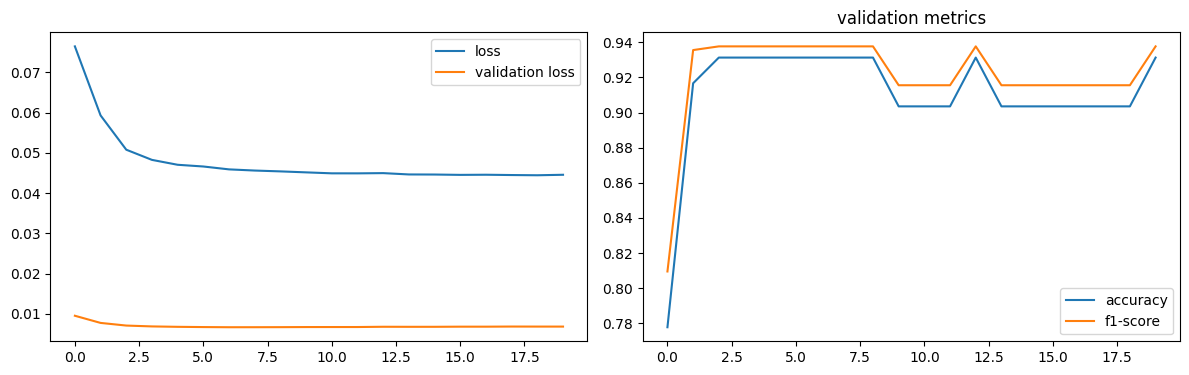

Test: loss: 0.3806595504283905, metrics: (0.9309022426605225, 0.9336024522781372)
dropping feature: (1, 'concavity3')


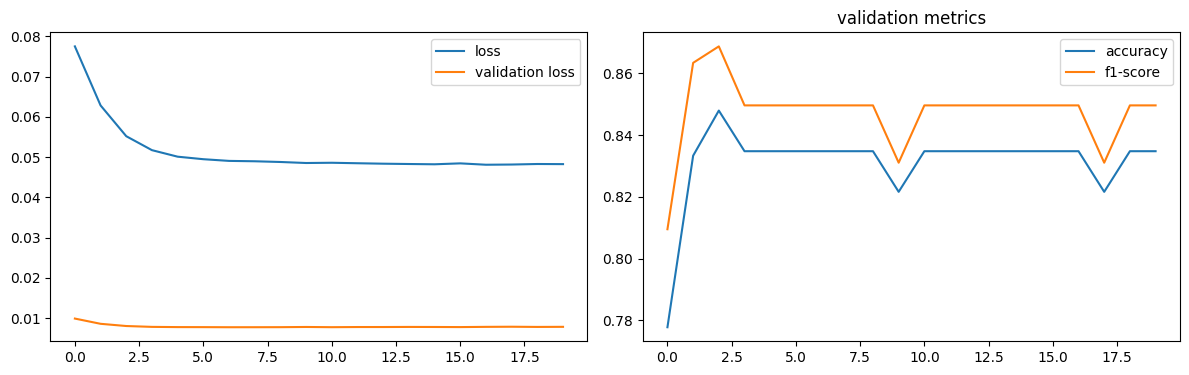

Test: loss: 0.4062245786190033, metrics: (0.9027332067489624, 0.9085593223571777)


In [26]:
datasets = breast_cancer_datasets.copy()
headers = breast_cancer_headers.copy()


def model_factory(size):
    return BreastCancerNN(size, (32, 32), 2)


test_metrics, dropped, models = prune(
    datasets, headers, analyze_fast,
    model_factory, optimizer_factory, criterion, score_outputs,
    labels, "", None
)

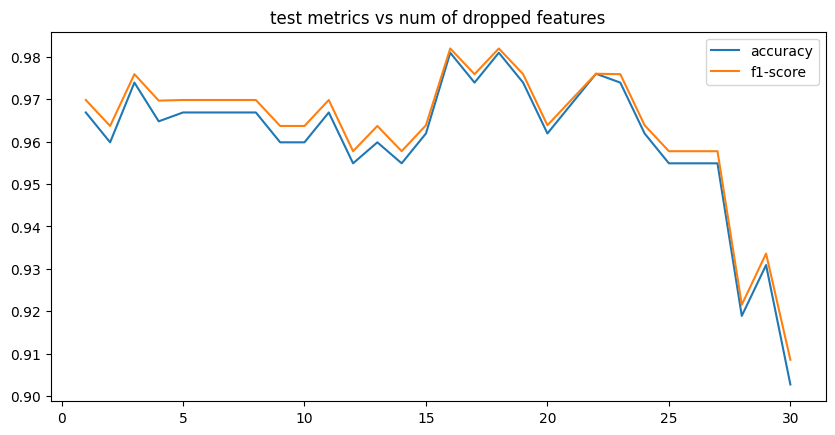

In [27]:
plt.plot(range(1, len(test_metrics)+1), test_metrics, label=labels)
plt.title("test metrics vs num of dropped features")
plt.gcf().set_figwidth(10)
plt.legend()
plt.show()

In [28]:
num_drop_features = 18

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_features)
layer = models[num_drop_features].layer1

best_model.layer1 = layer

features left [12]:  ['area1', 'concave_points1', 'radius2', 'area2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'concavity3', 'concave_points3']


In [29]:
fast_dataset = reduced_datasets

### 1st hidden layer

In [30]:
layer.eval()

datasets = {
    key: TensorDataset(
        layer(dataset.tensors[0]).detach(),
        dataset.tensors[1]
    )
    for key, dataset in reduced_datasets.items()
}

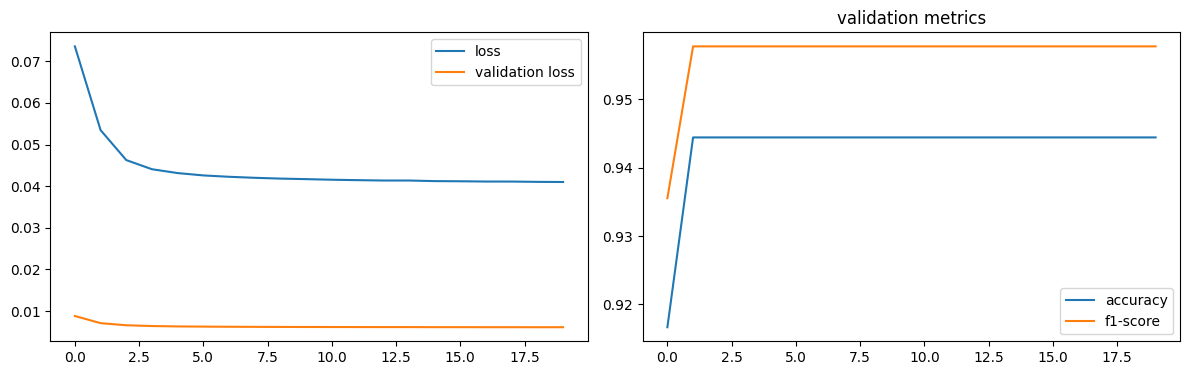

Test: loss: 0.3362293541431427, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (15, 'neuron15')


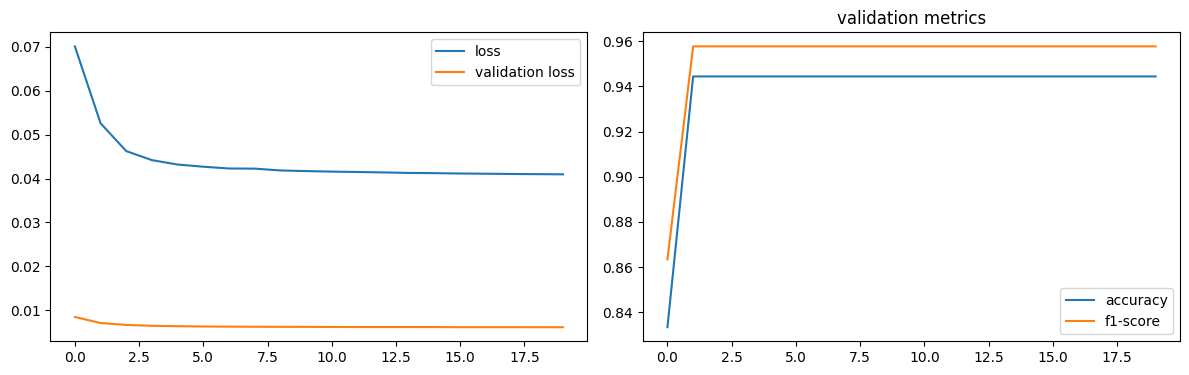

Test: loss: 0.3360036611557007, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (21, 'neuron22')


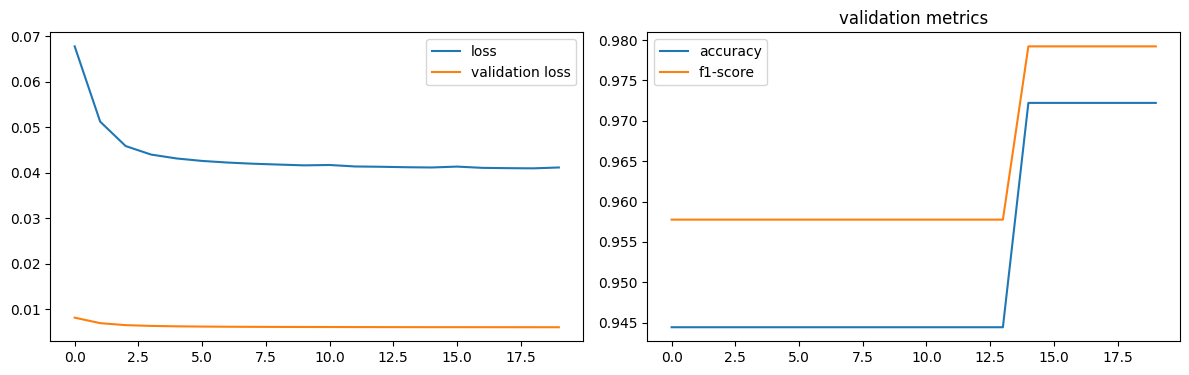

Test: loss: 0.3359737694263458, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (19, 'neuron20')


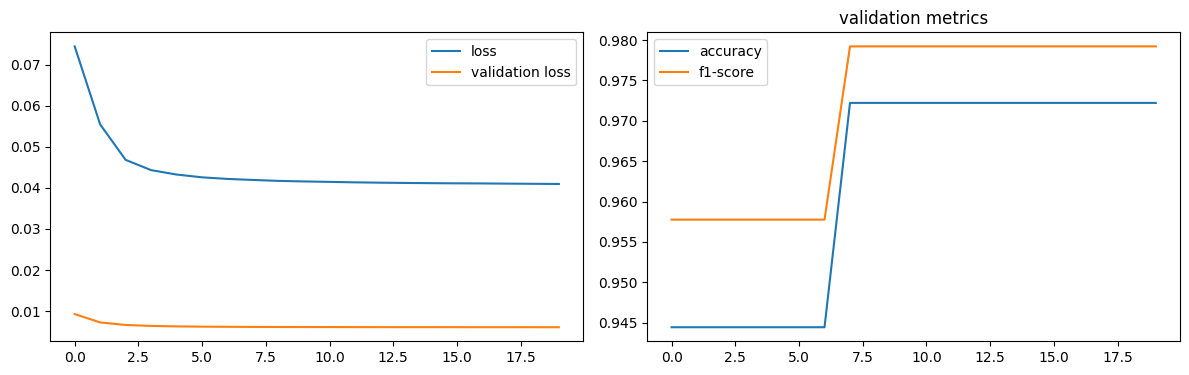

Test: loss: 0.33611398935317993, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (14, 'neuron14')


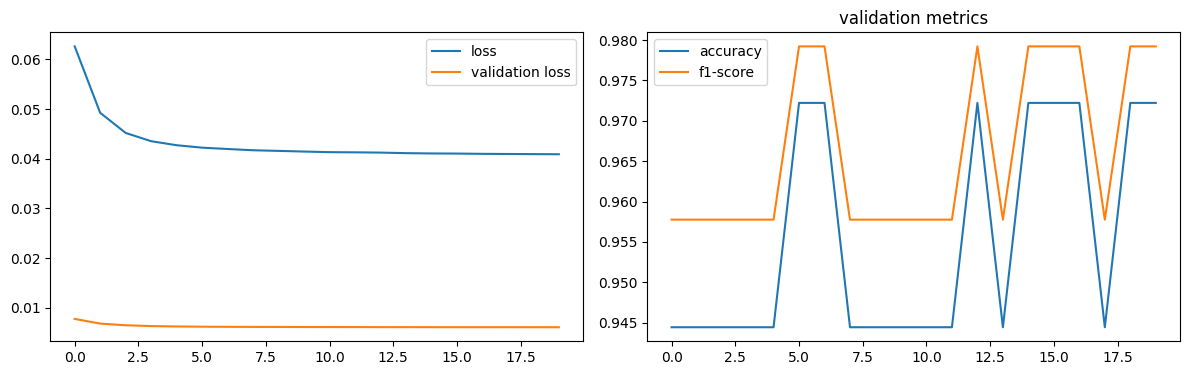

Test: loss: 0.33642271161079407, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (3, 'neuron3')


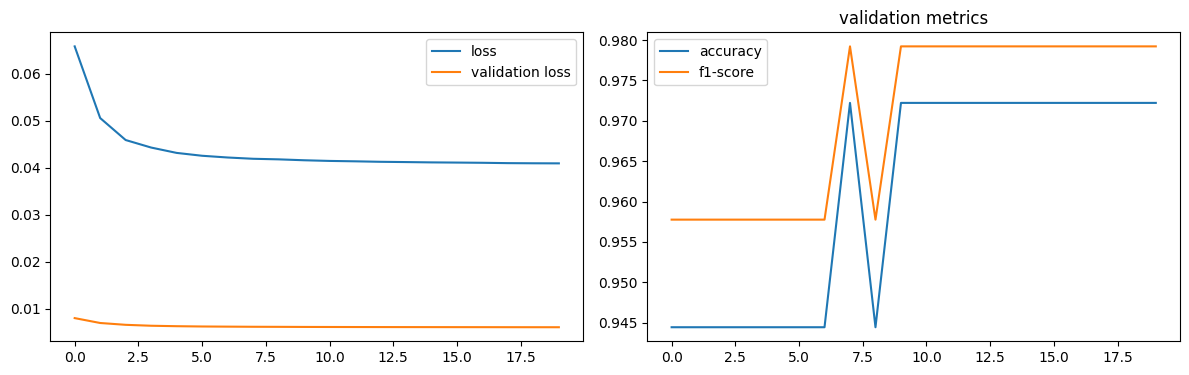

Test: loss: 0.33589038252830505, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (3, 'neuron4')


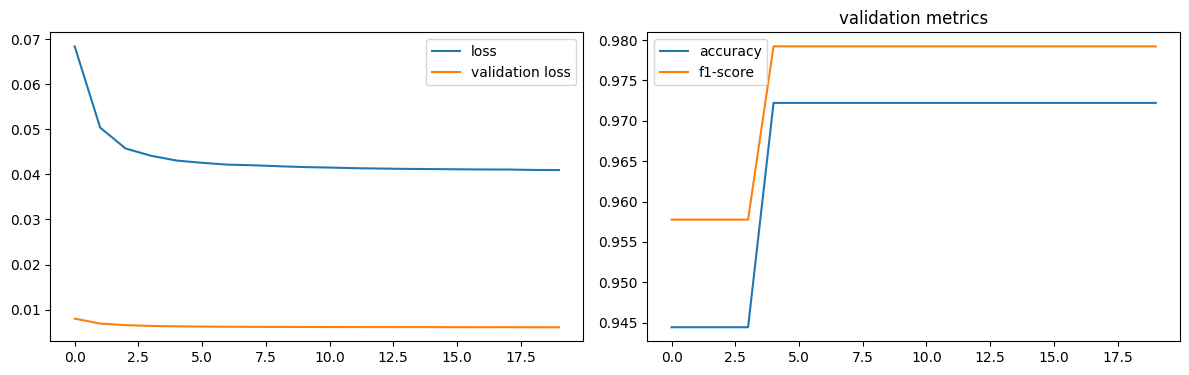

Test: loss: 0.3368075489997864, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (3, 'neuron5')


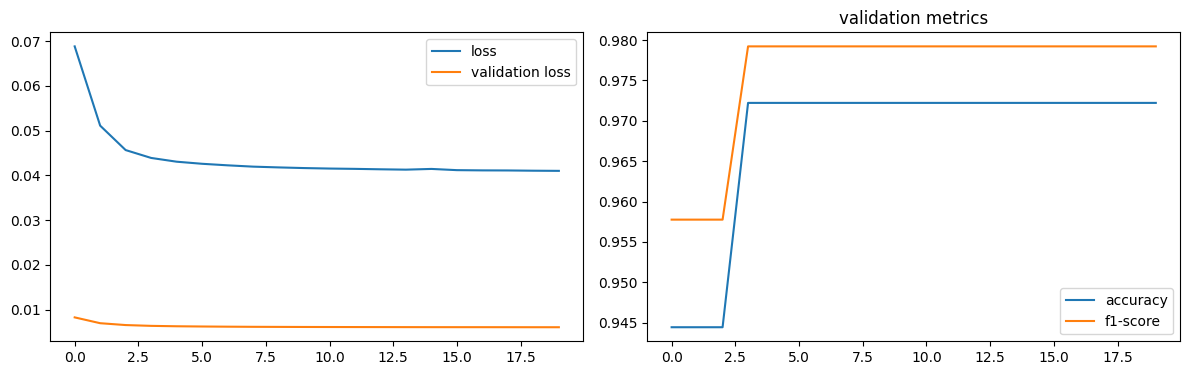

Test: loss: 0.33713072538375854, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (10, 'neuron13')


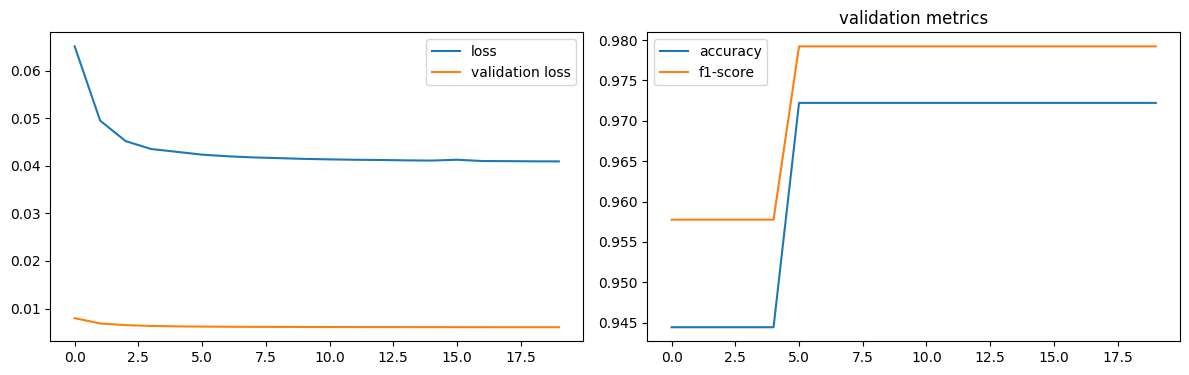

Test: loss: 0.3368968963623047, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (20, 'neuron28')


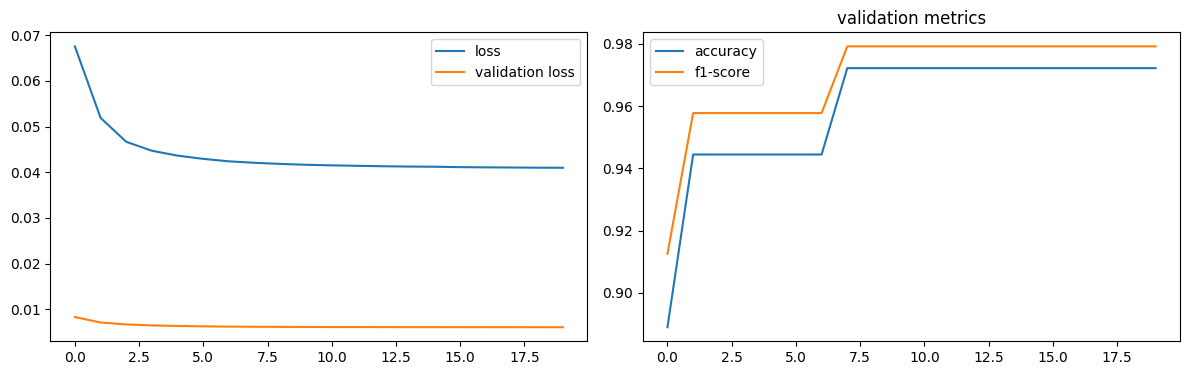

Test: loss: 0.33816981315612793, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (17, 'neuron25')


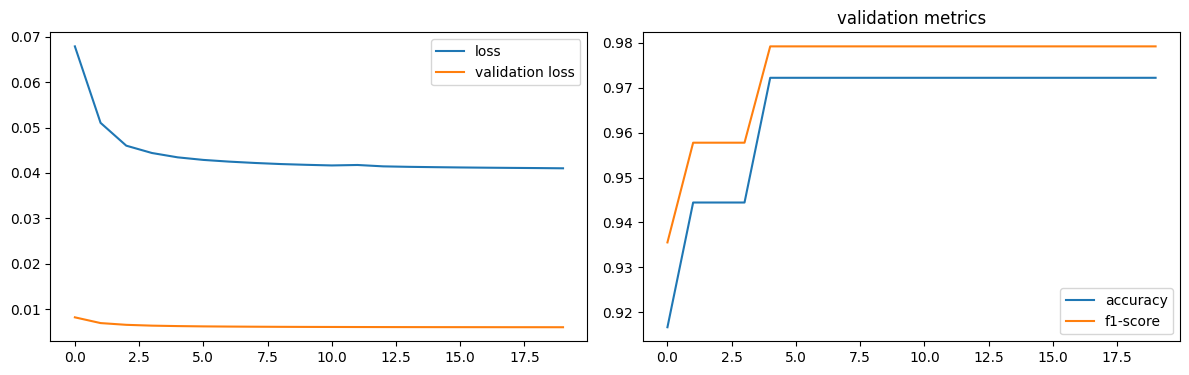

Test: loss: 0.33811721205711365, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (1, 'neuron1')


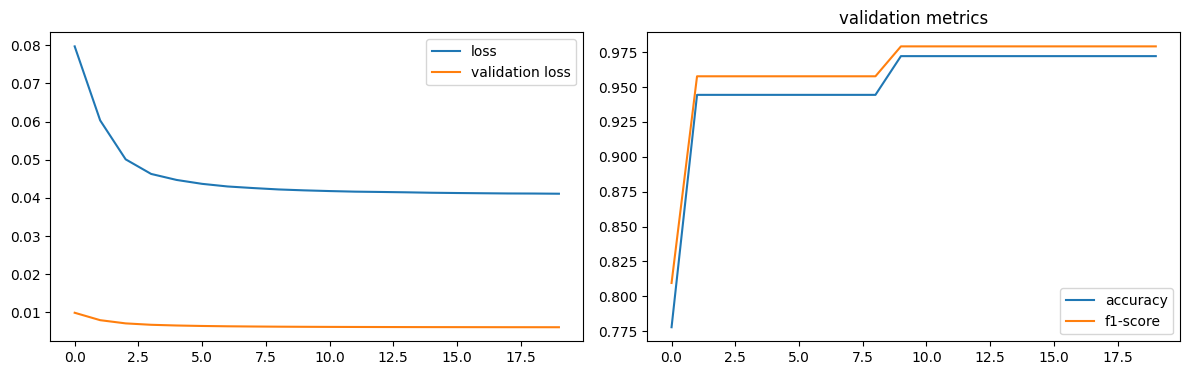

Test: loss: 0.33878418803215027, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (3, 'neuron7')


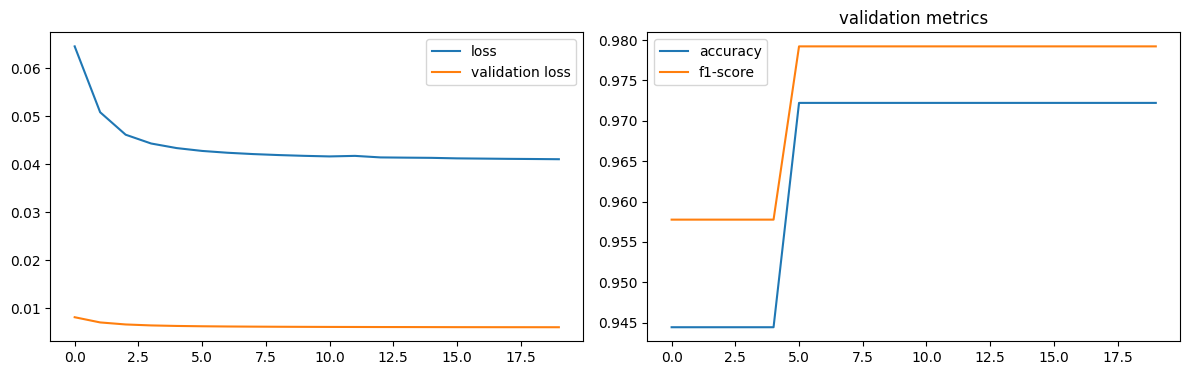

Test: loss: 0.3386407792568207, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (1, 'neuron2')


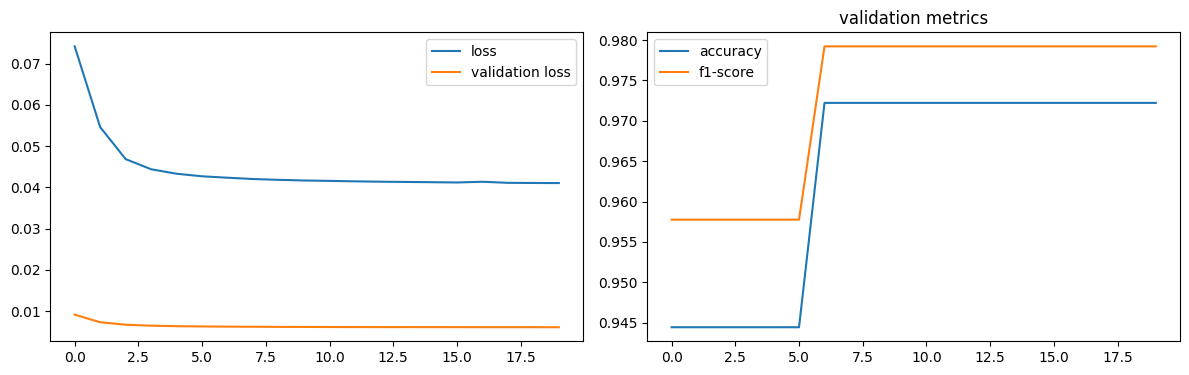

Test: loss: 0.33901506662368774, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (10, 'neuron19')


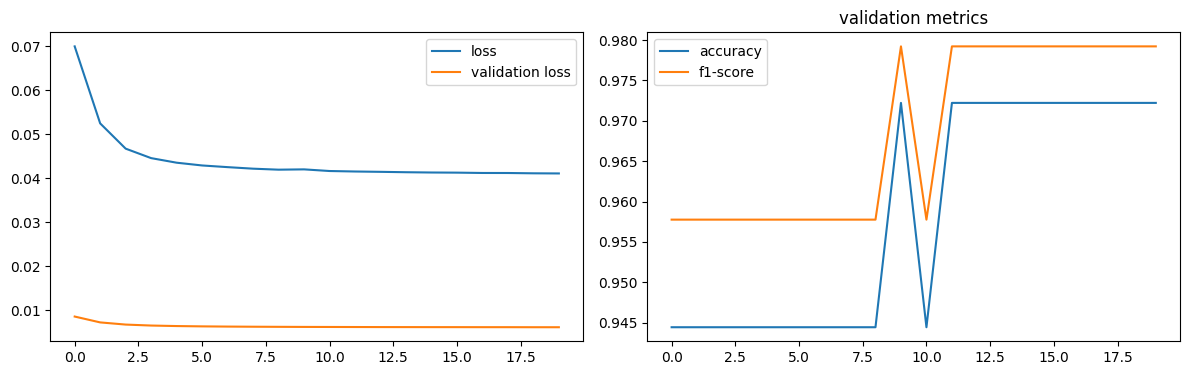

Test: loss: 0.3379162847995758, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (13, 'neuron26')


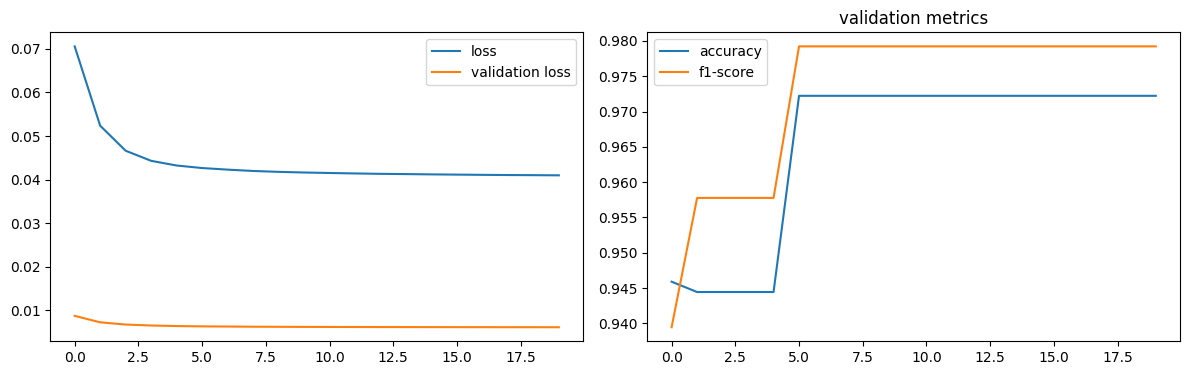

Test: loss: 0.33757030963897705, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (11, 'neuron23')


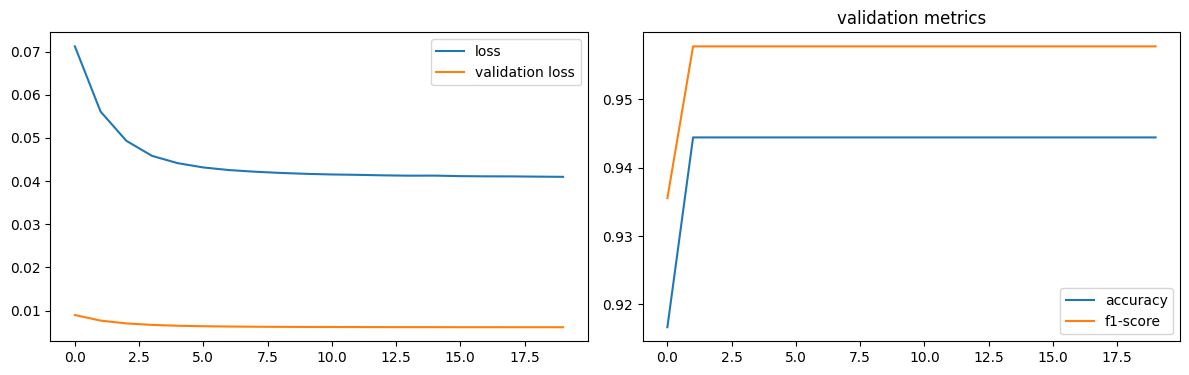

Test: loss: 0.33814379572868347, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (3, 'neuron9')


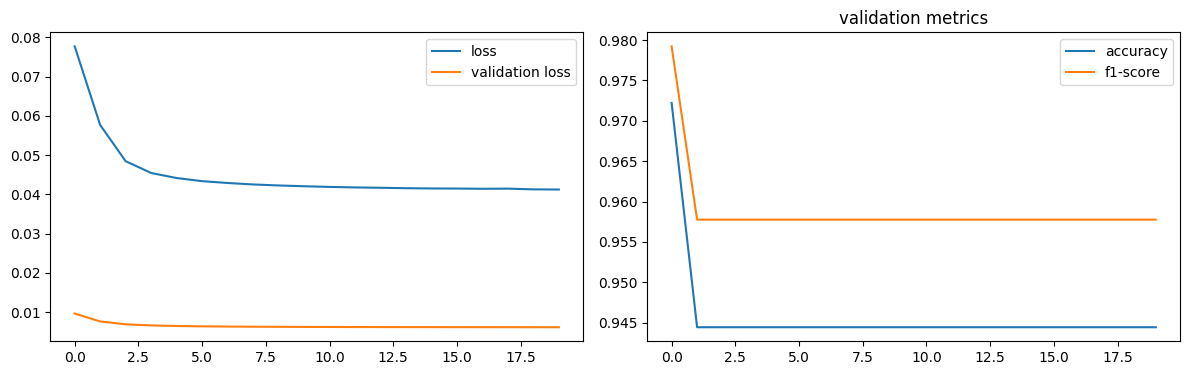

Test: loss: 0.3385632038116455, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (1, 'neuron6')


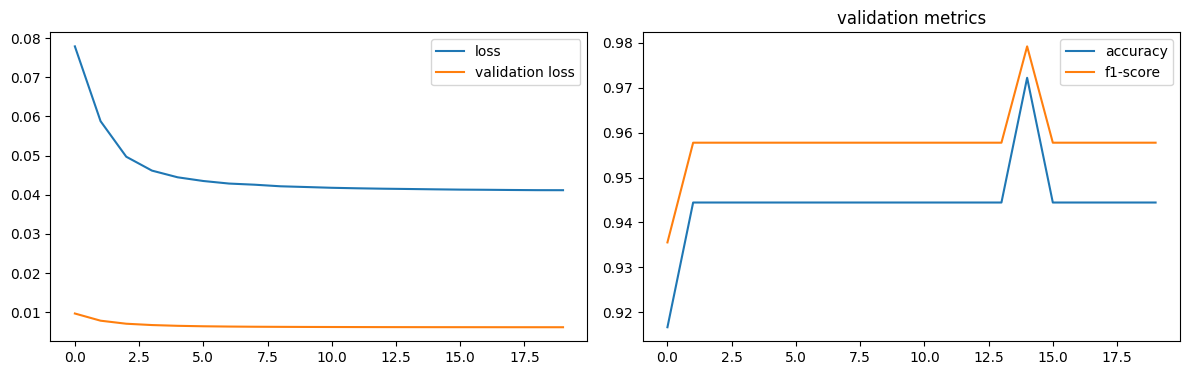

Test: loss: 0.33828210830688477, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (7, 'neuron18')


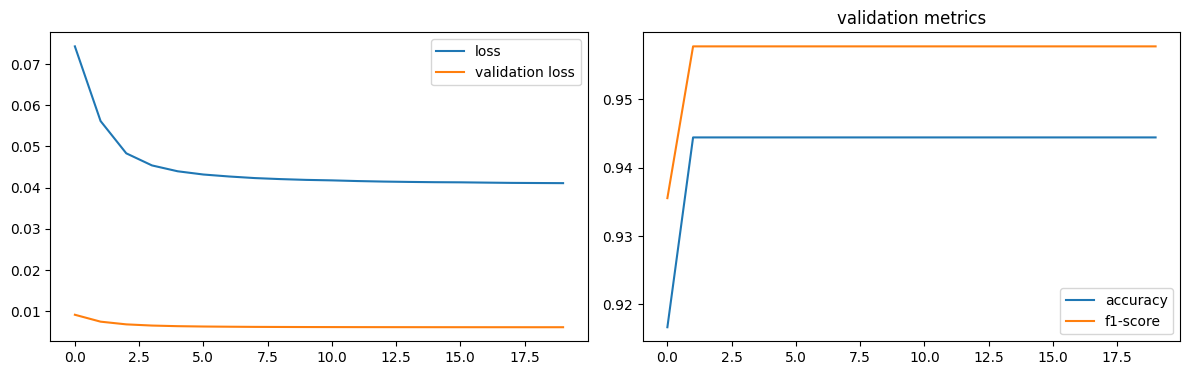

Test: loss: 0.33787453174591064, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (9, 'neuron27')


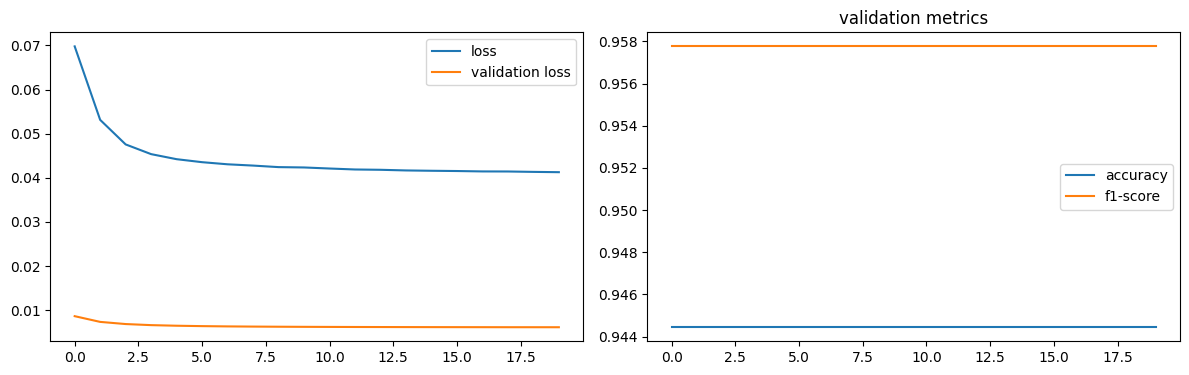

Test: loss: 0.3380541205406189, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (9, 'neuron29')


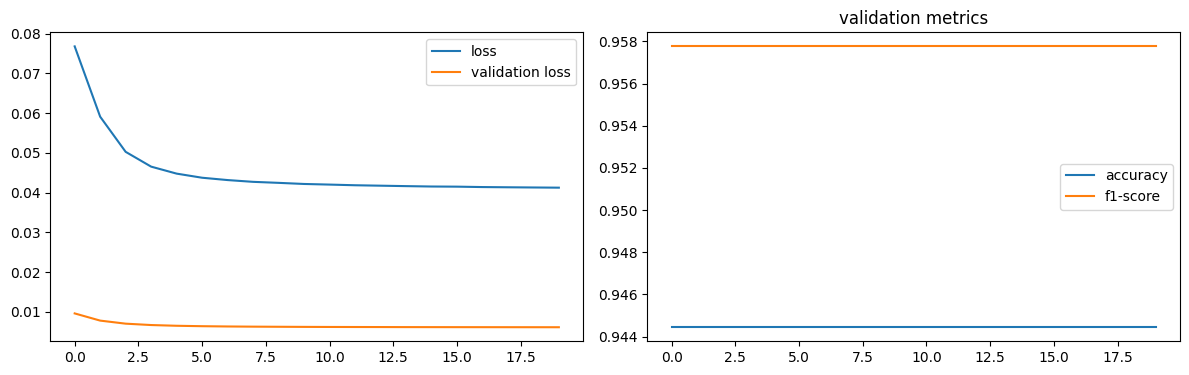

Test: loss: 0.33759060502052307, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (3, 'neuron11')


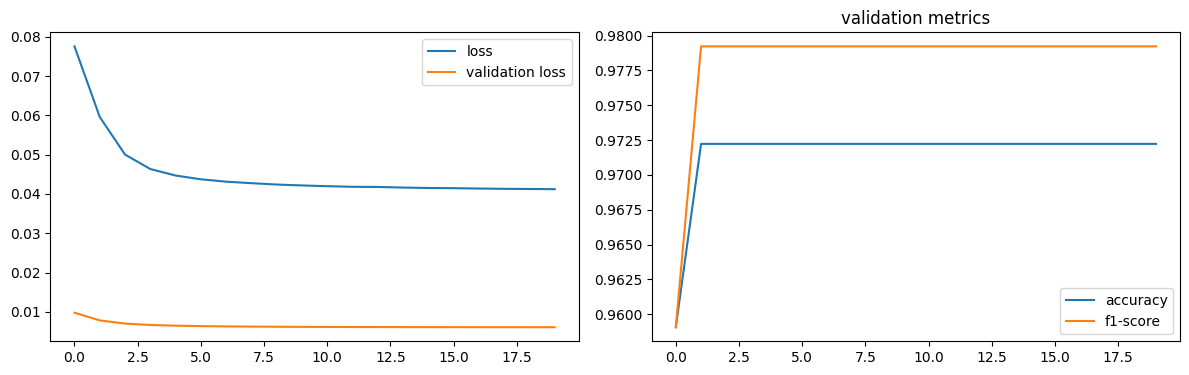

Test: loss: 0.33743447065353394, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (6, 'neuron21')


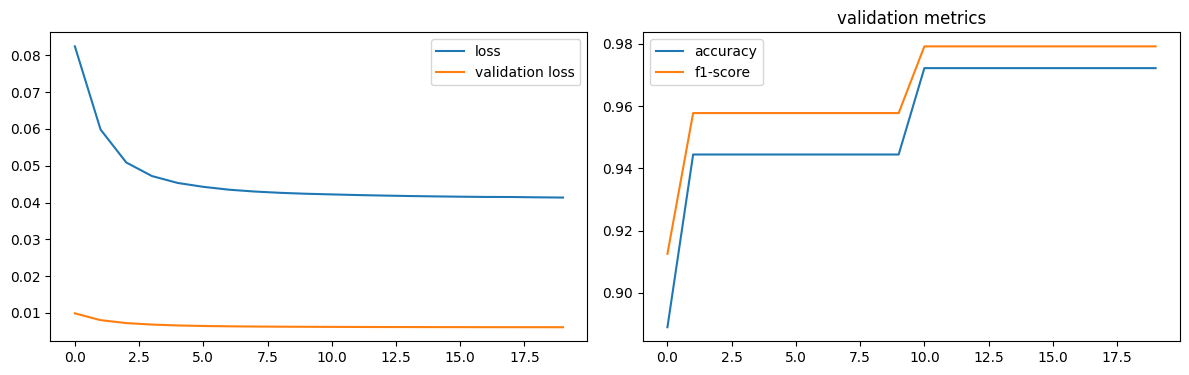

Test: loss: 0.3374750316143036, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (4, 'neuron16')


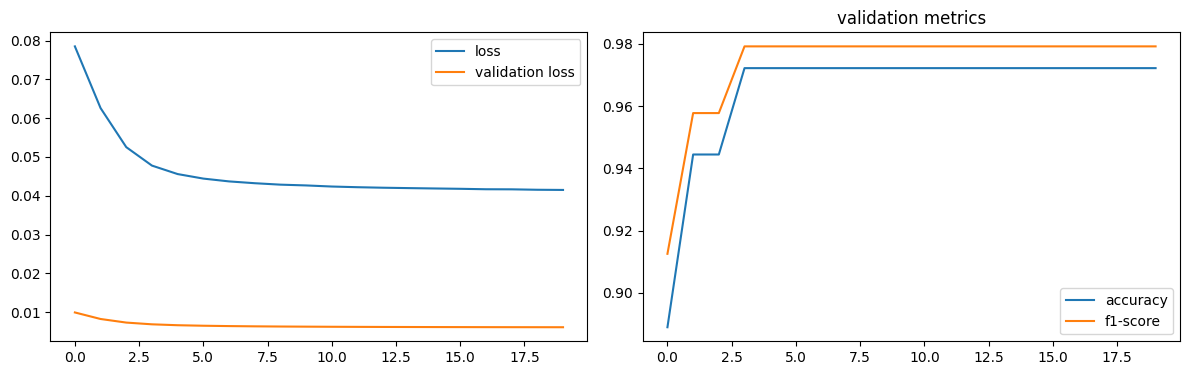

Test: loss: 0.33864709734916687, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (1, 'neuron8')


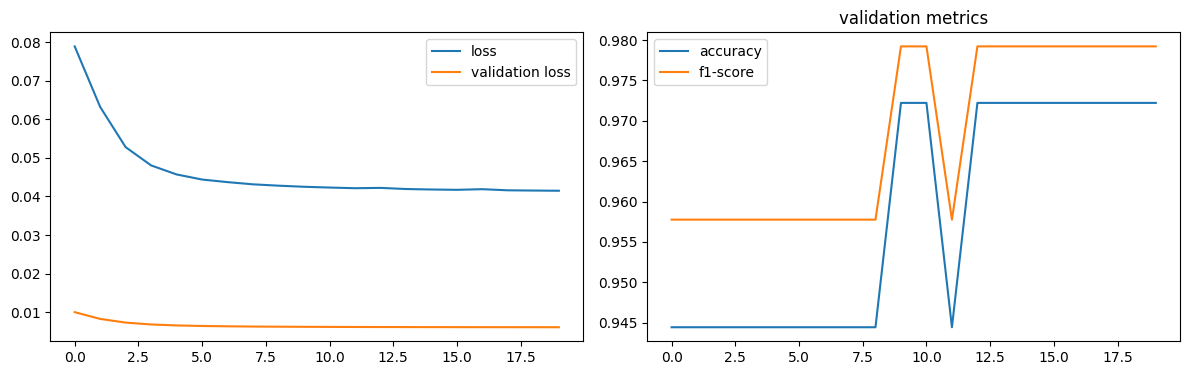

Test: loss: 0.3382890522480011, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (3, 'neuron17')


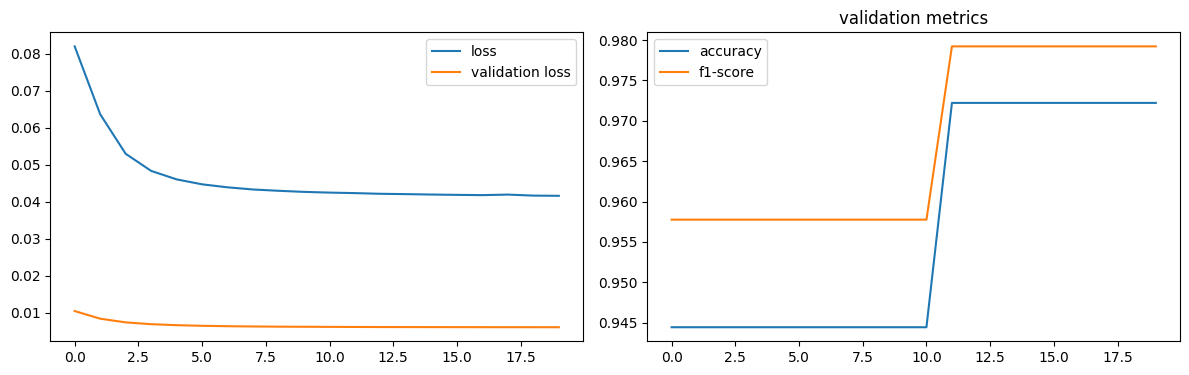

Test: loss: 0.3388528525829315, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (1, 'neuron10')


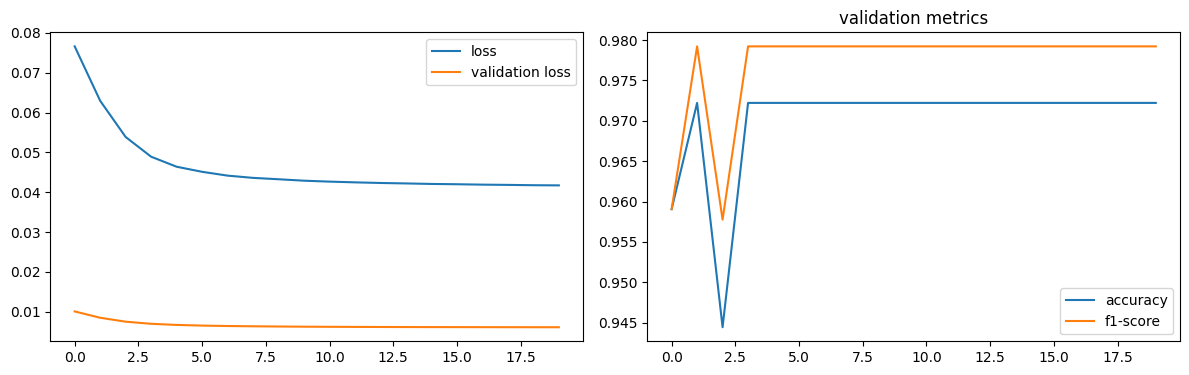

Test: loss: 0.3388555645942688, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (2, 'neuron24')


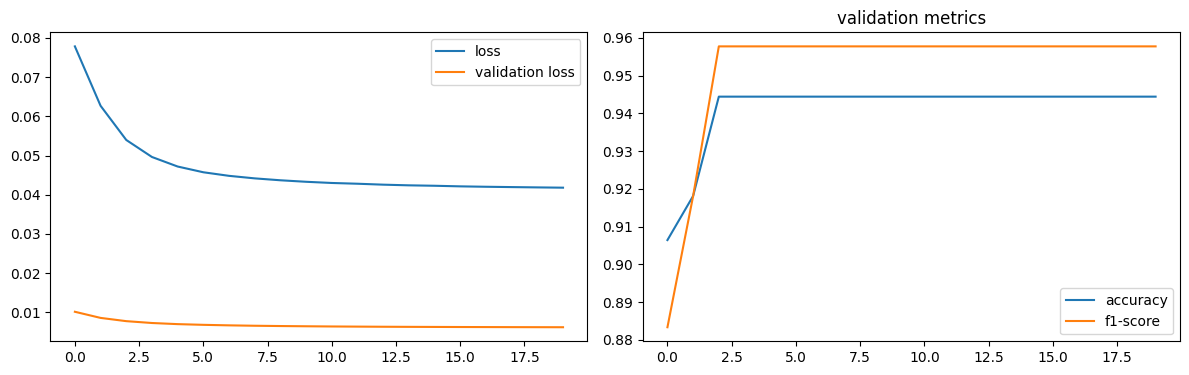

Test: loss: 0.33865538239479065, metrics: (0.9739227294921875, 0.9759103655815125)
dropping feature: (2, 'neuron30')


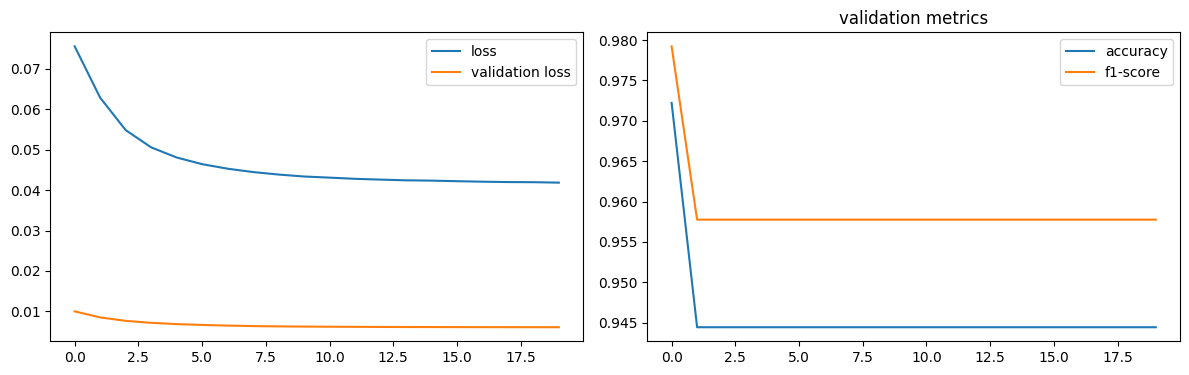

Test: loss: 0.33876827359199524, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (1, 'neuron12')


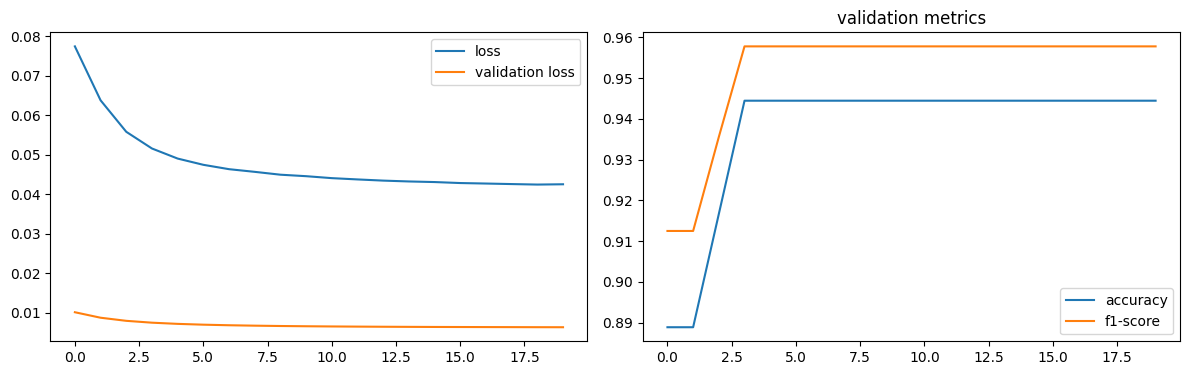

Test: loss: 0.34465885162353516, metrics: (0.9619300365447998, 0.9638655781745911)
dropping feature: (0, 'neuron0')


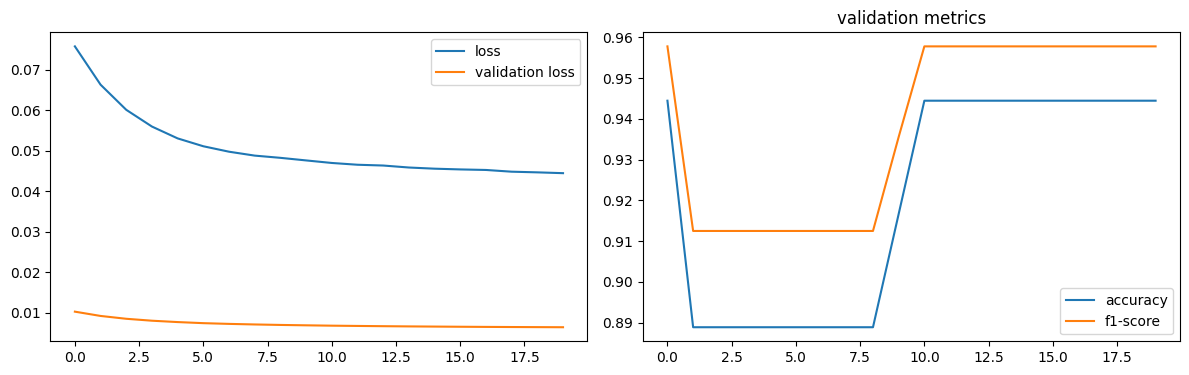

Test: loss: 0.35487186908721924, metrics: (0.9577465057373047, 0.9635180830955505)


In [31]:
headers = [f"neuron{i}" for i in range(32)]

def model_factory(size):
    model = BreastCancerNN(1, (size, 32), 2)
    model.layer1 = nn.Identity()
    return model


def optimizer_factory(model):
    return optim.Adam(model.parameters(), lr=0.001)


test_metrics, dropped, models = prune(
    datasets, headers, analyze_fast,
    model_factory, optimizer_factory, criterion, score_outputs,
    labels, "", None
)

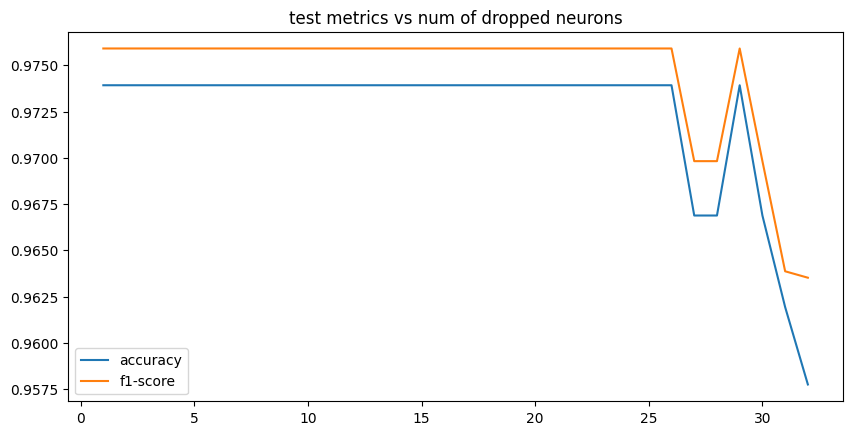

In [32]:
plt.plot(range(1, len(test_metrics)+1), test_metrics, label=labels)
plt.title("test metrics vs num of dropped neurons")
plt.gcf().set_figwidth(10)
plt.legend()
plt.show()

In [33]:
num_drop_neurons = 26

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_neurons)
layer = models[num_drop_neurons].layer2

best_model.layer2 = layer
best_model.layer1[0] = reduce_linear(best_model.layer1[0], dropped, num_drop_neurons)

features left [6]:  ['neuron0', 'neuron10', 'neuron12', 'neuron24', 'neuron30', 'neuron31']


### 2nd hidden layer

In [34]:
layer.eval()

datasets = {
    key: TensorDataset(
        layer(dataset.tensors[0]).detach(),
        dataset.tensors[1]
    )
    for key, dataset in reduced_datasets.items()
}

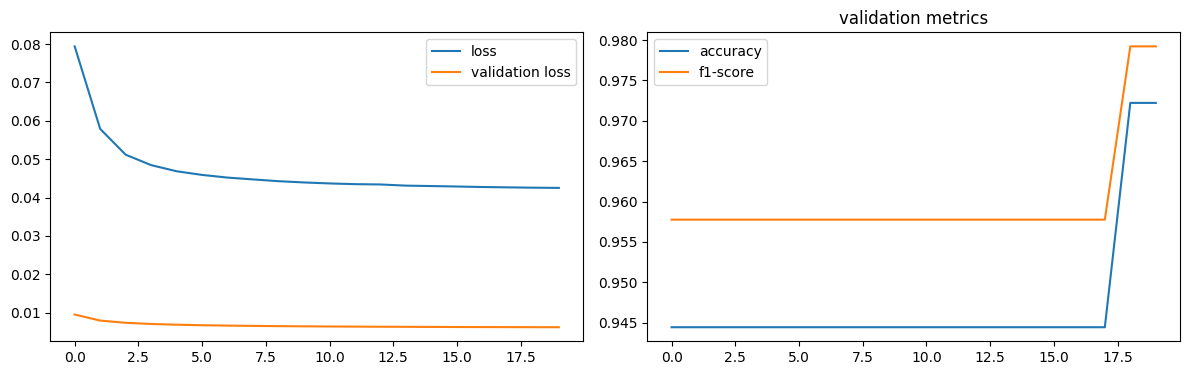

Test: loss: 0.3424999415874481, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (2, 'neuron2')


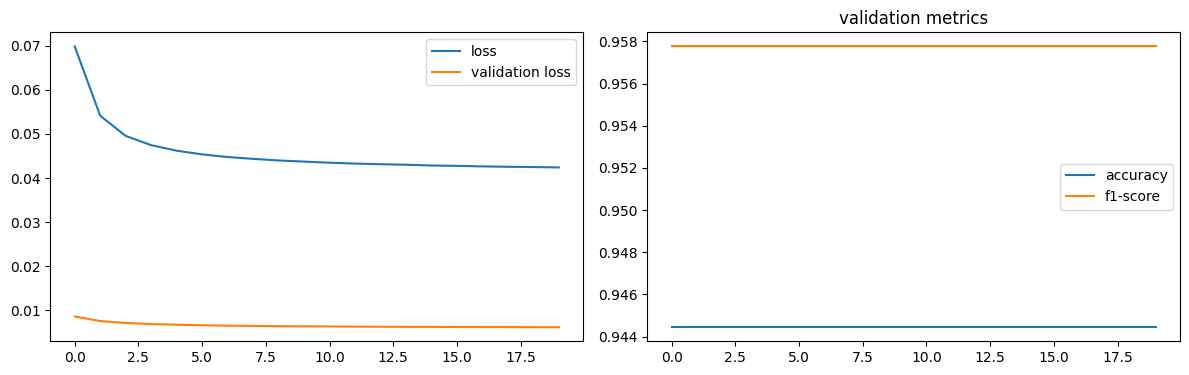

Test: loss: 0.34195271134376526, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (23, 'neuron24')


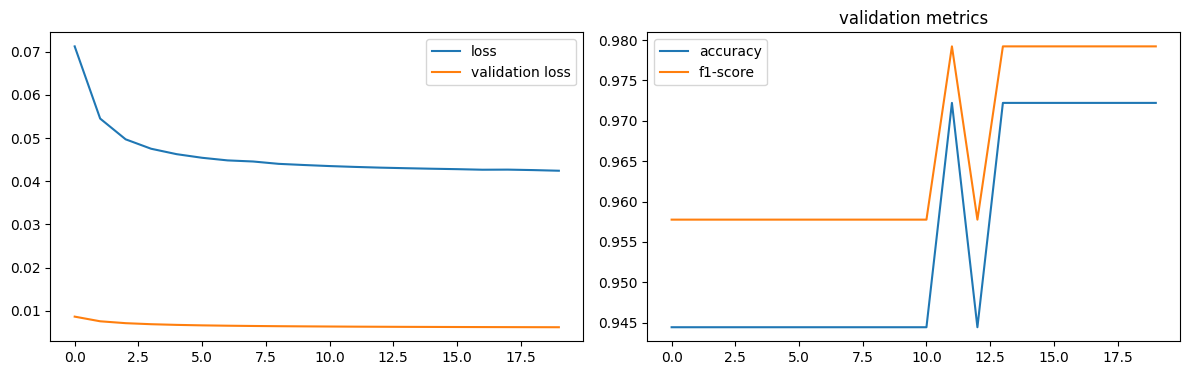

Test: loss: 0.341912180185318, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (18, 'neuron19')


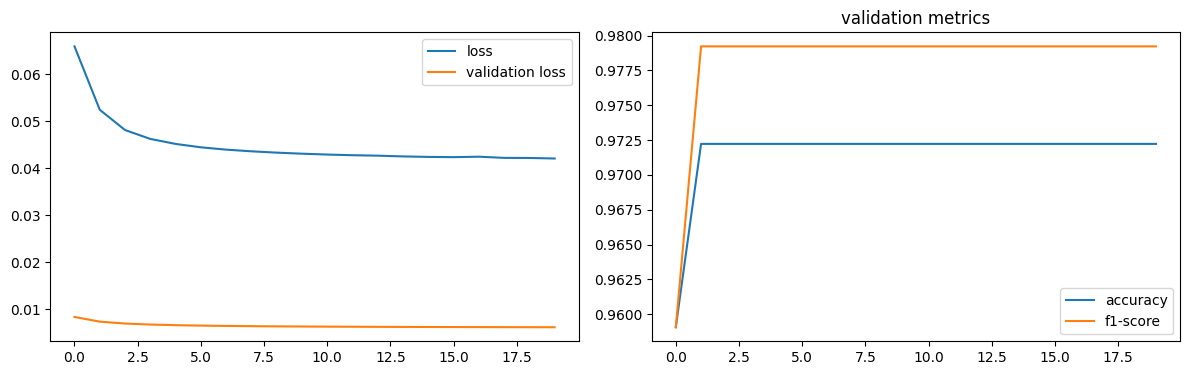

Test: loss: 0.3396960496902466, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (15, 'neuron16')


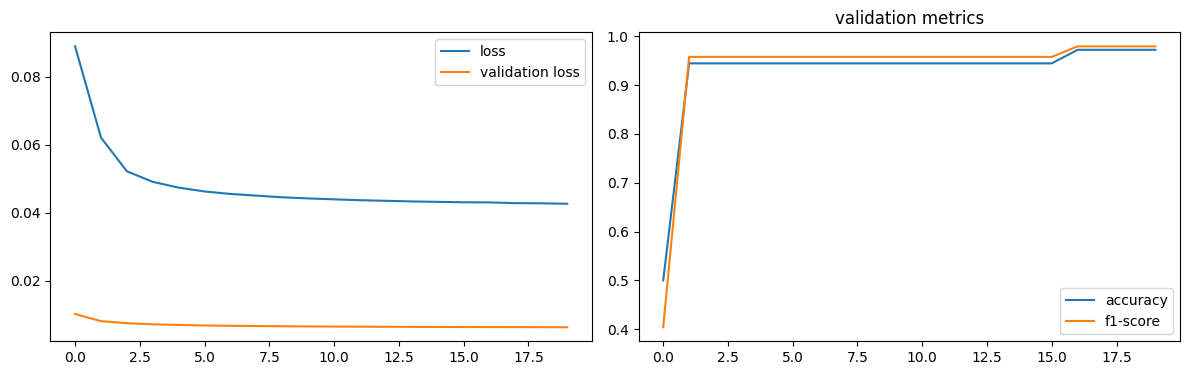

Test: loss: 0.34359249472618103, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (18, 'neuron21')


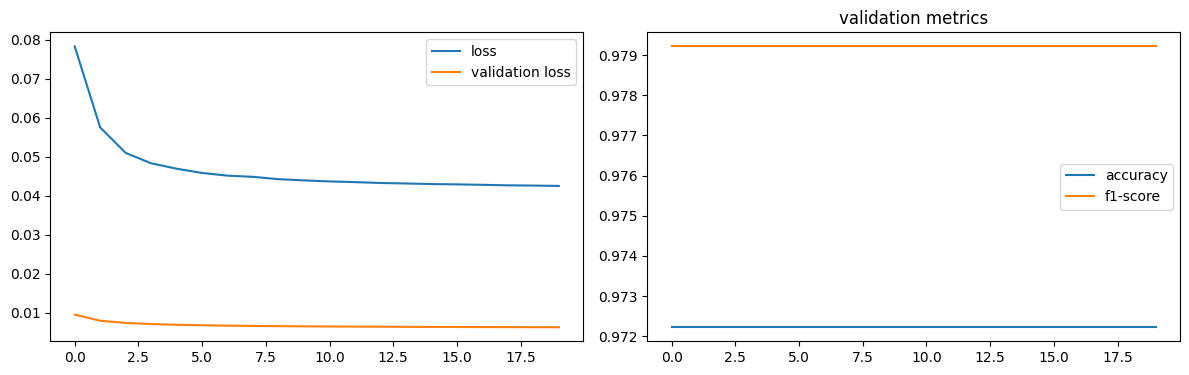

Test: loss: 0.3425804078578949, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (17, 'neuron20')


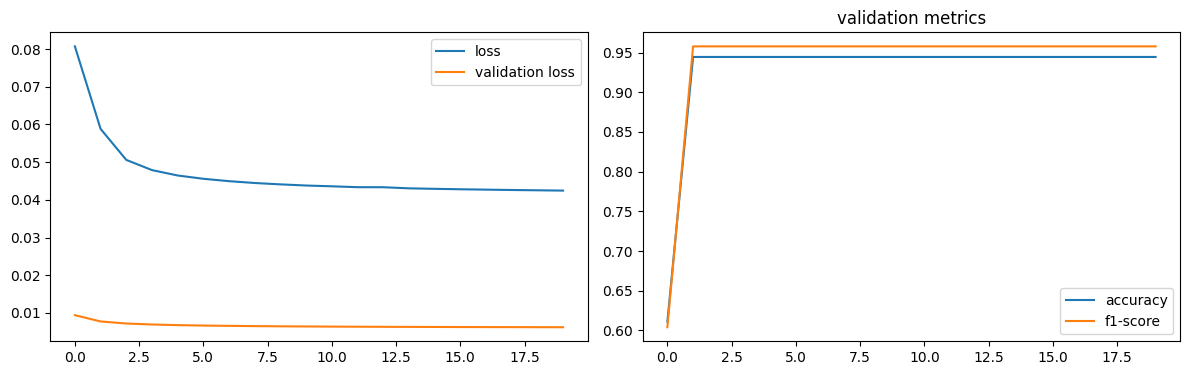

Test: loss: 0.34260356426239014, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (18, 'neuron23')


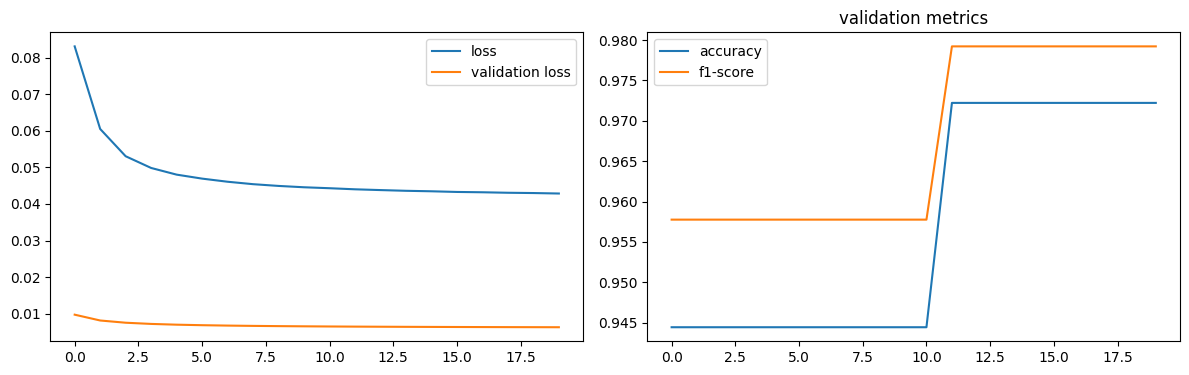

Test: loss: 0.3444375693798065, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (14, 'neuron15')


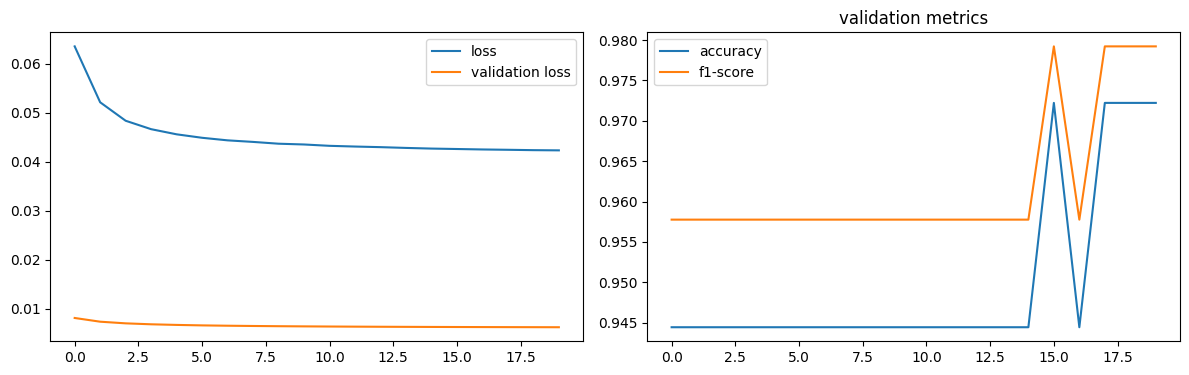

Test: loss: 0.3418939709663391, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (14, 'neuron17')


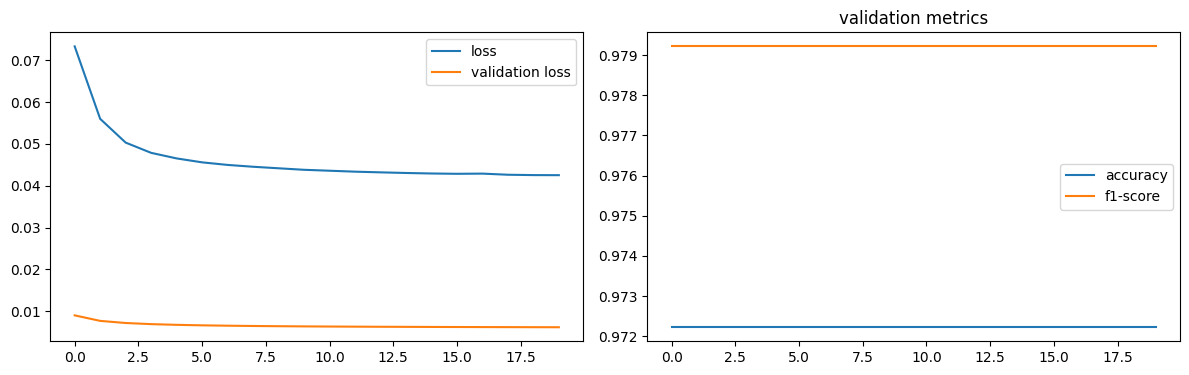

Test: loss: 0.3420124650001526, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (2, 'neuron3')


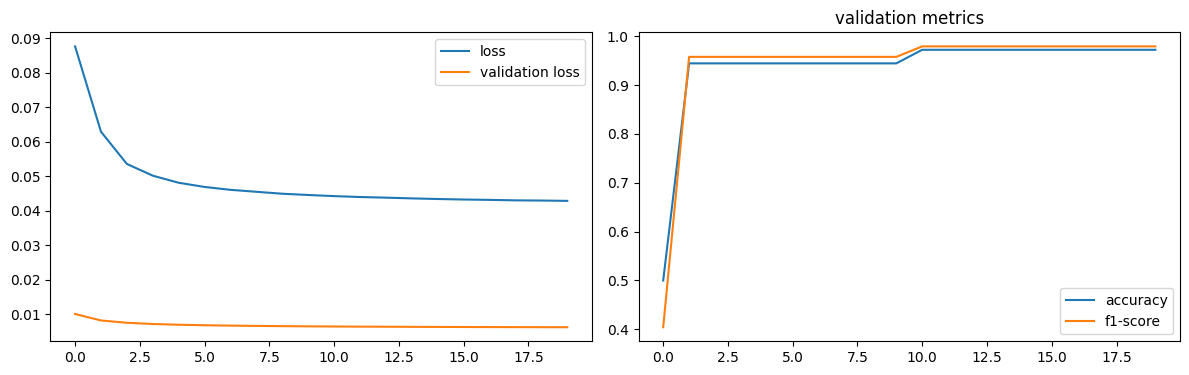

Test: loss: 0.34480610489845276, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (4, 'neuron6')


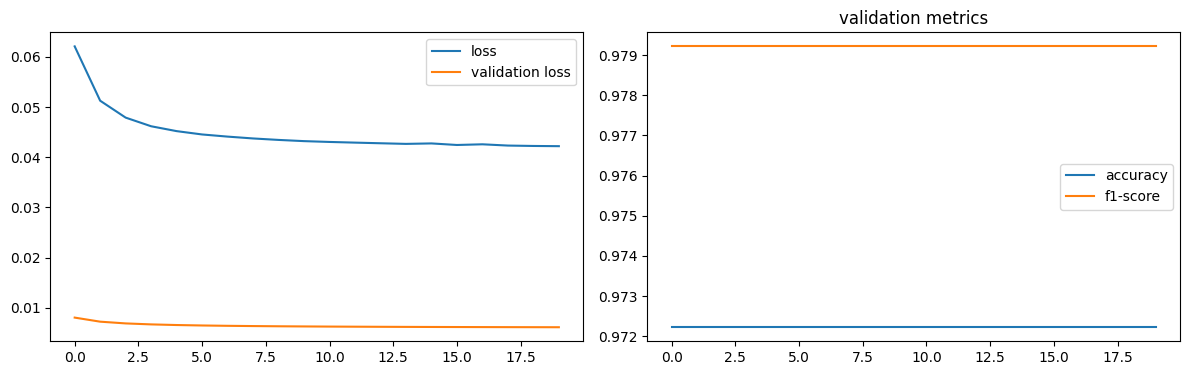

Test: loss: 0.3406335115432739, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (8, 'neuron11')


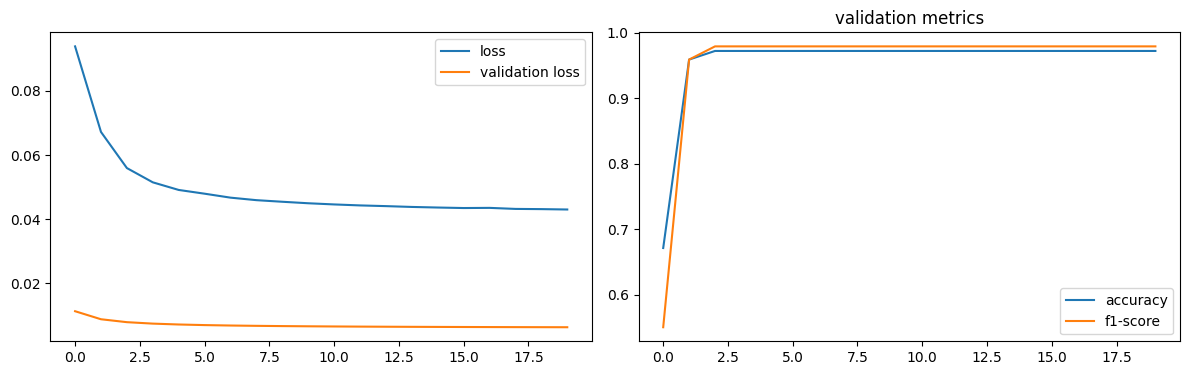

Test: loss: 0.3446773588657379, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (4, 'neuron7')


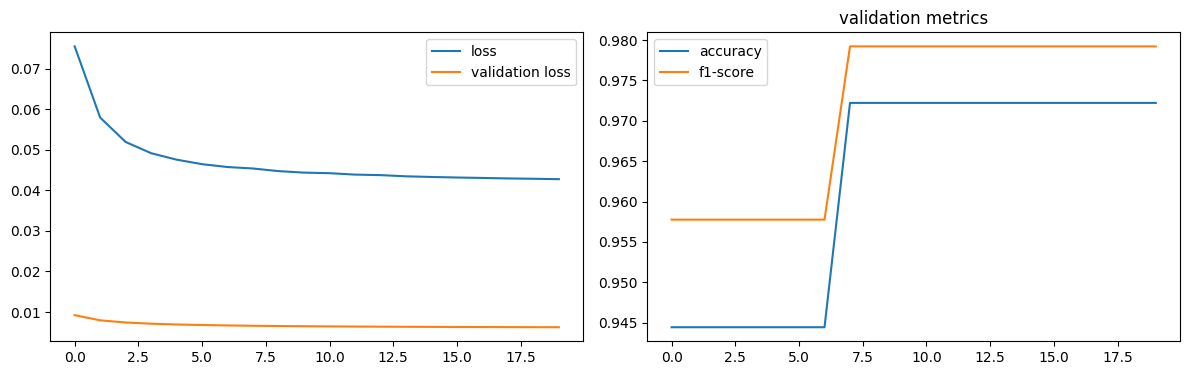

Test: loss: 0.34432753920555115, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (3, 'neuron5')


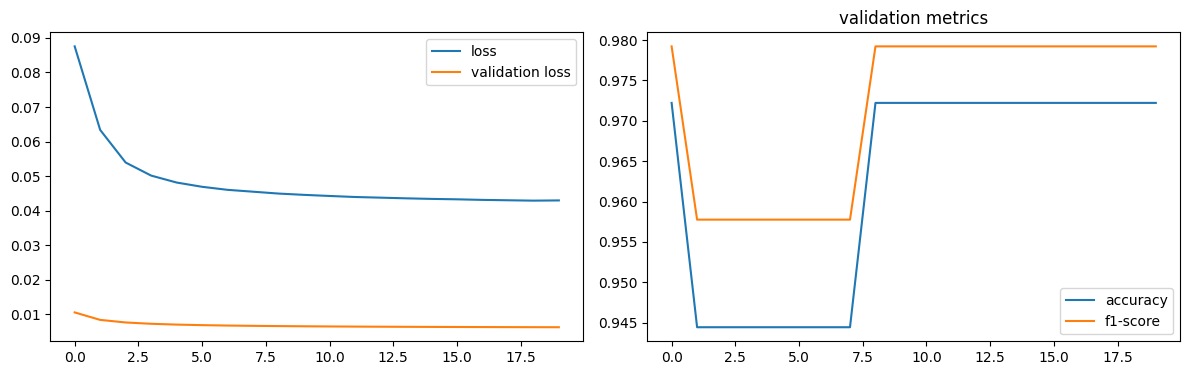

Test: loss: 0.3448750376701355, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (17, 'neuron31')


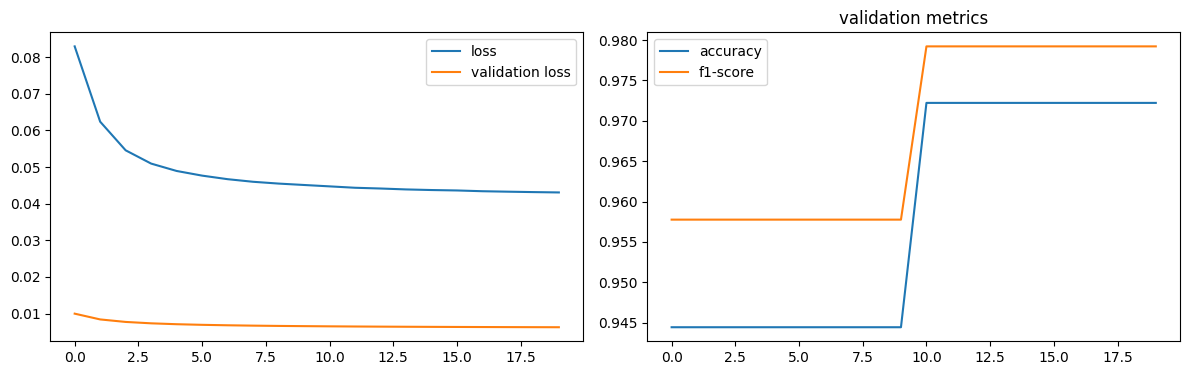

Test: loss: 0.3457181751728058, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (15, 'neuron29')


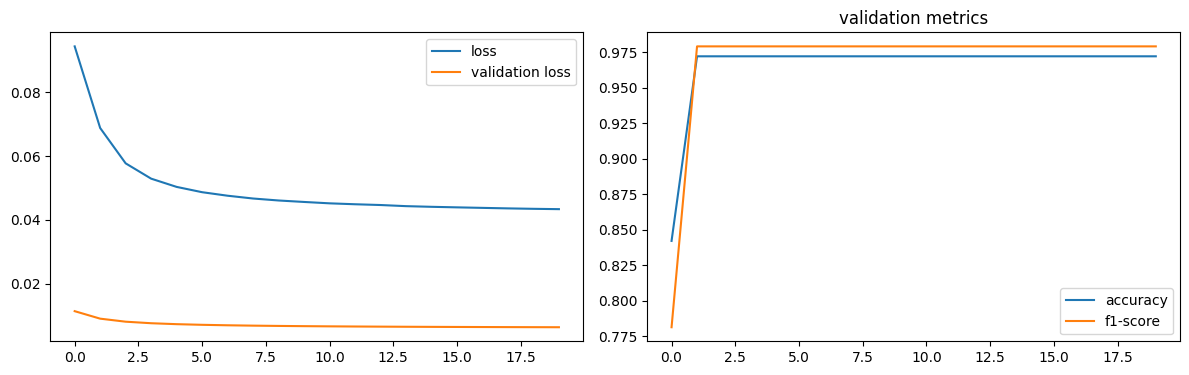

Test: loss: 0.3473151922225952, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (2, 'neuron4')


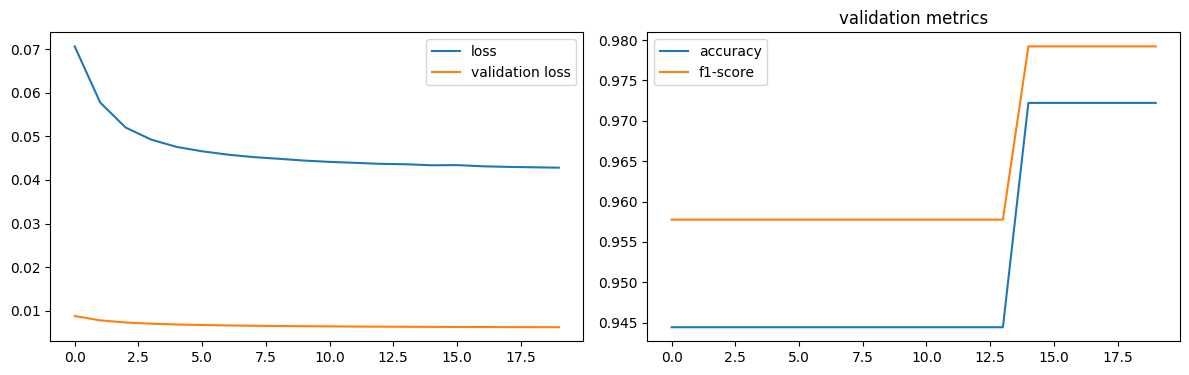

Test: loss: 0.3450428545475006, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (10, 'neuron25')


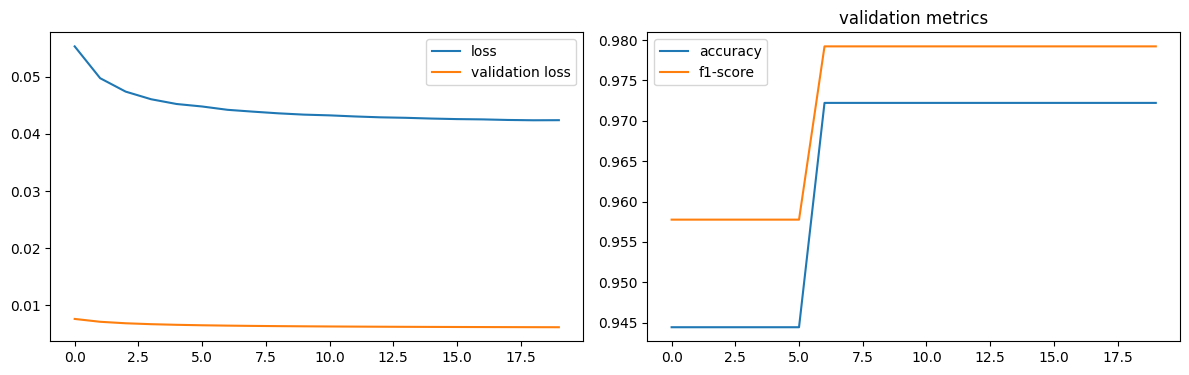

Test: loss: 0.3413393199443817, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (12, 'neuron28')


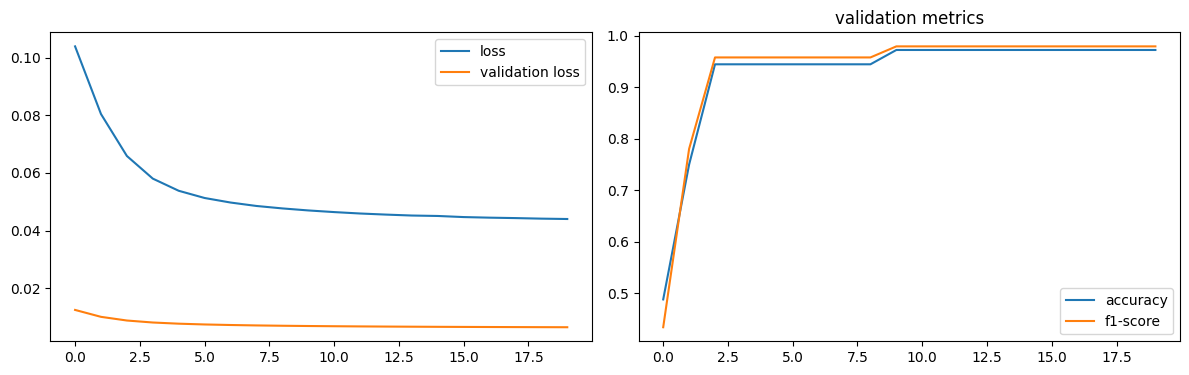

Test: loss: 0.35235869884490967, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron0')


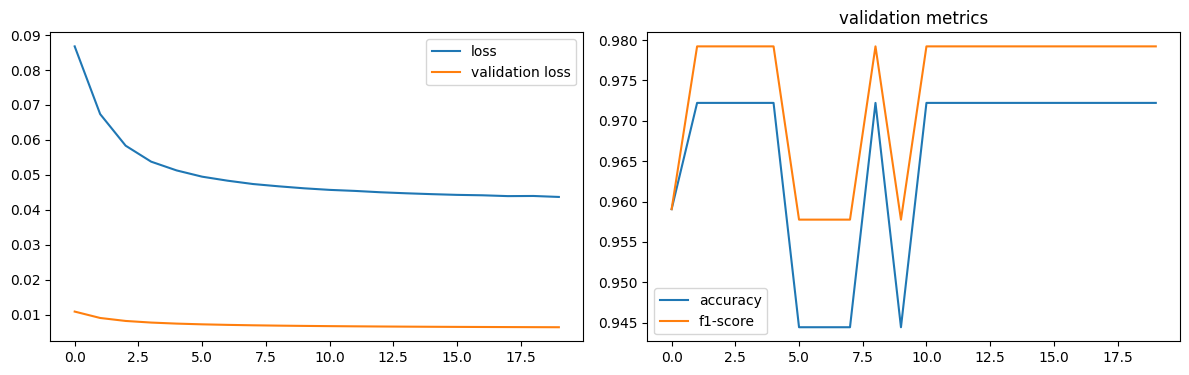

Test: loss: 0.3500387668609619, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (10, 'neuron27')


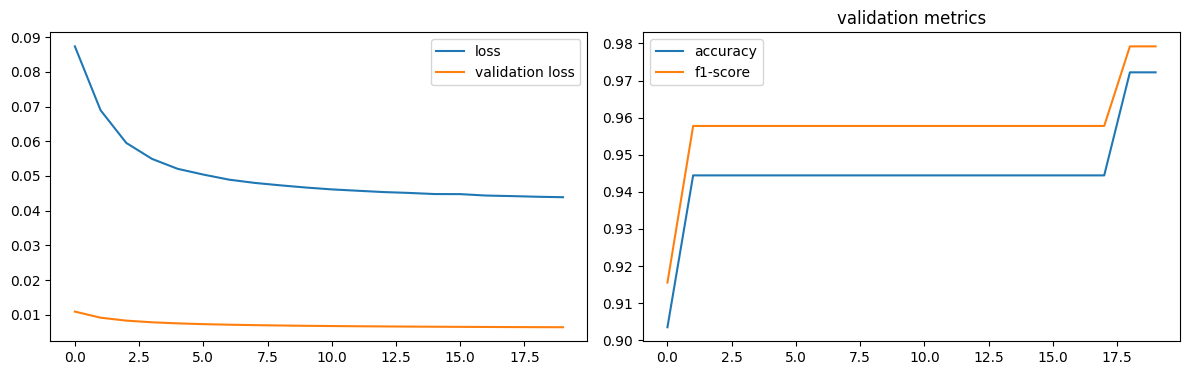

Test: loss: 0.3525465726852417, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (3, 'neuron10')


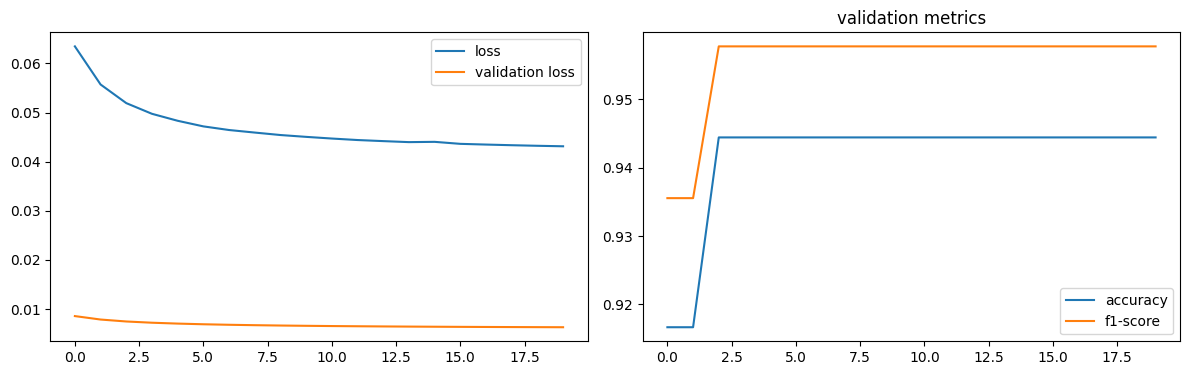

Test: loss: 0.3472081422805786, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (5, 'neuron14')


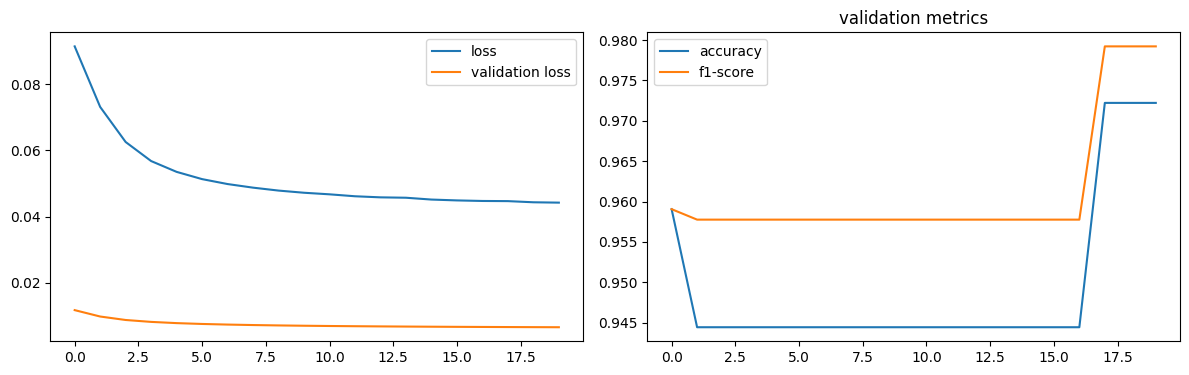

Test: loss: 0.35364484786987305, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron1')


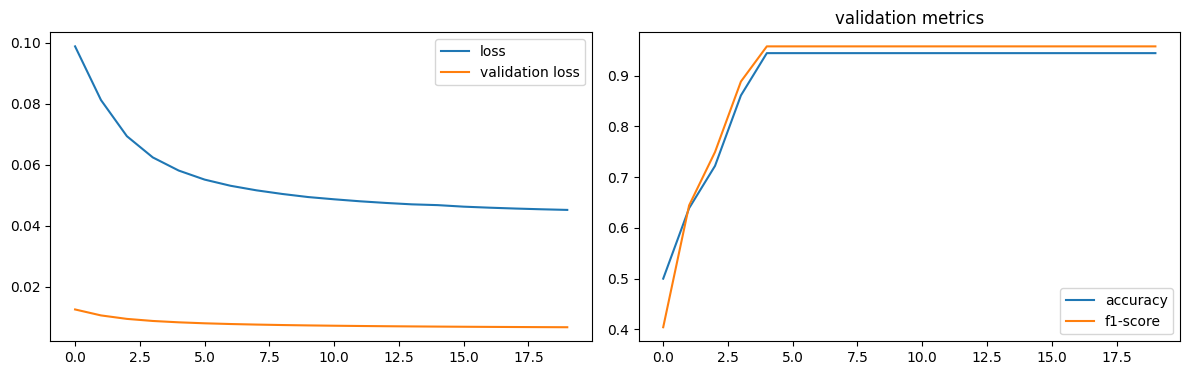

Test: loss: 0.36271369457244873, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron8')


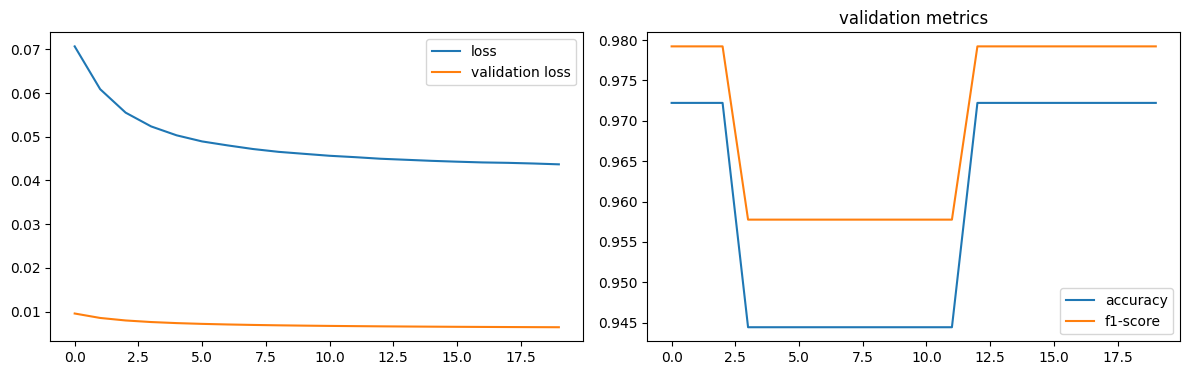

Test: loss: 0.3502335548400879, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (1, 'neuron12')


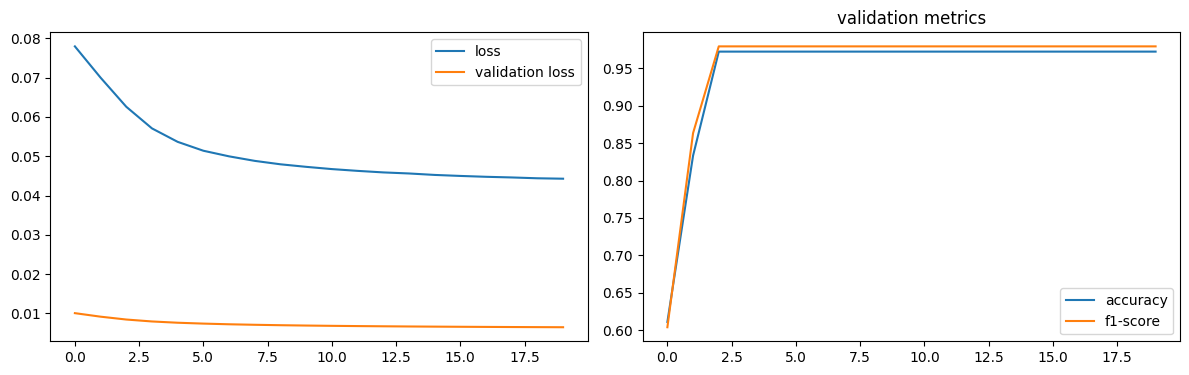

Test: loss: 0.35461845993995667, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron9')


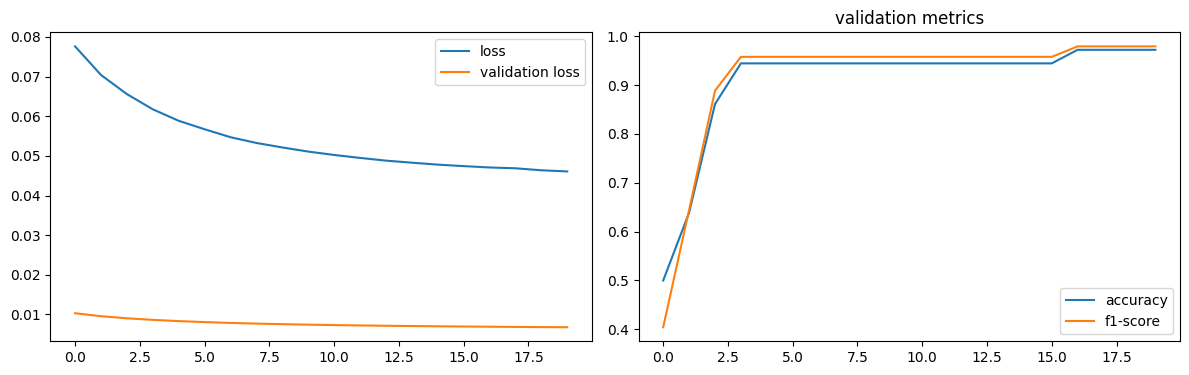

Test: loss: 0.37040379643440247, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron13')


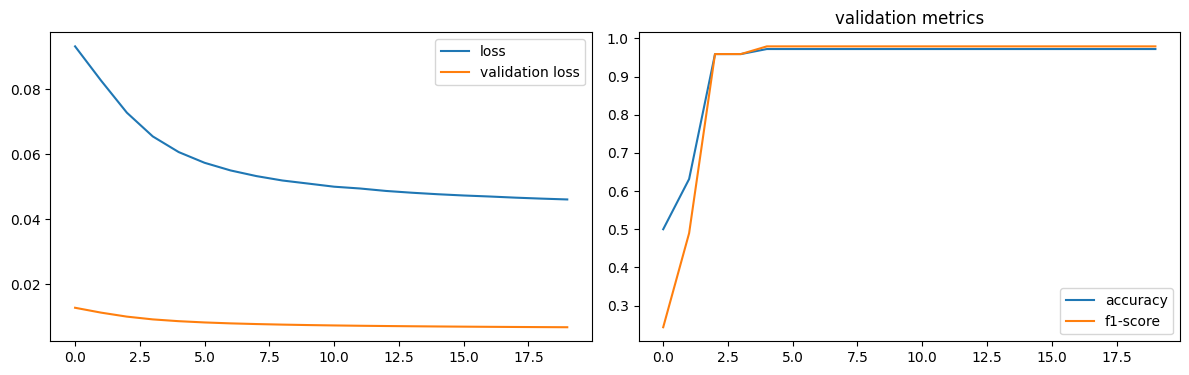

Test: loss: 0.3678693473339081, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (3, 'neuron30')


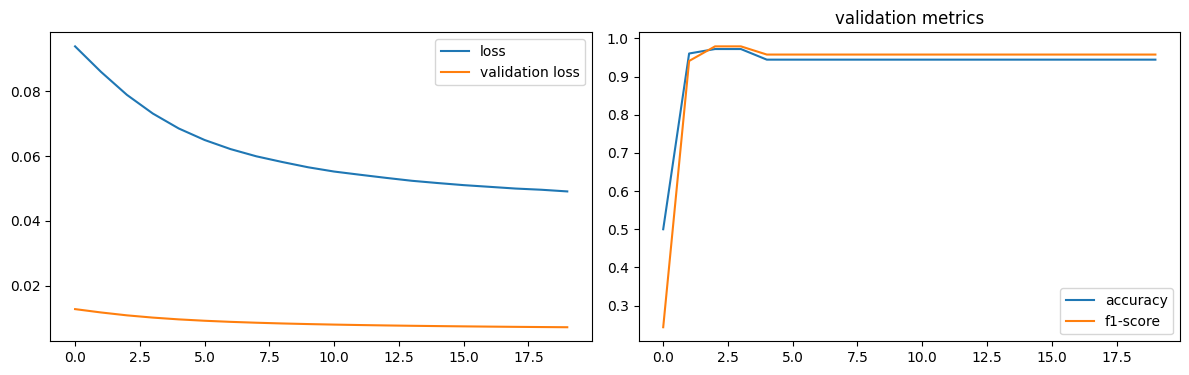

Test: loss: 0.39209386706352234, metrics: (0.9668805003166199, 0.9698193073272705)
dropping feature: (0, 'neuron18')


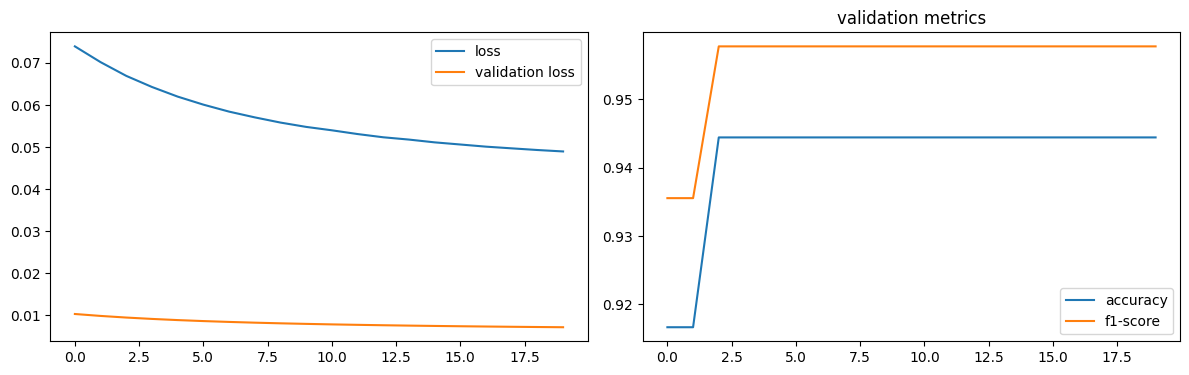

Test: loss: 0.3913905620574951, metrics: (0.9718309640884399, 0.9757985472679138)
dropping feature: (0, 'neuron22')


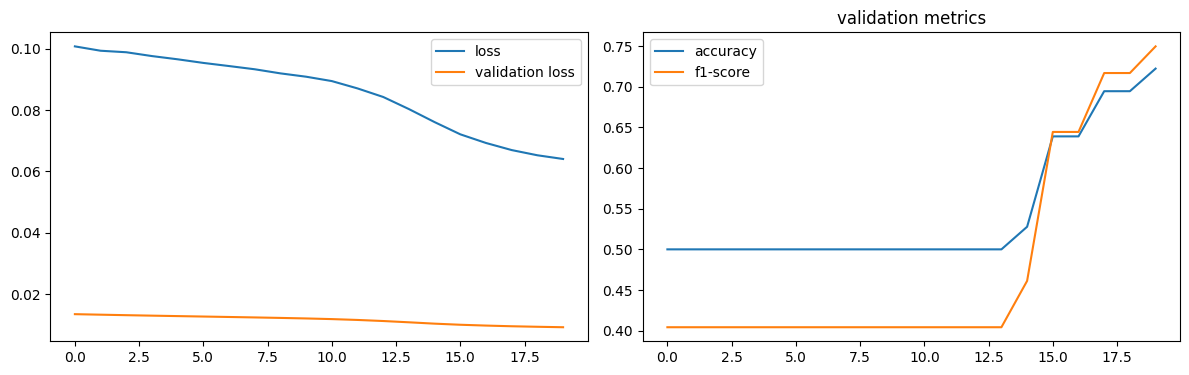

Test: loss: 0.5156658291816711, metrics: (0.8450704216957092, 0.8592262268066406)


In [35]:
headers = [f"neuron{i}" for i in range(32)]


def model_factory(size):
    model = BreastCancerNN(1, (1, size), 2)
    model.layer1 = nn.Identity()
    model.layer2 = nn.Identity()
    return model


def optimizer_factory(model):
    return optim.Adam(model.parameters(), lr=0.001)


test_metrics, dropped, models = prune(
    datasets, headers, analyze_dgsm,
    model_factory, optimizer_factory, criterion, score_outputs,
    labels, "", None
)

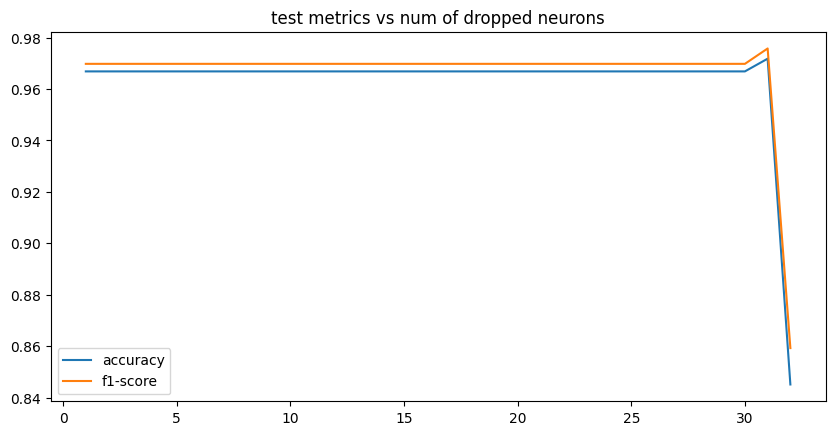

In [36]:
plt.plot(range(1, len(test_metrics)+1), test_metrics, label=labels)
plt.title("test metrics vs num of dropped neurons")
plt.gcf().set_figwidth(10)
plt.legend()
plt.show()

In [37]:
num_drop_neurons = 31

reduced_datasets, reduced_headers = reduce_datasets(datasets, headers, dropped, num_drop_neurons)
layer = models[num_drop_neurons].out

best_model.out = layer
best_model.layer2[0] = reduce_linear(best_model.layer2[0], dropped, num_drop_neurons)

features left [1]:  ['neuron26']


### pruned

In [38]:
best_model

BreastCancerNN(
  (layer1): Sequential(
    (0): Linear(in_features=12, out_features=6, bias=True)
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=6, out_features=1, bias=True)
    (1): ReLU()
  )
  (out): Linear(in_features=1, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)

In [39]:
with torch.no_grad():
    inputs, targets = fast_dataset["test"][:]
    outputs = best_model(inputs)

    test_metrics = score_outputs(outputs, targets)

print(f"test {labels}: {test_metrics}")

test ('accuracy', 'f1-score'): (0.8450704216957092, 0.8592262268066406)
